# Import

In [2]:
import pandas as pd 
#from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import missingno as msno
# Machine Learning imports 
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, GridSearchCV
import time
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (make_column_selector, make_column_transformer)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from seaborn import heatmap
from sklearn import set_config
set_config(display='diagram')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier
import os

#import imblearn pipeline
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from imblearn.over_sampling import SMOTE

In [3]:
## Specifying data storage folders
fpath_raw = r"./data_raw/"
fpath_clean = r"./data/"
fpath_reference = r"./reference_data/"
[os.makedirs(fpath,exist_ok=True) for fpath in [fpath_clean,fpath_raw,fpath_reference]];

# Load data

In [4]:
FILE = r"C:\Users\esnak\Downloads\mimic3c.csv (2)\mimic3c.csv"

df = pd.read_csv(FILE)
df

hadm_id gender  age  LOSdays admit_type             admit_location  \
0       100001      F   35     6.17  EMERGENCY  CLINIC REFERRAL/PREMATURE   
1       100003      M   59     4.04  EMERGENCY       EMERGENCY ROOM ADMIT   
2       100006      F   48    12.04  EMERGENCY       EMERGENCY ROOM ADMIT   
3       100007      F   73     7.29  EMERGENCY       EMERGENCY ROOM ADMIT   
4       100009      M   60     4.88  EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
...        ...    ...  ...      ...        ...                        ...   
58971   199993      M   60    24.58  EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
58972   199994      F   58     9.75  EMERGENCY       EMERGENCY ROOM ADMIT   
58973   199995      M   23    16.75  EMERGENCY  PHYS REFERRAL/NORMAL DELI   
58974   199998      M   69     5.88  EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
58975   199999      M   88     5.50  EMERGENCY  CLINIC REFERRAL/PREMATURE   

                AdmitDiagnosis insurance           religion marital_status  \
0        DIABETIC KETOACIDOSIS   Private  PROTESTANT QUAKER       DIVORCED   
1               UPPER GI BLEED   Private      NOT SPECIFIED         SINGLE   
2                   COPD FLARE   Private      NOT SPECIFIED         SINGLE   
3            BOWEL OBSTRUCTION   Private             JEWISH        MARRIED   
4      CORONARY ARTERY DISEASE   Private           CATHOLIC        MARRIED   
...                        ...       ...                ...            ...   
58971  CORONARY ARTERY DISEASE   Private           CATHOLIC       DIVORCED   
58972    MENTAL STATUS CHANGES  Medicare           CATHOLIC         SINGLE   
58973             ROOT ABSCESS   Private  PROTESTANT QUAKER         SINGLE   
58974  CORONARY ARTERY DISEASE  Medicare           CATHOLIC        MARRIED   
58975                PNEUMONIA  Medicare             JEWISH        MARRIED   

       ... NumMicroLabs  NumNotes  NumOutput  NumRx NumProcEvents  \
0      ...         0.65      0.05       5.19  14.91          1.13   
1      ...         1.24      1.59       5.45   7.18          0.99   
2      ...         0.33      0.15       4.15   6.23          0.00   
3      ...         0.69      0.17       9.05  11.52          0.00   
4      ...         0.61      0.34      16.19  25.00          2.87   
...    ...          ...       ...        ...    ...           ...   
58971  ...         0.20      0.13      23.11   8.01          0.00   
58972  ...         2.26      0.30       7.90   0.00          0.00   
58973  ...         0.54      0.10       6.27   5.79          0.00   
58974  ...         0.17      0.35      12.24  17.69          0.00   
58975  ...         1.64      0.40       4.73   5.82          0.55   

       NumTransfers  NumChartEvents  ExpiredHospital  TotalNumInteract  \
0              0.65          398.70                0            493.89   
1              1.24          373.02                0            465.71   
2              0.33          286.21                0            344.00   
3              0.96          526.06                0            603.05   
4              2.05          554.92                0            679.84   
...             ...             ...              ...               ...   
58971          0.08         1315.46                0           1746.31   
58972          0.31          674.05                0            834.98   
58973          0.36          207.10                0            261.30   
58974          1.02          426.87                0            537.42   
58975          0.73          550.36                0            614.59   

       LOSgroupNum  
0                2  
1                2  
2                4  
3                2  
4                2  
...            ...  
58971            4  
58972            3  
58973            4  
58974            2  
58975            2  

[58976 rows x 28 columns]

# Data Dictionary 

* hadm_id:Admission identifier.

* gender: Patient's gender.

* age:Patient's age.

* LOSdays: Length of stay in days.

* admit_type: Type of admission (e.g., emergency, elective).

* admit_location:Location where the patient was admitted.
Example: EMERGENCY ROOM ADMIT, CLINIC REFERRAL, ...
* AdmitDiagnosis: Primary diagnosis for the admission.
Example: PNEUMONIA, CONGESTIVE HEART FAILURE, ...
* insurance: Type of insurance coverage. Example: Medicare, Medicaid, Private, ...
* religion: Definition: Patient's religious affiliation.

* marital_status:

* ethnicity: Patient's ethnicity or race.
Example: WHITE, BLACK/AFRICAN AMERICAN, HISPANIC, ...
* NumCallouts: Number of callouts or requests for the patient.Example: 0, 1, 2, ...
* NumDiagnosis: Number of diagnoses associated with the patient.

* NumProcs:Number of procedures performed on the patient.

* AdmitProcedure: Procedure(s) performed during admission.
Example: TRACHEOSTOMY, ANGIOGRAM, ...
* NumCPTevents: Number of Current Procedural Terminology (CPT) events. Example: 5, 0, 3, ...
* NumInput:Number of input events (e.g., medications, fluids).

* NumLabs:Number of laboratory tests conducted.

* NumMicroLabs: Number of microbiology lab tests.

* NumNotes:Number of clinical notes.

* NumOutput:Number of output events (e.g., urine output).

* NumRx: Number of prescription medications.

* NumProcEvents: Number of procedural events.

* NumTransfers: Number of patient transfers.

* NumChartEvents: Number of charted events.

* ExpiredHospital:Indicates whether the patient expired during the hospital stay (binary: 0 or 1).
Example: 0 (Survived), 1 (Expired).
* TotalNumInteract: Total number of interactions/events recorded for the patient.
* LOSgroupNum: Length of Stay (LOS) group number, categorizing patients based on their ICU stay duration.

In [4]:
df.ExpiredHospital.value_counts()

0    53122
1     5854
Name: ExpiredHospital, dtype: int64

# Display Column Names, Count of Non-Null Values, and Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hadm_id           58976 non-null  int64  
 1   gender            58976 non-null  object 
 2   age               58976 non-null  int64  
 3   LOSdays           58976 non-null  float64
 4   admit_type        58976 non-null  object 
 5   admit_location    58976 non-null  object 
 6   AdmitDiagnosis    58951 non-null  object 
 7   insurance         58976 non-null  object 
 8   religion          58518 non-null  object 
 9   marital_status    48848 non-null  object 
 10  ethnicity         58976 non-null  object 
 11  NumCallouts       58976 non-null  float64
 12  NumDiagnosis      58976 non-null  float64
 13  NumProcs          58976 non-null  float64
 14  AdmitProcedure    58976 non-null  object 
 15  NumCPTevents      58976 non-null  float64
 16  NumInput          58976 non-null  float6

## Duplicated Data

In [6]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


###  Missing Values

In [7]:
df.isna().sum()

hadm_id                 0
gender                  0
age                     0
LOSdays                 0
admit_type              0
admit_location          0
AdmitDiagnosis         25
insurance               0
religion              458
marital_status      10128
ethnicity               0
NumCallouts             0
NumDiagnosis            0
NumProcs                0
AdmitProcedure          0
NumCPTevents            0
NumInput                0
NumLabs                 0
NumMicroLabs            0
NumNotes                0
NumOutput               0
NumRx                   0
NumProcEvents           0
NumTransfers            0
NumChartEvents          0
ExpiredHospital         0
TotalNumInteract        0
LOSgroupNum             0
dtype: int64

In [8]:
df.isna().sum()/len(df)*100

hadm_id              0.000000
gender               0.000000
age                  0.000000
LOSdays              0.000000
admit_type           0.000000
admit_location       0.000000
AdmitDiagnosis       0.042390
insurance            0.000000
religion             0.776587
marital_status      17.173087
ethnicity            0.000000
NumCallouts          0.000000
NumDiagnosis         0.000000
NumProcs             0.000000
AdmitProcedure       0.000000
NumCPTevents         0.000000
NumInput             0.000000
NumLabs              0.000000
NumMicroLabs         0.000000
NumNotes             0.000000
NumOutput            0.000000
NumRx                0.000000
NumProcEvents        0.000000
NumTransfers         0.000000
NumChartEvents       0.000000
ExpiredHospital      0.000000
TotalNumInteract     0.000000
LOSgroupNum          0.000000
dtype: float64

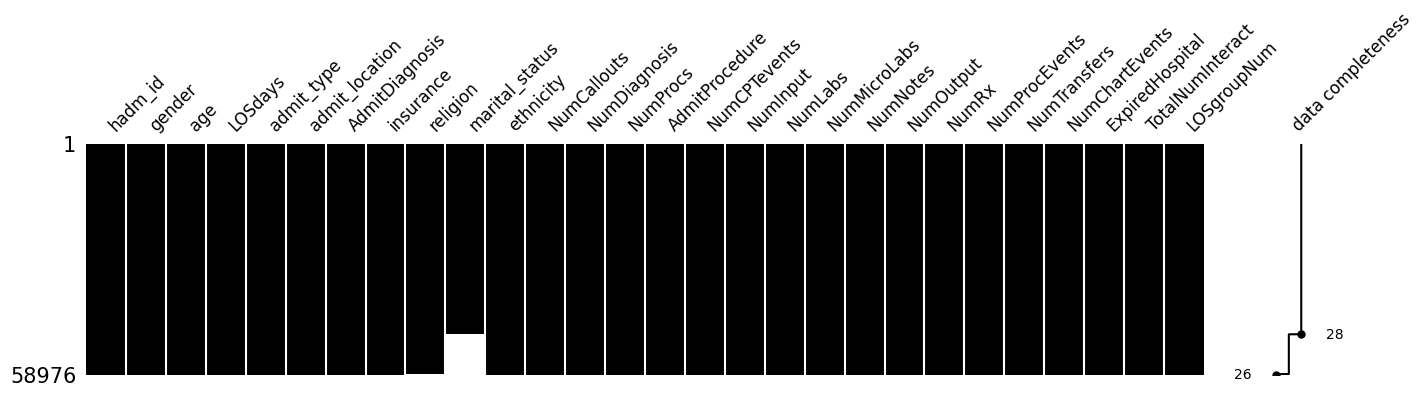

In [9]:
msno.matrix(df, figsize=(16,3), labels=True, 
            fontsize=12, sort="descending", color=(0,0,0));

In [10]:
unique_values = df.shape[0]
unique_values 

58976

In [11]:
# Dropping unnecessary columns if needed

# Calculate the count of unique values and the cardinality for id column
unique_values = df['hadm_id'].nunique()
total_values = df.shape[0]
cardinality = (unique_values / total_values) * 100

# Display the count of unique values and the cardinality for this column
print(f'This column has {unique_values} unique values out of {total_values} total values, which is {cardinality:.2f}% cardinality.')


This column has 58976 unique values out of 58976 total values, which is 100.00% cardinality.


In [12]:
# We will drop the id column since this column is a unique identifier.
df_copy = df.drop(columns='hadm_id')
# Confirm column has been dropped.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            58976 non-null  object 
 1   age               58976 non-null  int64  
 2   LOSdays           58976 non-null  float64
 3   admit_type        58976 non-null  object 
 4   admit_location    58976 non-null  object 
 5   AdmitDiagnosis    58951 non-null  object 
 6   insurance         58976 non-null  object 
 7   religion          58518 non-null  object 
 8   marital_status    48848 non-null  object 
 9   ethnicity         58976 non-null  object 
 10  NumCallouts       58976 non-null  float64
 11  NumDiagnosis      58976 non-null  float64
 12  NumProcs          58976 non-null  float64
 13  AdmitProcedure    58976 non-null  object 
 14  NumCPTevents      58976 non-null  float64
 15  NumInput          58976 non-null  float64
 16  NumLabs           58976 non-null  float6

## Inspect Column Values for Errors
### Categorical columns

In [13]:
# find categorical columns
df_types = df_copy.dtypes
string_cols = df_types[df_copy.dtypes=='object'].index
string_cols

Index(['gender', 'admit_type', 'admit_location', 'AdmitDiagnosis', 'insurance',
       'religion', 'marital_status', 'ethnicity', 'AdmitProcedure'],
      dtype='object')

In [14]:
df_string = df_copy.select_dtypes(include=['object'])
df_string.head(3)

gender admit_type             admit_location         AdmitDiagnosis  \
0      F  EMERGENCY  CLINIC REFERRAL/PREMATURE  DIABETIC KETOACIDOSIS   
1      M  EMERGENCY       EMERGENCY ROOM ADMIT         UPPER GI BLEED   
2      F  EMERGENCY       EMERGENCY ROOM ADMIT             COPD FLARE   

  insurance           religion marital_status               ethnicity  \
0   Private  PROTESTANT QUAKER       DIVORCED                   WHITE   
1   Private      NOT SPECIFIED         SINGLE                   WHITE   
2   Private      NOT SPECIFIED         SINGLE  BLACK/AFRICAN AMERICAN   

            AdmitProcedure  
0                       na  
1  Endosc control gast hem  
2   Non-invasive mech vent

In [15]:
df_number = df_copy.select_dtypes(include=['number'])
df_number.head(3)

age  LOSdays  NumCallouts  NumDiagnosis  NumProcs  NumCPTevents  NumInput  \
0   35     6.17         0.16          2.59      0.00          1.30     25.12   
1   59     4.04         0.25          2.23      0.99          1.98     13.61   
2   48    12.04         0.00          0.75      0.17          0.83     11.46   

   NumLabs  NumMicroLabs  NumNotes  NumOutput  NumRx  NumProcEvents  \
0    43.44          0.65      0.05       5.19  14.91           1.13   
1    55.94          1.24      1.59       5.45   7.18           0.99   
2    33.39          0.33      0.15       4.15   6.23           0.00   

   NumTransfers  NumChartEvents  ExpiredHospital  TotalNumInteract  \
0          0.65          398.70                0            493.89   
1          1.24          373.02                0            465.71   
2          0.33          286.21                0            344.00   

   LOSgroupNum  
0            2  
1            2  
2            4

In [16]:
# Observetion : NumCPTevents ExpiredHospital are object because they are code number

In [17]:
for col in string_cols:
    print(f"Value Counts for Column: {col}")
    print(df_copy[col].value_counts())
    print("\n")


Value Counts for Column: gender
M    32950
F    26026
Name: gender, dtype: int64


Value Counts for Column: admit_type
EMERGENCY    42071
NEWBORN       7863
ELECTIVE      7706
URGENT        1336
Name: admit_type, dtype: int64


Value Counts for Column: admit_location
EMERGENCY ROOM ADMIT         22754
PHYS REFERRAL/NORMAL DELI    15079
CLINIC REFERRAL/PREMATURE    12032
TRANSFER FROM HOSP/EXTRAM     8456
TRANSFER FROM SKILLED NUR      273
** INFO NOT AVAILABLE **       204
HMO REFERRAL/SICK              102
TRANSFER FROM OTHER HEALT       71
TRSF WITHIN THIS FACILITY        5
Name: admit_location, dtype: int64


Value Counts for Column: AdmitDiagnosis
NEWBORN                                                                   7823
PNEUMONIA                                                                 1566
SEPSIS                                                                    1184
CONGESTIVE HEART FAILURE                                                   928
CORONARY ARTERY DISEASE 

In [18]:
# replace NaN 
df_copy['marital_status'].fillna('UNKNOWN (DEFAULT)', inplace=True)
df_copy['religion'].fillna('NOT SPECIFIED', inplace=True)
df_copy['AdmitDiagnosis'].fillna('NOT SPECIFIED', inplace=True)

In [19]:
# find numeric columns
df_types = df_copy.dtypes
numeric_cols = df_types[(df_copy.dtypes == 'int64') | (df_copy.dtypes == 'float64')].index
numeric_cols

Index(['age', 'LOSdays', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs', 'NumNotes',
       'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers', 'NumChartEvents',
       'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum'],
      dtype='object')

In [20]:
df_copy.describe()

age       LOSdays   NumCallouts  NumDiagnosis      NumProcs  \
count  58976.000000  58976.000000  58976.000000   58976.00000  58976.000000   
mean      53.005884     10.114955      0.099374       2.67596      0.785599   
std       26.028120     12.456231      0.163437       8.26559      3.558090   
min        0.000000      0.000000      0.000000       0.00000      0.000000   
25%       43.000000      3.710000      0.000000       0.82000      0.210000   
50%       59.000000      6.460000      0.000000       1.41000      0.420000   
75%       73.000000     11.790000      0.160000       2.40000      0.710000   
max       89.000000    294.630000      4.760000     450.00000    275.000000   

       NumCPTevents      NumInput       NumLabs  NumMicroLabs      NumNotes  \
count  58976.000000  58976.000000  58976.000000  58976.000000  58976.000000   
mean       1.074118     30.379017     46.421124      1.219913      6.464789   
std        2.027148     62.430163     76.061561      4.236693    106.709903   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      4.850000     26.980000      0.160000      0.140000   
50%        0.970000     13.990000     38.520000      0.510000      0.330000   
75%        1.560000     34.360000     50.860000      1.350000      0.770000   
max      225.000000   6825.000000   5175.000000    375.000000   7500.000000   

          NumOutput         NumRx  NumProcEvents  NumTransfers  \
count  58976.000000  58976.000000   58976.000000  58976.000000   
mean       7.111594      9.593702       0.691903      1.093313   
std        7.551822     12.601338       2.117615      3.169441   
min        0.000000      0.000000       0.000000      0.000000   
25%        1.750000      4.330000       0.000000      0.380000   
50%        5.310000      8.370000       0.000000      0.650000   
75%       10.490000     12.270000       0.880000      1.060000   
max      375.000000    750.000000     100.000000    125.000000   

       NumChartEvents  ExpiredHospital  TotalNumInteract   LOSgroupNum  
count    58976.000000     58976.000000      58976.000000  58976.000000  
mean       528.505172         0.099261        636.115579      2.360248  
std        640.250063         0.299014        783.938087      1.130337  
min          0.000000         0.000000          0.000000      1.000000  
25%        207.410000         0.000000        267.407500      1.000000  
50%        417.875000         0.000000        497.335000      2.000000  
75%        700.302500         0.000000        811.382500      3.000000  
max      49325.000000         1.000000      68600.000000      4.000000

### Observation : NumCPTevents and ExpiredHospital are code so are object

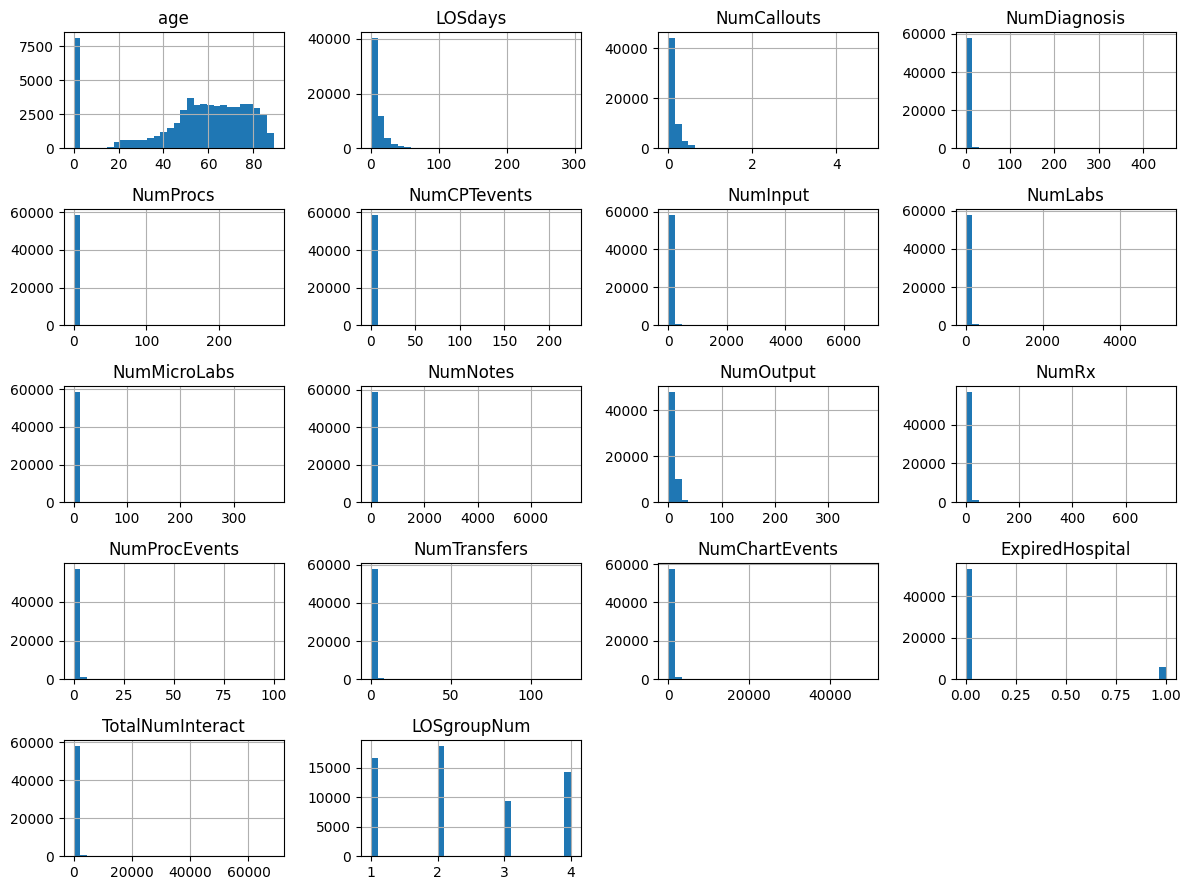

In [21]:
# Display histogram charts for the numeric columns in the dataframe
df_copy.hist(figsize=(12,9), bins=30)
plt.tight_layout()
plt.show;

# EDA

In [22]:
def plot_bar_all_features(df1,x, y):
  fig, ax = plt.subplots(figsize=(8,5))
  counts_x = df1[x].value_counts(normalize = True)
  print(f'Value_counts {x}')
  print(counts_x)
  print('\n', '\n')
  counts_x.plot(kind='barh')
  ax.set_facecolor("lightgray")
 
  ax.set_title(f'Frequencies of {y}', fontsize = 20, fontweight = 'bold');
  ax.set_ylabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
  ax.set_xlabel('Normalize Counts', fontsize = 15, fontweight = 'bold')
  plt.xticks(fontsize = 15)#, weight='bold')
  plt.yticks(fontsize = 15)#, weight='bold')

Value_counts gender
M    0.558702
F    0.441298
Name: gender, dtype: float64

 



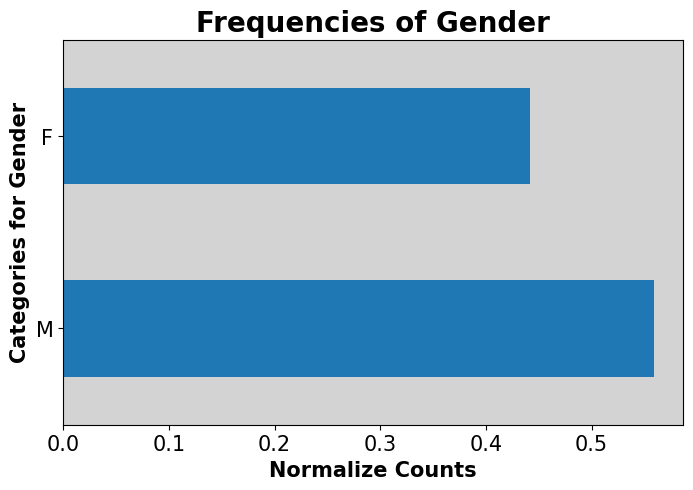

In [23]:
plot_bar_all_features(df_copy, 'gender', 'Gender')

Value_counts admit_type
EMERGENCY    0.713358
NEWBORN      0.133325
ELECTIVE     0.130663
URGENT       0.022653
Name: admit_type, dtype: float64

 



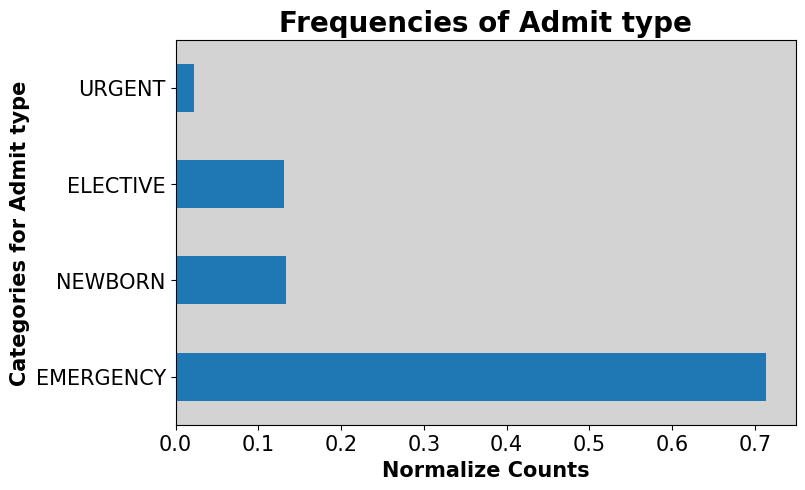

In [24]:
plot_bar_all_features(df_copy, 'admit_type', 'Admit type')

Value_counts admit_location
EMERGENCY ROOM ADMIT         0.385818
PHYS REFERRAL/NORMAL DELI    0.255680
CLINIC REFERRAL/PREMATURE    0.204015
TRANSFER FROM HOSP/EXTRAM    0.143380
TRANSFER FROM SKILLED NUR    0.004629
** INFO NOT AVAILABLE **     0.003459
HMO REFERRAL/SICK            0.001730
TRANSFER FROM OTHER HEALT    0.001204
TRSF WITHIN THIS FACILITY    0.000085
Name: admit_location, dtype: float64

 



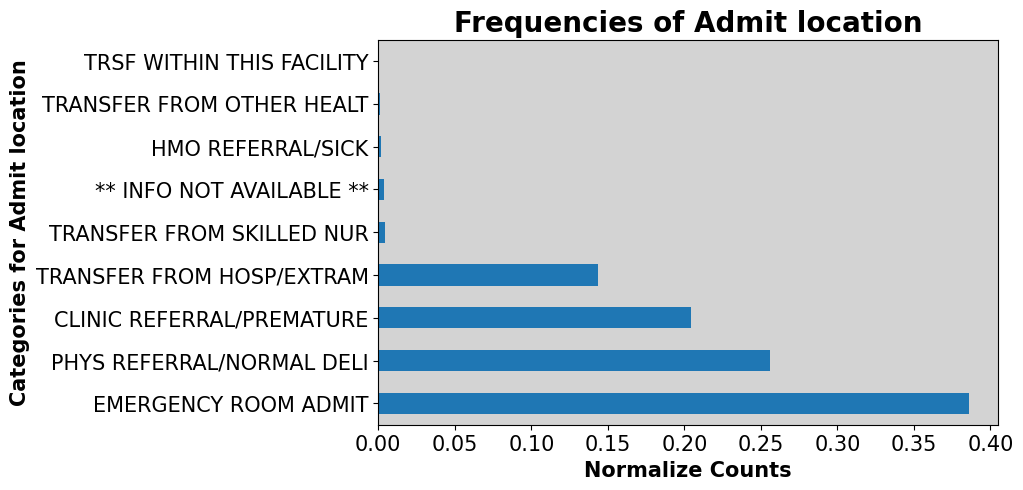

In [25]:
plot_bar_all_features(df_copy, 'admit_location', 'Admit location')

Value_counts insurance
Medicare      0.478415
Private       0.382902
Medicaid      0.098091
Government    0.030233
Self Pay      0.010360
Name: insurance, dtype: float64

 



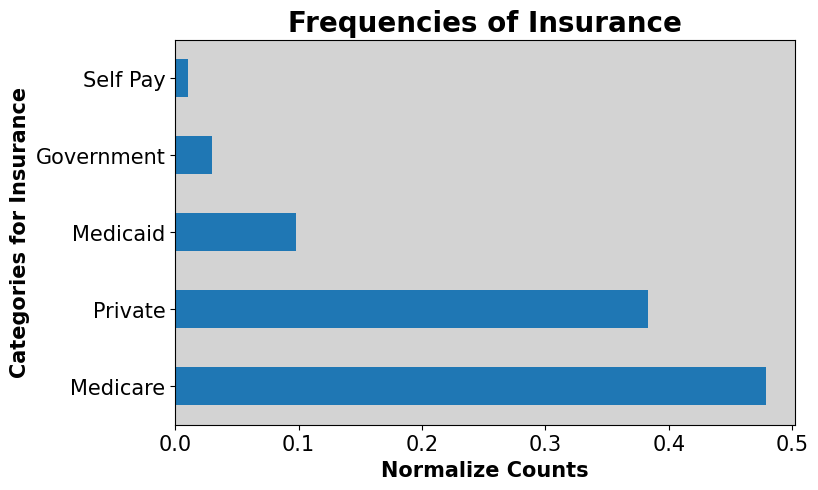

In [26]:
plot_bar_all_features(df_copy, 'insurance', 'Insurance')

Value_counts religion
CATHOLIC                  0.349396
NOT SPECIFIED             0.207050
UNOBTAINABLE              0.140210
PROTESTANT QUAKER         0.120964
JEWISH                    0.090104
OTHER                     0.045714
EPISCOPALIAN              0.013124
GREEK ORTHODOX            0.007783
CHRISTIAN SCIENTIST       0.007274
BUDDHIST                  0.004527
MUSLIM                    0.003815
JEHOVAH'S WITNESS         0.002357
UNITARIAN-UNIVERSALIST    0.002103
HINDU                     0.001916
ROMANIAN EAST. ORTH       0.001407
7TH DAY ADVENTIST         0.001373
BAPTIST                   0.000475
HEBREW                    0.000271
METHODIST                 0.000119
LUTHERAN                  0.000017
Name: religion, dtype: float64

 



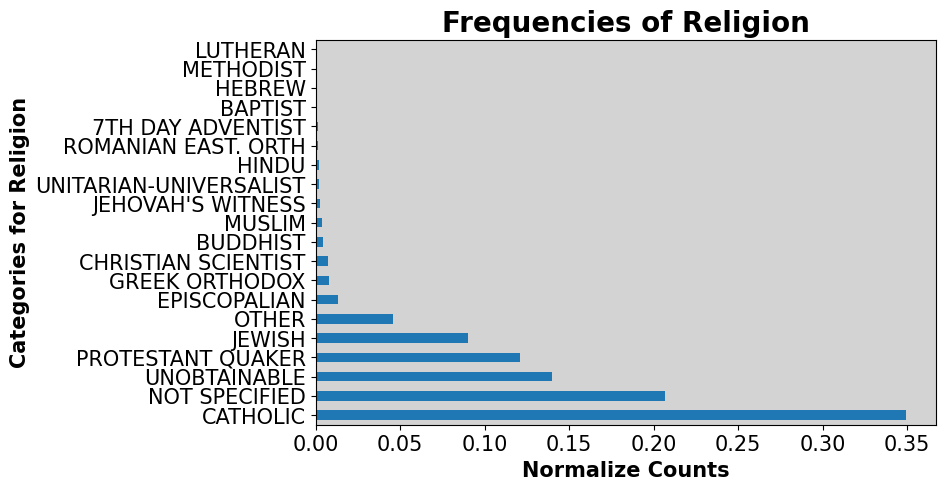

In [27]:
plot_bar_all_features(df_copy, 'religion', 'Religion')

Value_counts marital_status
MARRIED              0.410998
SINGLE               0.224735
UNKNOWN (DEFAULT)    0.177581
WIDOWED              0.122270
DIVORCED             0.054480
SEPARATED            0.009682
LIFE PARTNER         0.000254
Name: marital_status, dtype: float64

 



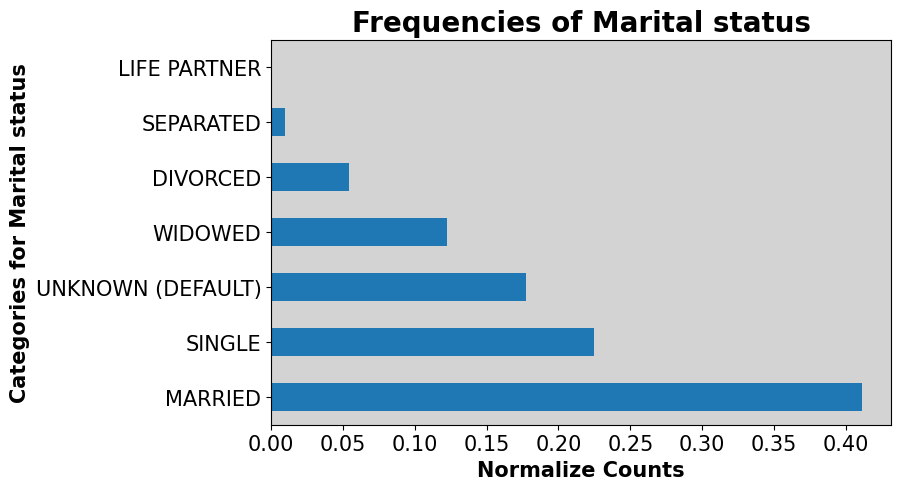

In [28]:
plot_bar_all_features(df_copy, 'marital_status', 'Marital status')

Value_counts ethnicity
WHITE                                                       0.695130
BLACK/AFRICAN AMERICAN                                      0.092241
UNKNOWN/NOT SPECIFIED                                       0.076692
HISPANIC OR LATINO                                          0.028757
OTHER                                                       0.025638
ASIAN                                                       0.025587
UNABLE TO OBTAIN                                            0.013802
PATIENT DECLINED TO ANSWER                                  0.009478
ASIAN - CHINESE                                             0.004697
HISPANIC/LATINO - PUERTO RICAN                              0.003934
BLACK/CAPE VERDEAN                                          0.003391
WHITE - RUSSIAN                                             0.002781
MULTI RACE ETHNICITY                                        0.002204
BLACK/HAITIAN                                               0.001713
ASIAN - ASI

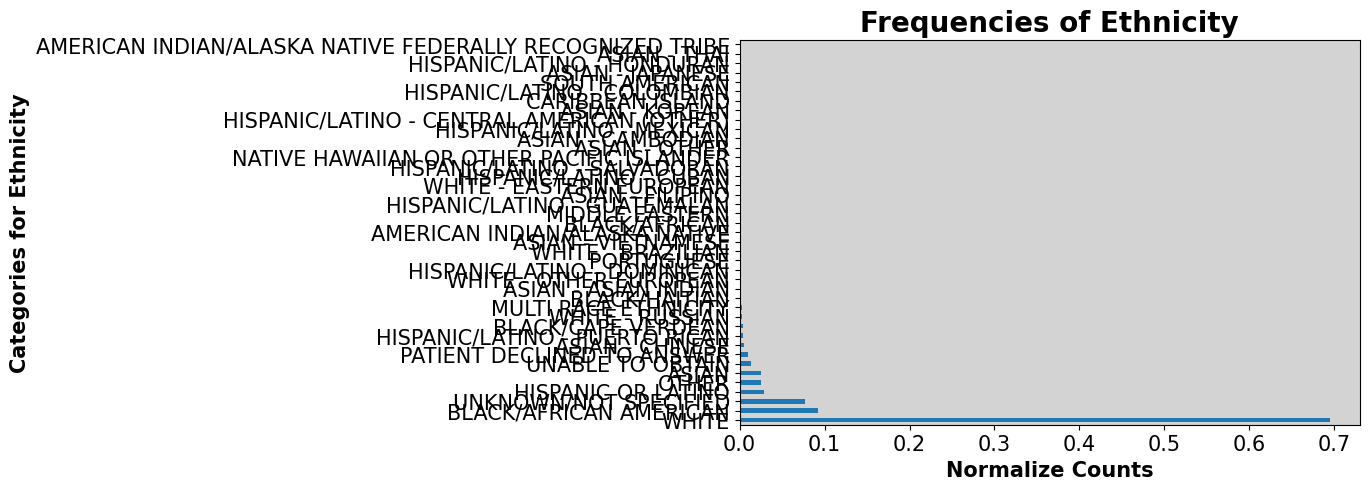

In [29]:
plot_bar_all_features(df_copy, 'ethnicity', 'Ethnicity')

In [30]:
# join some ethnicity

replacement_dict = {'HISPANIC/LATINO - PUERTO RICAN': 'HISPANIC OR LATINO',
    'HISPANIC/LATINO - DOMINICAN': 'HISPANIC OR LATINO', 'HISPANIC/LATINO - GUATEMALAN': 'HISPANIC OR LATINO', 
    'HISPANIC/LATINO - CUBAN': 'HISPANIC OR LATINO', 'HISPANIC/LATINO - SALVADORAN': 'HISPANIC OR LATINO', 
    'HISPANIC/LATINO - SALVADORAN ': 'HISPANIC OR LATINO',  'HISPANIC/LATINO - MEXICAN ': 'HISPANIC OR LATINO', 
    'HISPANIC/LATINO - MEXICAN': 'HISPANIC OR LATINO', 'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)': 'HISPANIC OR LATINO',
      'HISPANIC/LATINO - COLOMBIAN': 'HISPANIC OR LATINO', 'HISPANIC/LATINO - HONDURAN': 'HISPANIC OR LATINO', 
    'UNABLE TO OBTAIN': 'UNKNOWN/NOT SPECIFIED', 'PATIENT DECLINED TO ANSWER': 'UNKNOWN/NOT SPECIFIED', 
    'ASIAN - CHINESE' :  'ASIAN',    'ASIAN - ASIAN INDIAN':  'ASIAN',  'ASIAN - VIETNAMESE':  'ASIAN',
    'ASIAN - FILIPINO':  'ASIAN', 'ASIAN - OTHER':  'ASIAN','ASIAN - CAMBODIAN':  'ASIAN','ASIAN - KOREAN':  'ASIAN',
    'ASIAN - JAPANESE':  'ASIAN','ASIAN - THAI':  'ASIAN', 'BLACK/AFRICAN AMERICAN': 'BLACK', 'BLACK/CAPE VERDEAN': 'BLACK', 
     'BLACK/HAITIAN': 'BLACK',  'BLACK/AFRICAN': 'BLACK', 'SOUTH AMERICAN': 'HISPANIC OR LATINO', 'WHITE - RUSSIAN':'WHITE',
        
    'PORTUGUESE': 'HISPANIC OR LATINO', 'WHITE - BRAZILIAN': 'HISPANIC OR LATINO', 'WHITE - OTHER EUROPEAN':'WHITE', 
     'WHITE - EASTERN EUROPEAN': 'WHITE', 'MIDDLE EASTERN': 'WHITE', 'MULTI RACE ETHNICITY': 'OTHER',  
    'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE': 'AMERICAN INDIAN', 'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE': 'AMERICAN INDIAN', 
     'AMERICAN INDIAN/ALASKA NATIVE': 'AMERICAN INDIAN', 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 'OTHER', 
      'CARIBBEAN ISLAND': 'OTHER'}         

In [31]:
# Replace values in the 'ethnicity' column
df_copy['ethnicity'] = df_copy['ethnicity'].replace(replacement_dict)


In [32]:
df_copy['ethnicity'].unique()

array(['WHITE', 'BLACK', 'HISPANIC OR LATINO', 'UNKNOWN/NOT SPECIFIED',
       'OTHER', 'ASIAN', 'AMERICAN INDIAN'], dtype=object)

Value_counts ethnicity
WHITE                    0.700437
UNKNOWN/NOT SPECIFIED    0.099973
BLACK                    0.098091
HISPANIC OR LATINO       0.038253
ASIAN                    0.034031
OTHER                    0.028300
AMERICAN INDIAN          0.000916
Name: ethnicity, dtype: float64

 



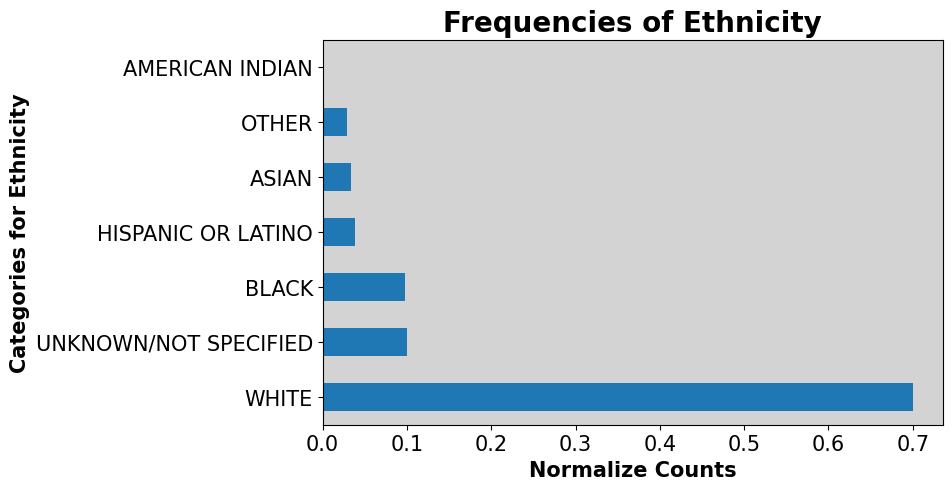

In [33]:
plot_bar_all_features(df_copy, 'ethnicity', 'Ethnicity')

In [34]:
def plot_bar_top_20_features(df, x, y):
    fig, ax = plt.subplots(figsize=(8, 10))

    # Compute the top 20 categories for the specified column
    top_10_categories = df[x].value_counts().head(20)
    
    print(f'Top 20 categories for {x}:')
    print(top_10_categories)
    print('\n')

    top_10_categories.plot(kind='barh')
    ax.set_facecolor("lightgray")

    ax.set_title(f'Top 20 Categories of {y}', fontsize=20, fontweight='bold')
    ax.set_ylabel(f'Categories for {y}', fontsize=15, fontweight='bold')
    ax.set_xlabel('Counts', fontsize=15, fontweight='bold')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)


Top 20 categories for AdmitProcedure:
na                          8032
Cont inv mec ven <96 hrs    3349
Vaccination NEC             2667
Venous cath NEC             1947
Insert endotracheal tube    1866
Circumcision                1707
Cont inv mec ven 96+ hrs    1620
Opn/oth rep aort vlv-tis    1358
1 int mam-cor art bypass    1178
Aortocor bypas-2 cor art    1029
PTCA                        1017
Non-invasive mech vent       987
Temporary tracheostomy       981
Sm bowel endoscopy NEC       962
Aortocor bypas-3 cor art     925
Hemodialysis                 637
Other phototherapy           619
Entral infus nutrit sub      609
Other brain excision         567
Opn/oth rep aortic valve     476
Name: AdmitProcedure, dtype: int64




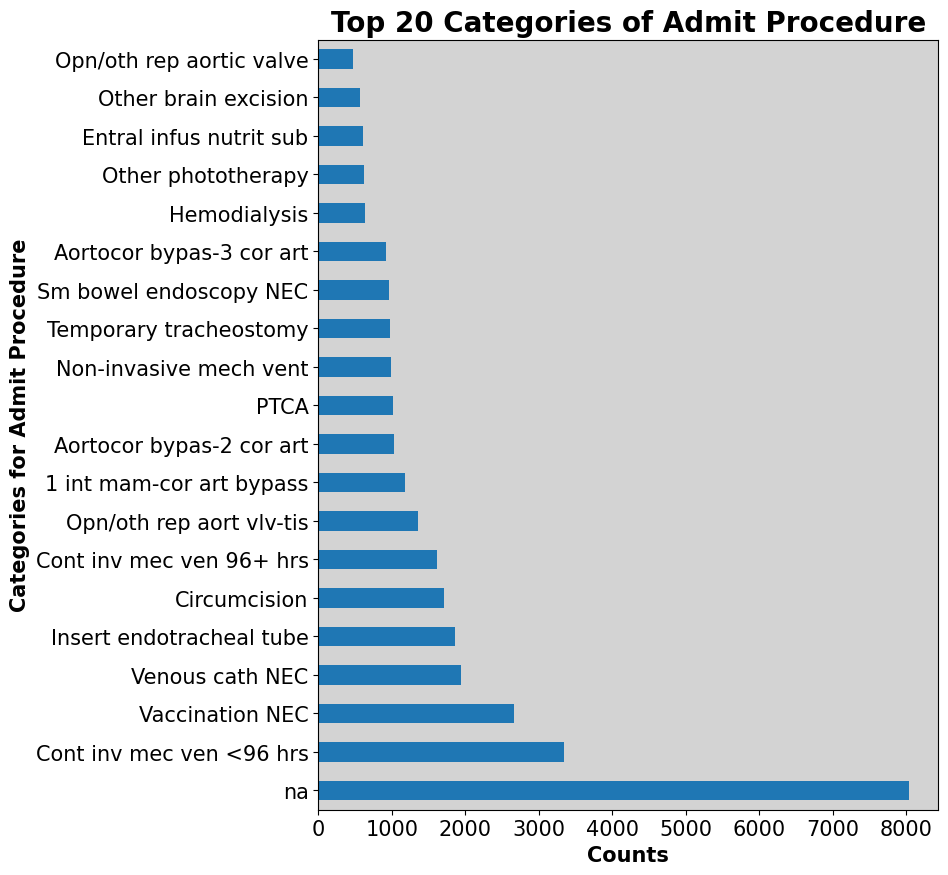

In [35]:
plot_bar_top_20_features(df_copy, 'AdmitProcedure', 'Admit Procedure')

Top 20 categories for AdmitDiagnosis:
NEWBORN                                                      7823
PNEUMONIA                                                    1566
SEPSIS                                                       1184
CONGESTIVE HEART FAILURE                                      928
CORONARY ARTERY DISEASE                                       840
CHEST PAIN                                                    778
INTRACRANIAL HEMORRHAGE                                       713
ALTERED MENTAL STATUS                                         712
GASTROINTESTINAL BLEED                                        686
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA     583
UPPER GI BLEED                                                580
ABDOMINAL PAIN                                                554
FEVER                                                         510
DIABETIC KETOACIDOSIS                                         462
CORONARY ARTERY DISEASE\CORONARY ARTER

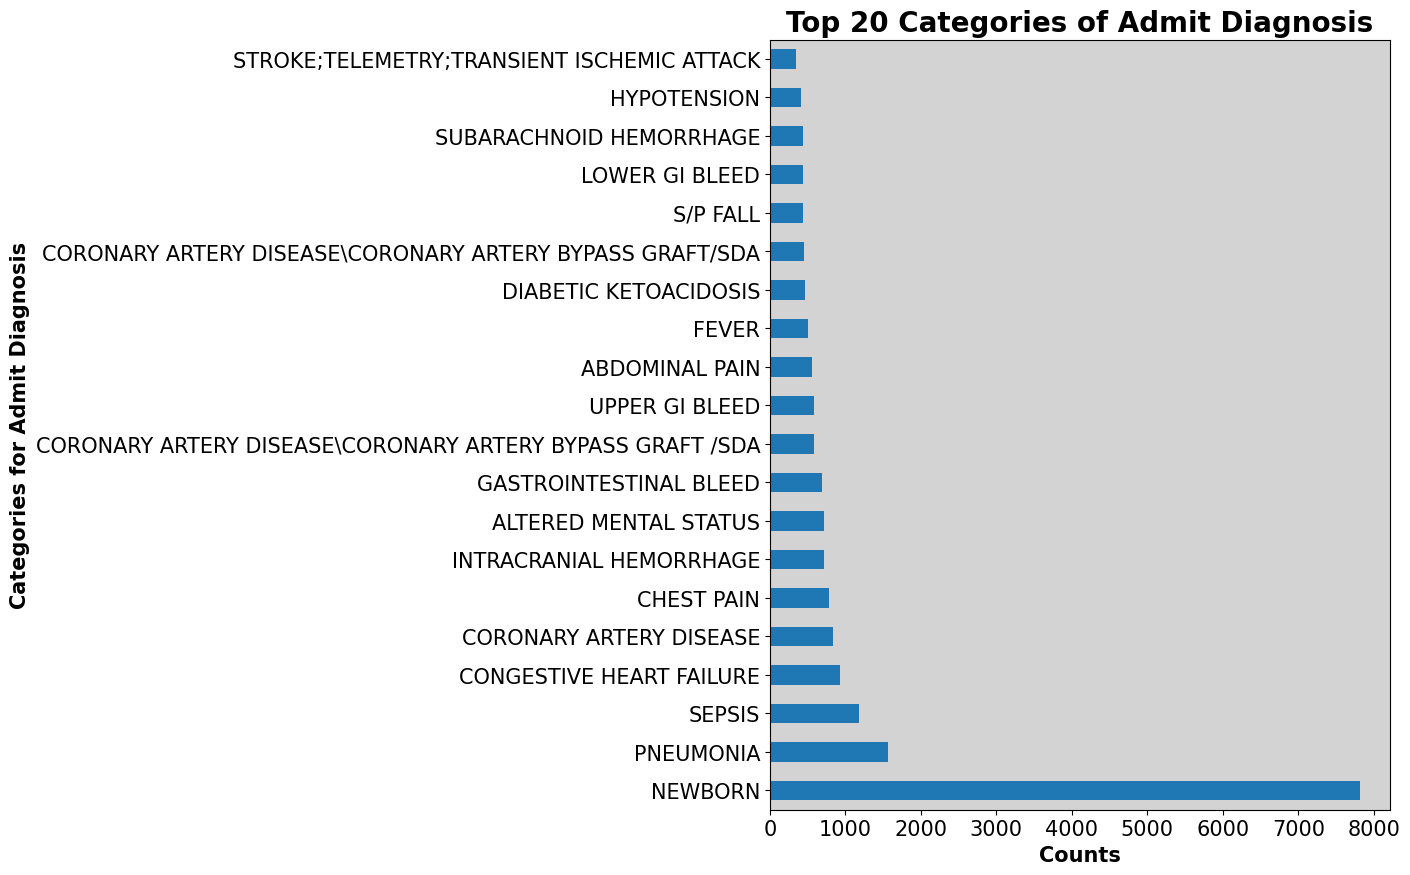

In [36]:
plot_bar_top_20_features(df_copy, 'AdmitDiagnosis', 'Admit Diagnosis')

In [37]:
string_cols

Index(['gender', 'admit_type', 'admit_location', 'AdmitDiagnosis', 'insurance',
       'religion', 'marital_status', 'ethnicity', 'AdmitProcedure'],
      dtype='object')

In [38]:
df_copy['AdmitDiagnosis'].unique()

array(['DIABETIC KETOACIDOSIS', 'UPPER GI BLEED', 'COPD FLARE', ...,
       'CORONARY ARTERY DISEASE;UNSTABLE ANGINA\\CATH',
       'CHEST PAIN;ELEVATED TROPONIN', 'ROOT ABSCESS'], dtype=object)

Value_counts ExpiredHospital
0    0.900739
1    0.099261
Name: ExpiredHospital, dtype: float64

 



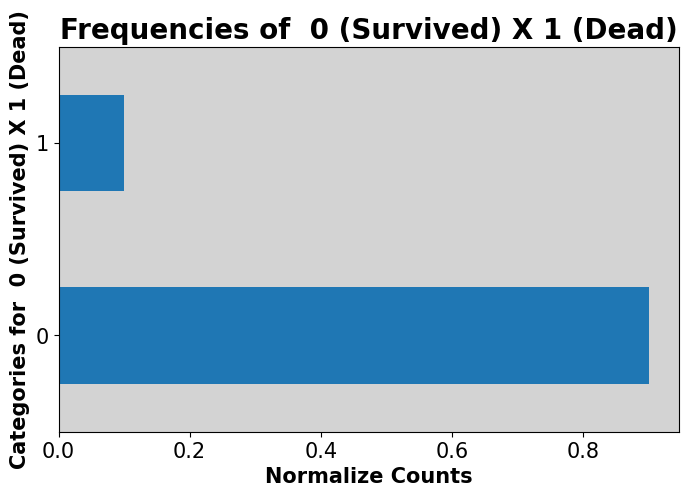

In [39]:
plot_bar_all_features(df_copy, 'ExpiredHospital', ' 0 (Survived) X 1 (Dead)')

In [40]:
def histplot_all_features(df,col,y):
    fig, ax = plt.subplots(figsize=(8,5))
    sns.histplot(data=df,x = col, bins=100)
    mean_value = df[col].mean()
    ax.axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}")
    ax.legend()
    ax.set_facecolor("lightgray")

    ax.set_title(f'Distribution of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_ylabel(f'Count', fontsize = 15, fontweight = 'bold')
    ax.set_xlabel(col, fontsize = 15, fontweight = 'bold')
    #plt.tight_layout()
    plt.xticks(fontsize = 12, weight='bold')
    plt.yticks(fontsize = 12, weight='bold')
    plt.show()

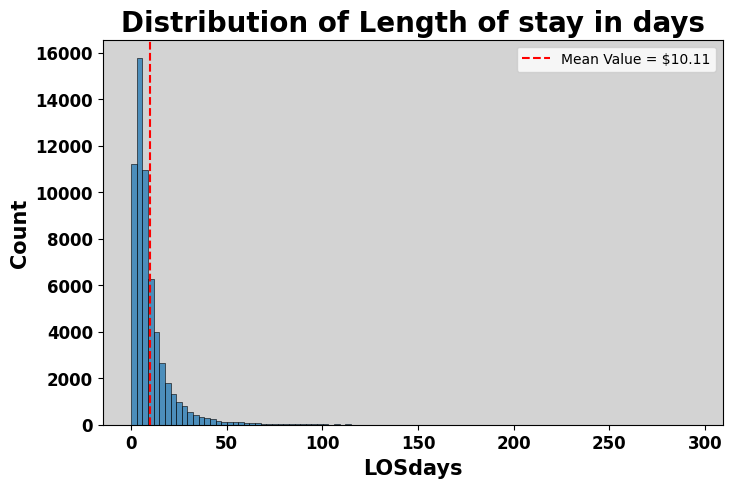

In [41]:
histplot_all_features(df_copy,'LOSdays', 'Length of stay in days')

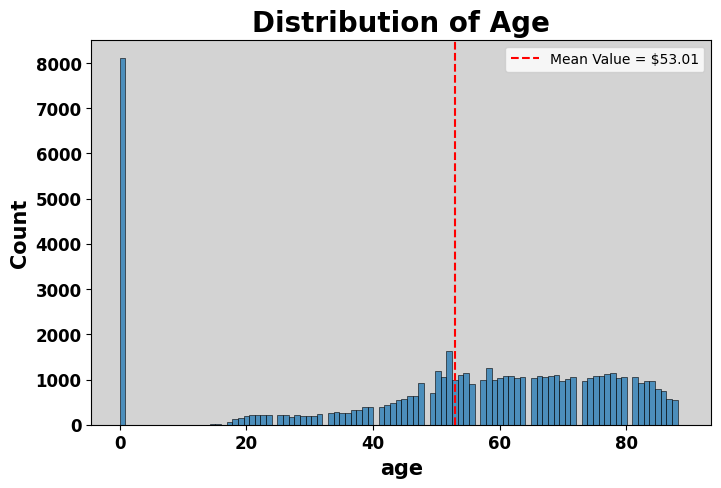

In [42]:
histplot_all_features(df_copy,'age', 'Age')

## Create a new column to group ages ronded to 10

In [43]:
df_copy['age_round'] = df_copy['age'].round(-1)
# check age round
df_copy['age_round'].value_counts()

60    11597
80    11206
70     9304
50     8883
0      8110
40     4405
30     1945
90     1879
20     1646
10        1
Name: age_round, dtype: int64

In [44]:
  palette = sns.blend_palette(['blue', 'red'])

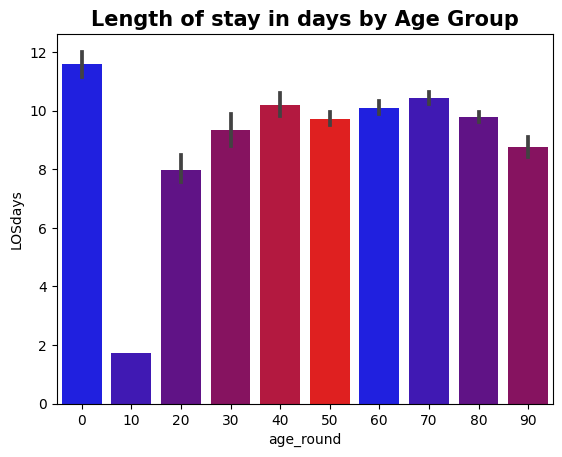

In [45]:
sns.barplot(data =df_copy, x=df_copy['age_round'], y= df_copy['LOSdays'], palette = palette)
plt.title('Length of stay in days by Age Group', fontsize=15, weight='bold')
plt.show()

# Check the outliers

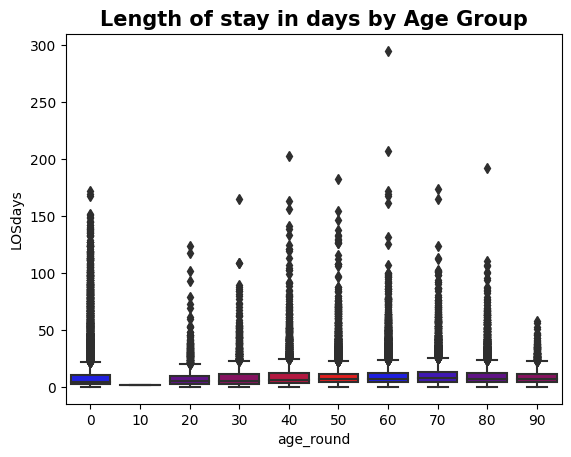

In [46]:
sns.boxplot(data = df_copy, x=df_copy['age_round'], y = df_copy['LOSdays'], palette = palette)
plt.title('Length of stay in days by Age Group', fontsize=15, weight='bold')
plt.show()

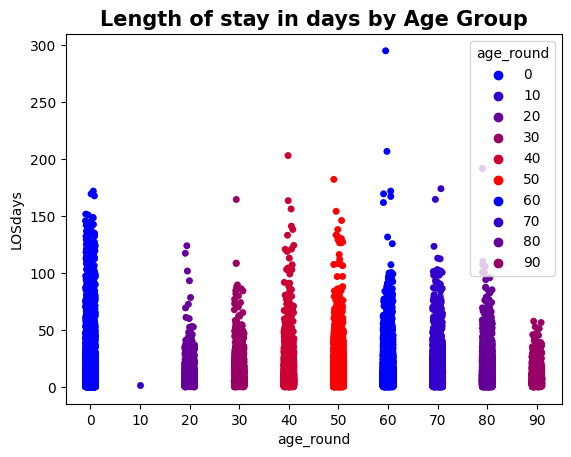

In [47]:
sns.stripplot(data =df_copy, x=df_copy['age_round'], y= df_copy['LOSdays'], hue=df_copy['age_round'], palette = palette )
plt.title('Length of stay in days by Age Group', fontsize=15, weight='bold')
plt.show()

<AxesSubplot:title={'center':'Length of stay in days by Age Group'}, xlabel='age_round', ylabel='LOSdays'>

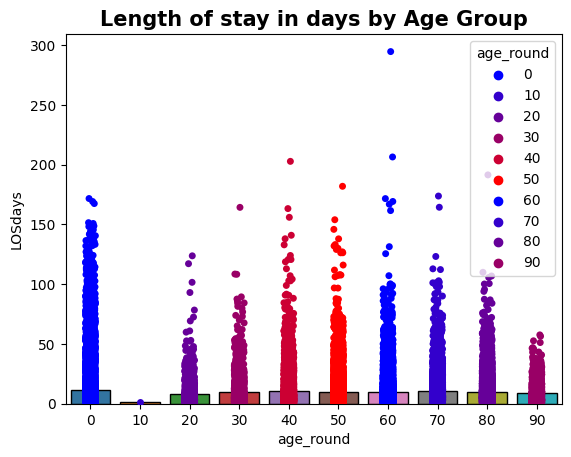

In [48]:
sns.stripplot(data =df_copy, x=df_copy['age_round'], y= df_copy['LOSdays'], hue=df_copy['age_round'], palette = palette )
plt.title('Length of stay in days by Age Group', fontsize=15, weight='bold')
sns.barplot(data =df_copy, x=df_copy['age_round'], y= df_copy['LOSdays'], linewidth=1, edgecolor='black', errorbar=None, )



# observation : 
There are a lot of outliers 

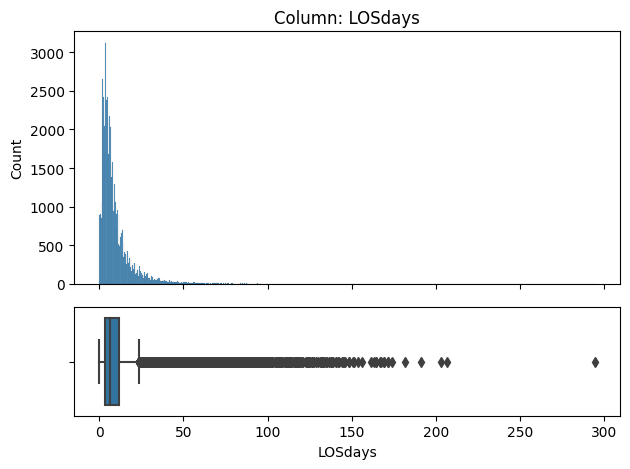

In [49]:
# Specify the x column
x = "LOSdays"

# Creating the figure
#fig, axes = plt.subplots(nrows=2,  figsize=(6,6), sharex=True)
gridspec = {"height_ratios":[0.7,0.3]}

fig, axes = plt.subplots(nrows=2, gridspec_kw=gridspec, sharex=True)
# Histogram on Top
sns.histplot(data=df_copy, x=x, ax=axes[0])

# Boxplot on Bottom
sns.boxplot(data=df_copy, x=x, ax=axes[1])

axes[0].set_title(f"Column: {x}")

fig.tight_layout()

### Identifying correlations with heatmap.

In [50]:
# Explore correlations
from dython.nominal import associations

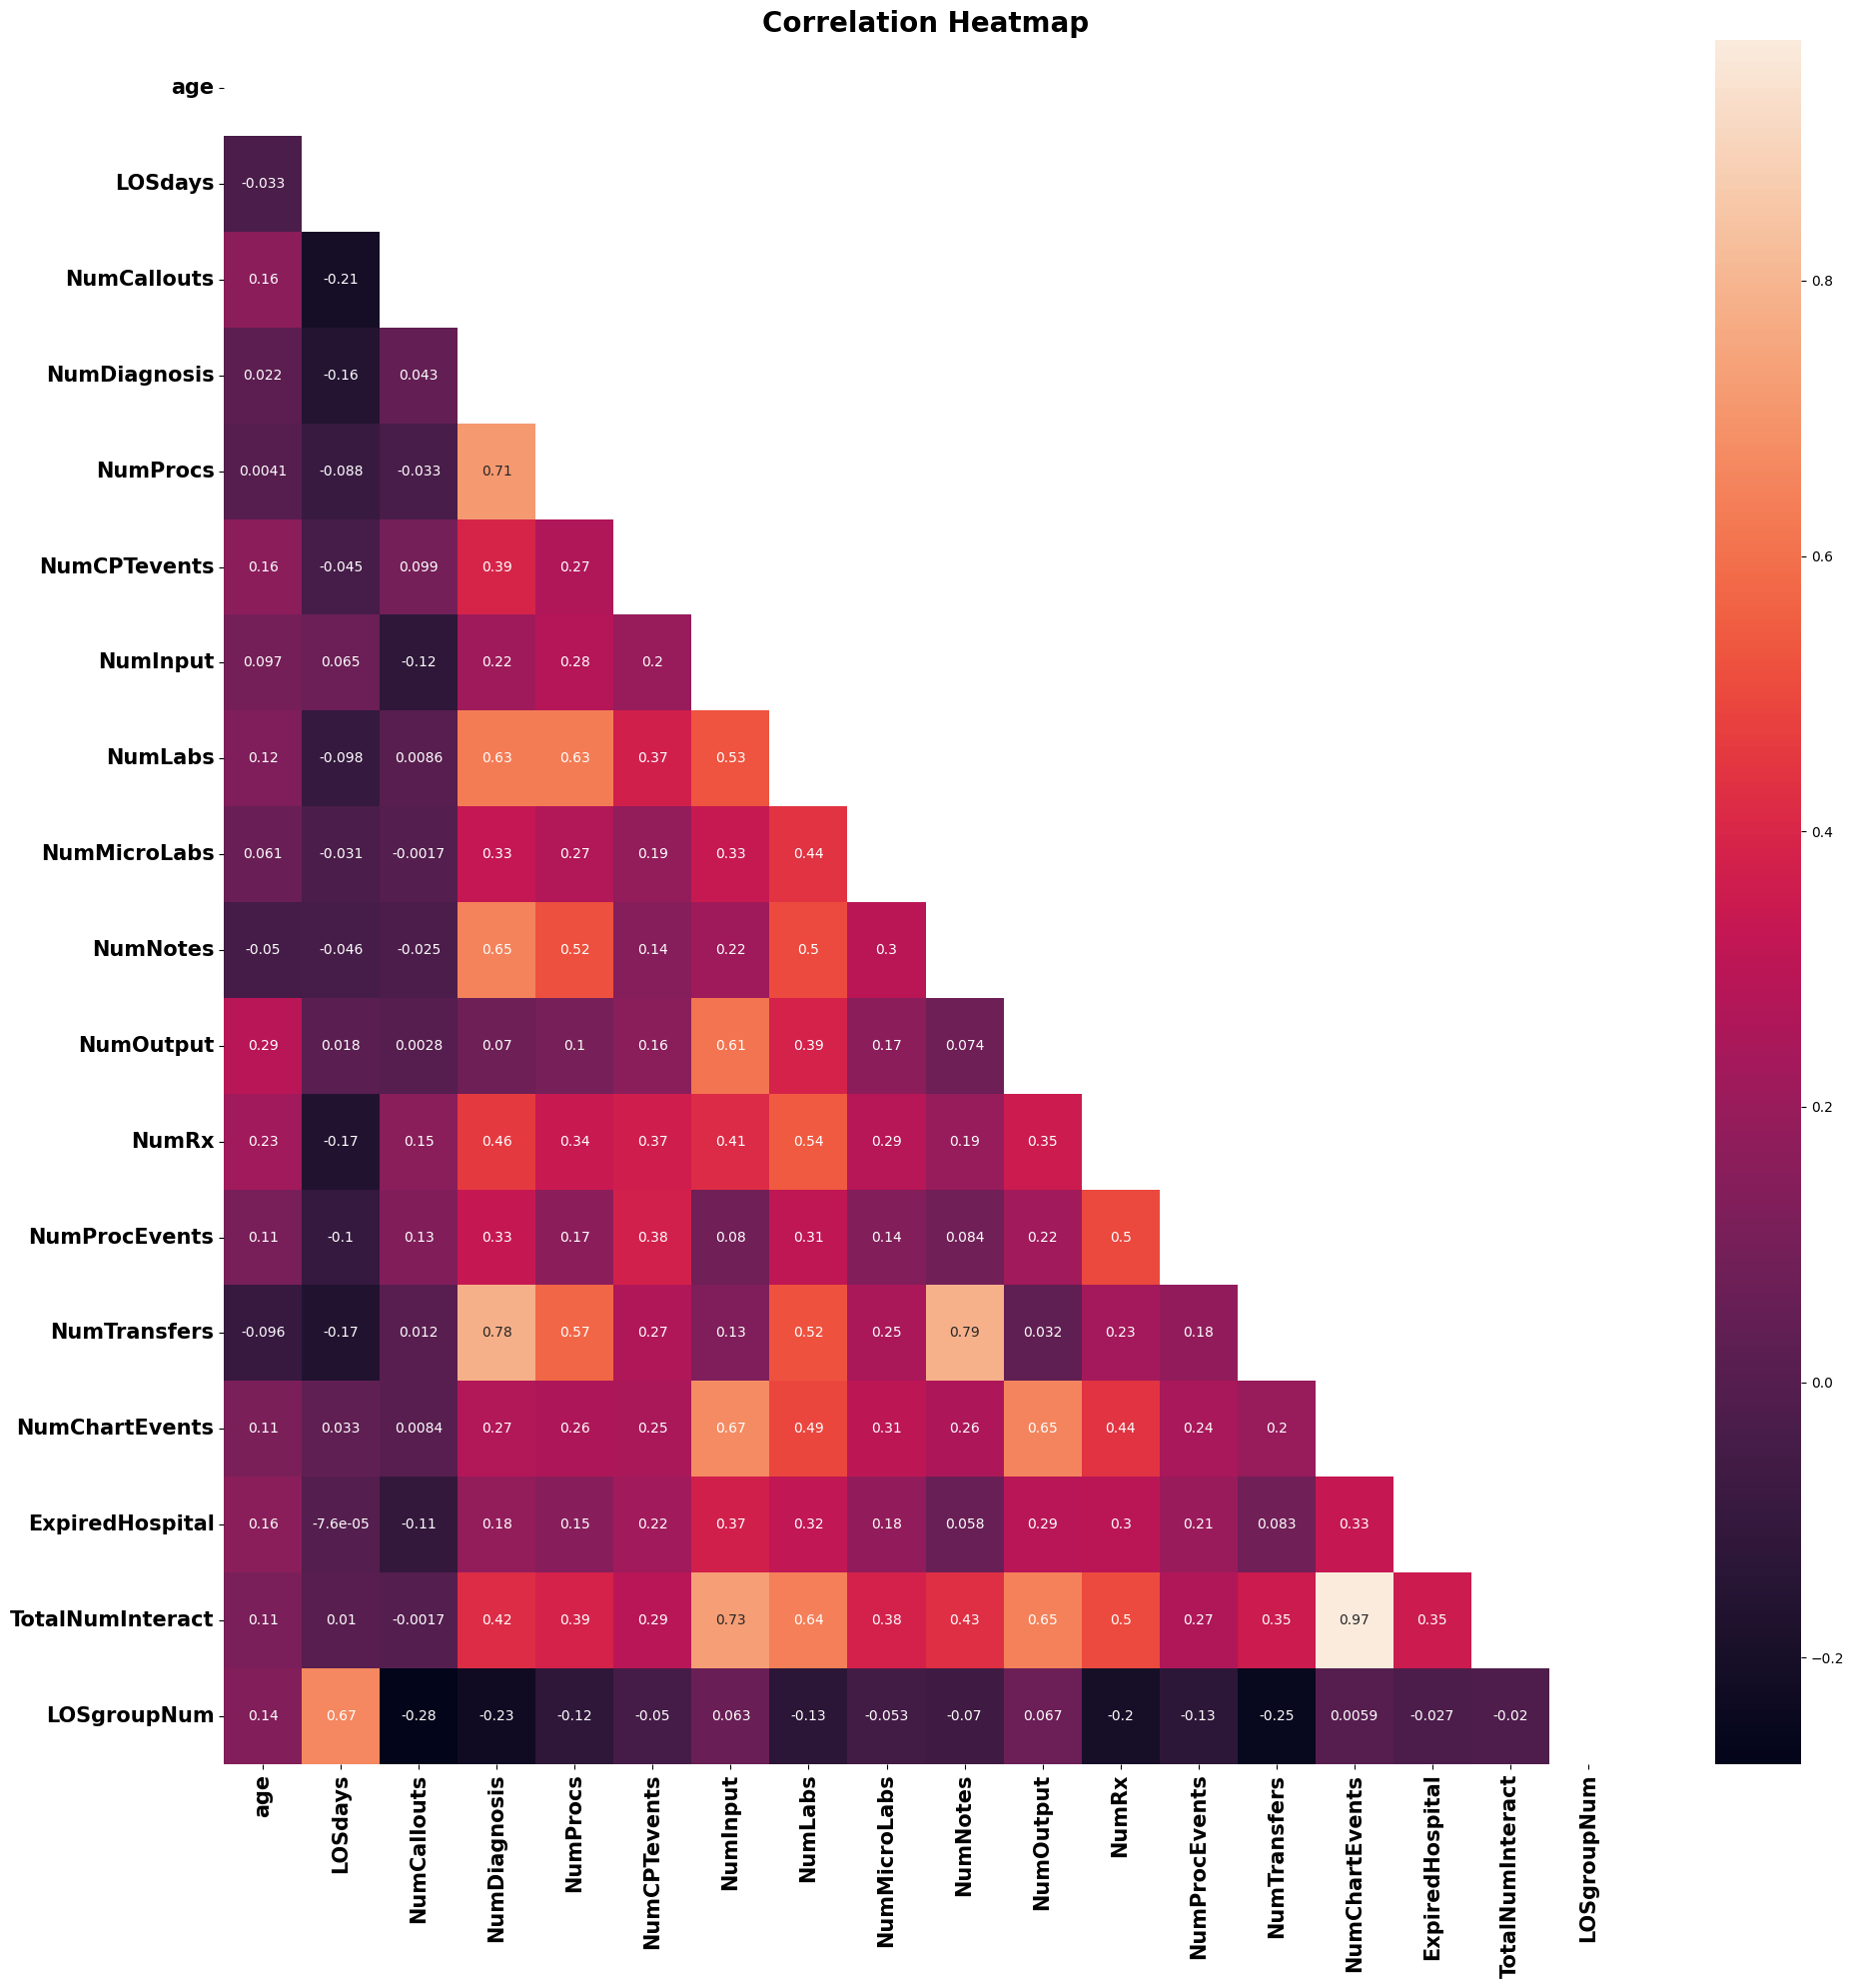

In [51]:
plt.figure(figsize = (20, 20))
# Calculating the mask to hide the upper-right of the triangle
corr = df_number.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, mask=mask);

plt.title('Correlation Heatmap', fontsize = 20, weight='bold')
plt.xticks(fontsize = 15, weight='bold', rotation=90)
plt.yticks(fontsize = 15, weight='bold');

plt.tight_layout()
plt.show;

### Observation:
There is no correlation between age and any other column. There is some correlation between NumTransfers and NumDiagnosis, NumTransfers and NumNotes, NumProcs and NumDiagnosis, TotalNumInteract and NumChartEvents, TotalNumInteract and NumInput

In [52]:
def plot_numeric_vs_target(df, x, y, figsize=(6,4), **kwargs): # kwargs for sns.regplot

  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)

  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)

  scatter_kws={'ec':'white','lw':1,'alpha':0.8}

  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs)
   # Included the new argument within the sns.regplot function
  ## Add the title with the correlation

  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

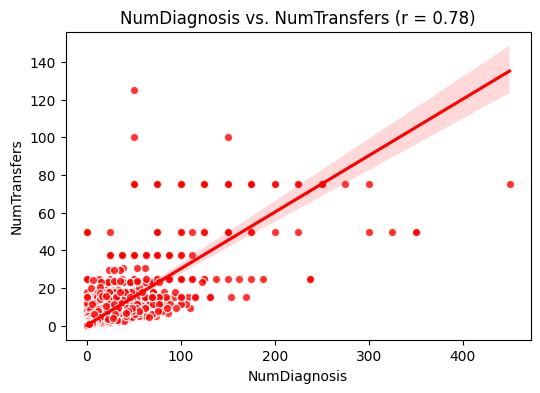

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:title={'center':'NumDiagnosis vs. NumTransfers (r = 0.78)'}, xlabel='NumDiagnosis', ylabel='NumTransfers'>)

In [53]:
plot_numeric_vs_target(df_number, 'NumDiagnosis', 'NumTransfers', figsize=(6,4), color = 'red')

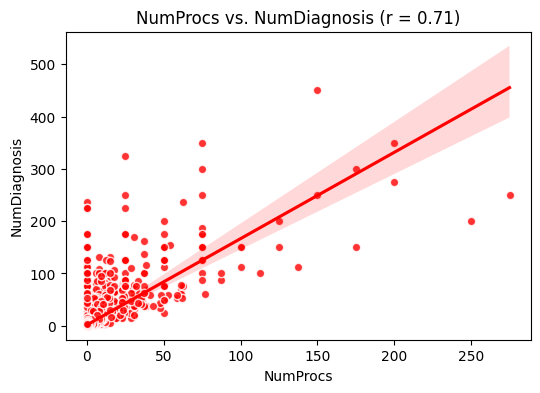

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:title={'center':'NumProcs vs. NumDiagnosis (r = 0.71)'}, xlabel='NumProcs', ylabel='NumDiagnosis'>)

In [54]:
plot_numeric_vs_target(df_number, 'NumProcs', 'NumDiagnosis', figsize=(6,4), color = 'red')

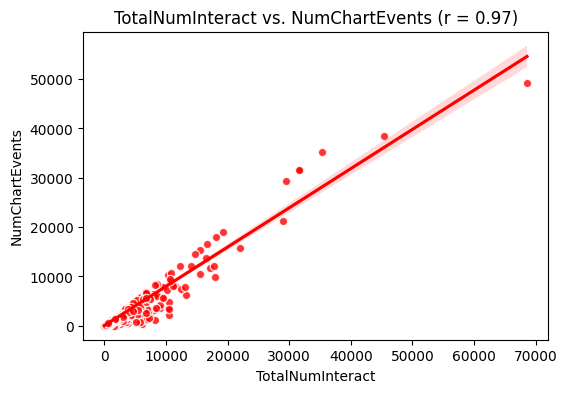

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:title={'center':'TotalNumInteract vs. NumChartEvents (r = 0.97)'}, xlabel='TotalNumInteract', ylabel='NumChartEvents'>)

In [55]:
plot_numeric_vs_target(df_number, 'TotalNumInteract', 'NumChartEvents', figsize=(6,4), color = 'red')

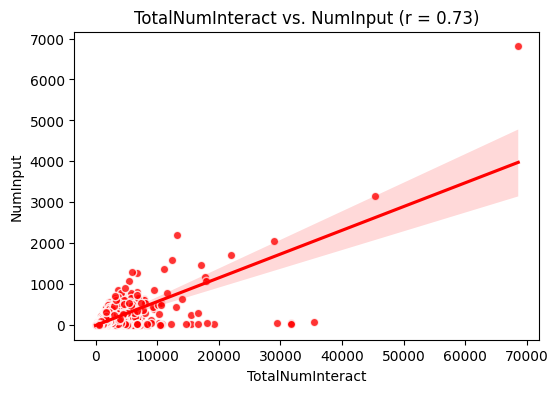

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:title={'center':'TotalNumInteract vs. NumInput (r = 0.73)'}, xlabel='TotalNumInteract', ylabel='NumInput'>)

In [56]:
plot_numeric_vs_target(df_number, 'TotalNumInteract', 'NumInput', figsize=(6,4), color = 'red')

In [57]:
df_copy.columns

Index(['gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum',
       'age_round'],
      dtype='object')

<AxesSubplot:>

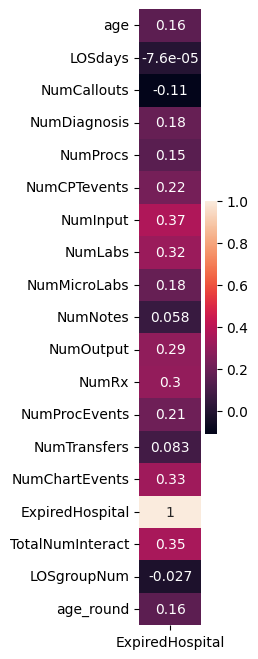

In [58]:
# check only stroke column
corr = df_copy.corr()[['ExpiredHospital']]
plt.figure(figsize= (1,8))
sns.heatmap(corr, annot = True)

Expired has a higher correlation with 'NumInput', 'NumLabs', 'NumRx', 'NumChartEvents','TotalNumInteract'(> 0.3) 

## Comparation of all features in patients who Survived (0) or Died (1)


 gender


count unique top   freq
ExpiredHospital                         
0                53122      2   M  29796
1                 5854      2   M   3154

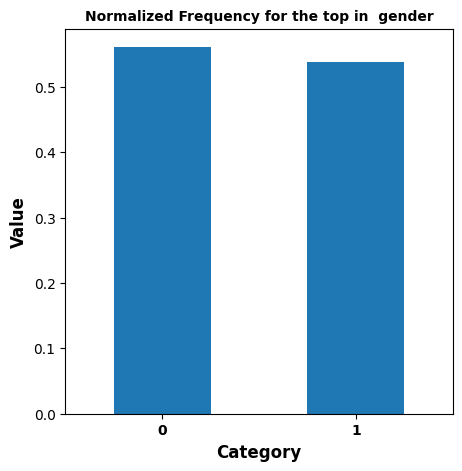


 


 admit_type


count unique        top   freq
ExpiredHospital                                
0                53122      4  EMERGENCY  36637
1                 5854      4  EMERGENCY   5434

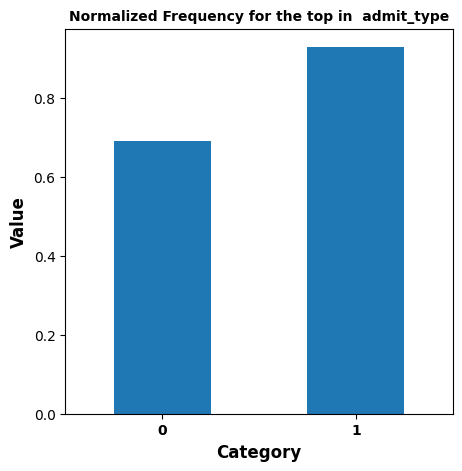


 


 admit_location


count unique                   top   freq
ExpiredHospital                                           
0                53122      9  EMERGENCY ROOM ADMIT  19663
1                 5854      8  EMERGENCY ROOM ADMIT   3091

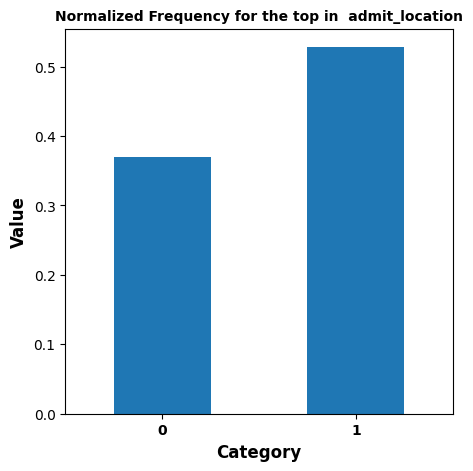


 


 AdmitDiagnosis


count unique      top  freq
ExpiredHospital                             
0                53122  14232  NEWBORN  7761
1                 5854   2341   SEPSIS   267

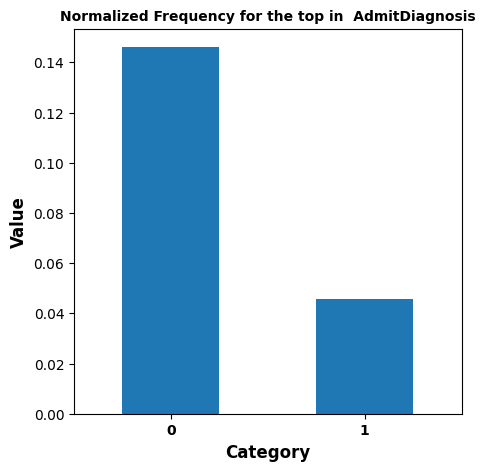


 


 insurance


count unique       top   freq
ExpiredHospital                               
0                53122      5  Medicare  24310
1                 5854      5  Medicare   3905

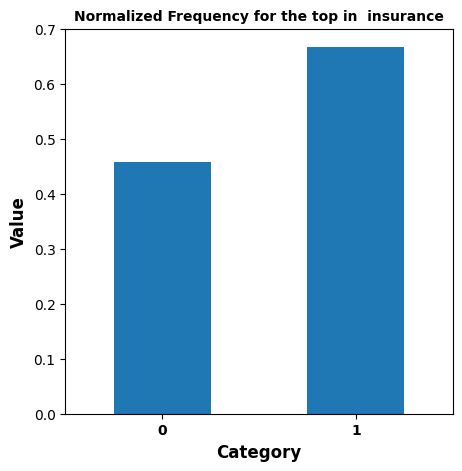


 


 religion


count unique       top   freq
ExpiredHospital                               
0                53122     20  CATHOLIC  18685
1                 5854     19  CATHOLIC   1921

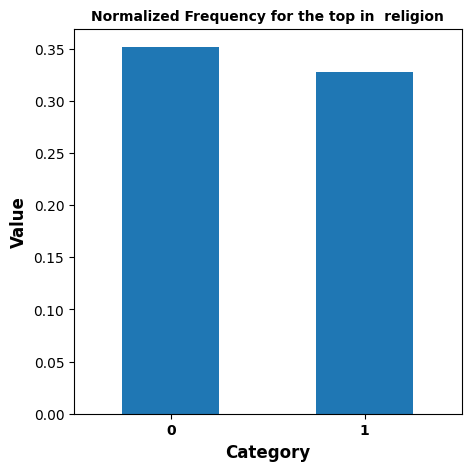


 


 marital_status


count unique      top   freq
ExpiredHospital                              
0                53122      7  MARRIED  21629
1                 5854      6  MARRIED   2610

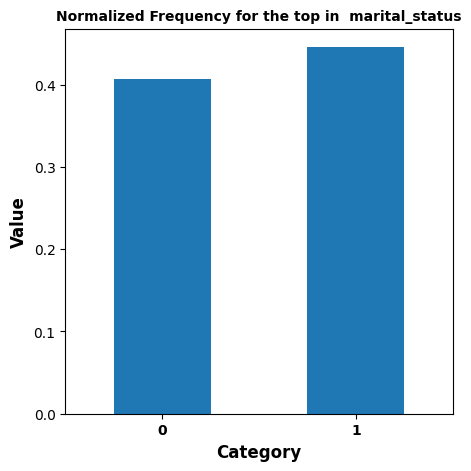


 


 ethnicity


count unique    top   freq
ExpiredHospital                            
0                53122      7  WHITE  37229
1                 5854      7  WHITE   4080

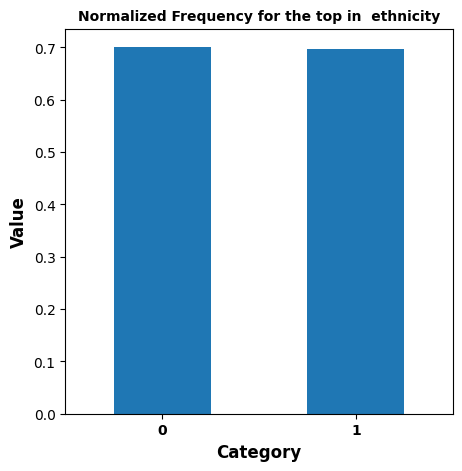


 


 AdmitProcedure


count unique                       top  freq
ExpiredHospital                                              
0                53122   1242                        na  7437
1                 5854    456  Cont inv mec ven <96 hrs   960

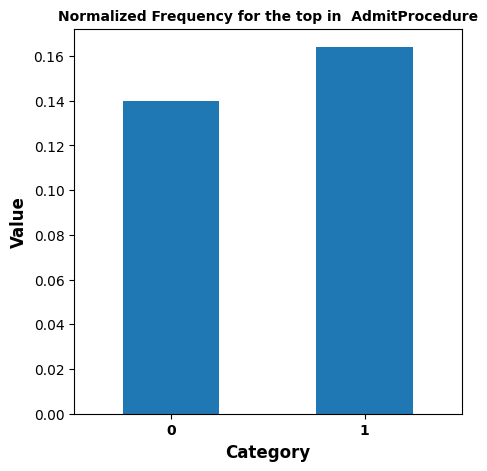

In [59]:
ExpiredHospital_groupby = df_copy.groupby('ExpiredHospital')
# First string columns

for col in df_string.columns:
    print('\n', col)
    describe_stats = ExpiredHospital_groupby[col].describe()
    display(ExpiredHospital_groupby[col].describe())
    # Calculate 'freq' normalized by 'count'
    describe_stats['freq_normalized'] = describe_stats['freq'] / describe_stats['count']

    # Filter the statistics to include in the plot
    describe_stats_filtered = describe_stats[['freq_normalized']]

    # Create a bar plot for the filtered describe result of the current column
    fig, ax = plt.subplots(figsize=(5, 5))
    describe_stats_filtered.plot(kind='bar', ax=ax)
    ax.set_title(f'Normalized Frequency for the top in  {col}', fontsize=10, fontweight='bold')
    ax.set_ylabel('Value', fontsize=12, fontweight='bold')
    ax.set_xlabel('Category', fontsize=12, fontweight='bold')
    ax.get_legend().remove()
    plt.xticks(rotation=0, fontsize=10, fontweight='bold')

    plt.show()
    print('\n', '\n')




 age


count       mean        std  min   25%   50%   75%   max
ExpiredHospital                                                            
0                53122.0  51.644874  26.512853  0.0  40.0  58.0  72.0  89.0
1                 5854.0  65.356338  16.645122  0.0  54.0  68.0  79.0  88.0

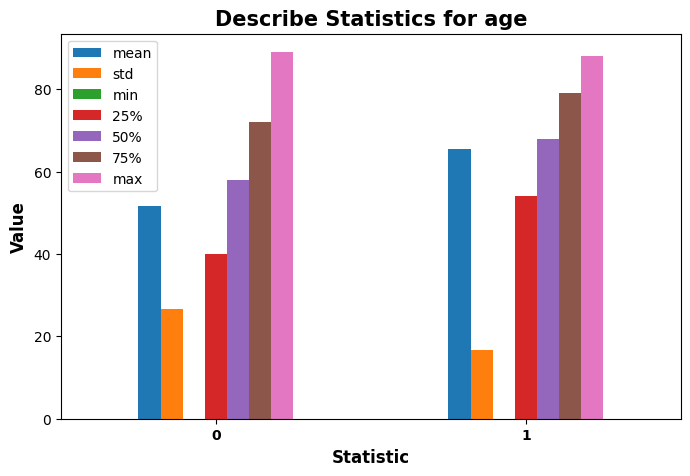


 


 LOSdays


count       mean        std  min   25%   50%    75%     max
ExpiredHospital                                                               
0                53122.0  10.115268  12.283752  0.0  3.83  6.54  11.70  294.63
1                 5854.0  10.112117  13.925228  0.0  1.83  5.79  12.92  206.42

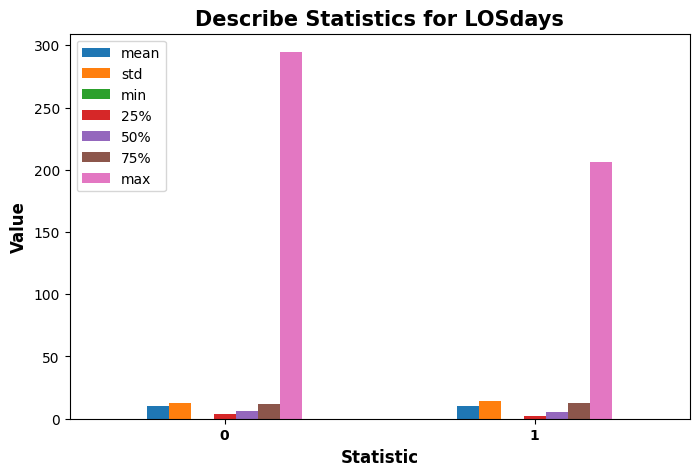


 


 NumCallouts


count      mean       std  min  25%   50%   75%   max
ExpiredHospital                                                         
0                53122.0  0.105303  0.164148  0.0  0.0  0.04  0.17  4.00
1                 5854.0  0.045567  0.146236  0.0  0.0  0.00  0.00  4.76

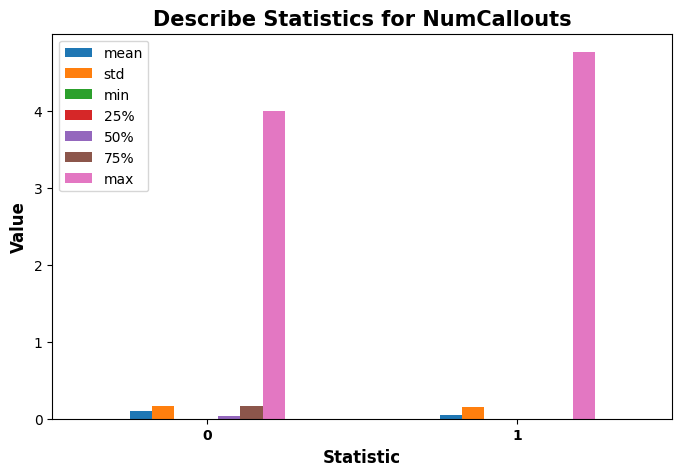


 


 NumDiagnosis


count      mean        std  min   25%   50%   75%    max
ExpiredHospital                                                            
0                53122.0  2.169783   5.402133  0.0  0.81  1.36  2.27  325.0
1                 5854.0  7.269250  20.002639  0.0  1.02  2.12  5.31  450.0

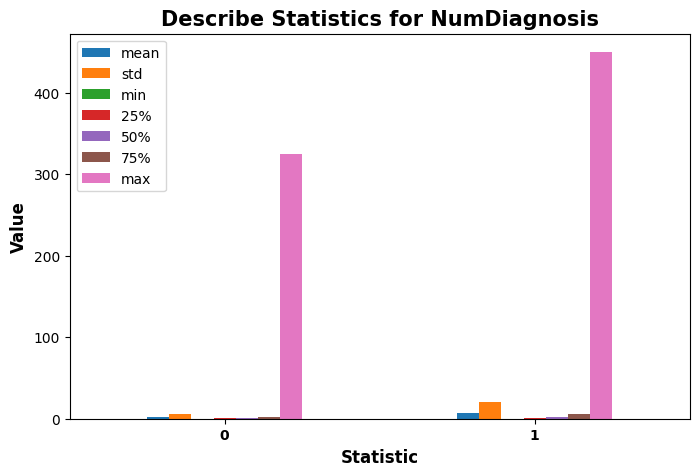


 


 NumProcs


count      mean        std  min   25%   50%   75%    max
ExpiredHospital                                                            
0                53122.0  0.608191   1.633973  0.0  0.20  0.40  0.68   75.0
1                 5854.0  2.395485  10.022643  0.0  0.31  0.63  1.50  275.0

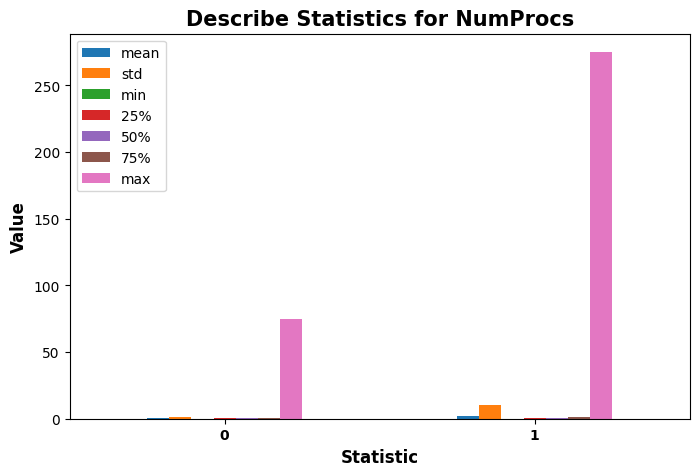


 


 NumCPTevents


count      mean       std  min  25%   50%   75%    max
ExpiredHospital                                                          
0                53122.0  0.924569  1.210518  0.0  0.0  0.87  1.46  175.0
1                 5854.0  2.431201  5.105037  0.0  1.0  1.82  2.79  225.0

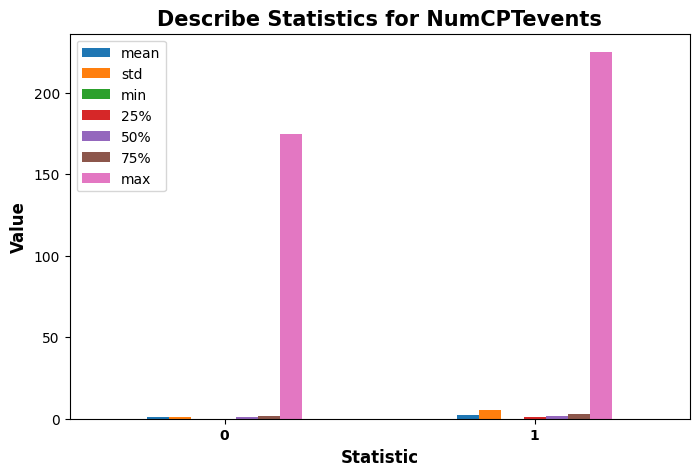


 


 NumInput


count       mean         std  min      25%     50%  \
ExpiredHospital                                                         
0                53122.0  22.741493   31.170210  0.0   4.3700  12.370   
1                 5854.0  99.685569  158.492899  0.0  21.8875  56.585   

                     75%      max  
ExpiredHospital                    
0                 29.170   869.77  
1                130.625  6825.00

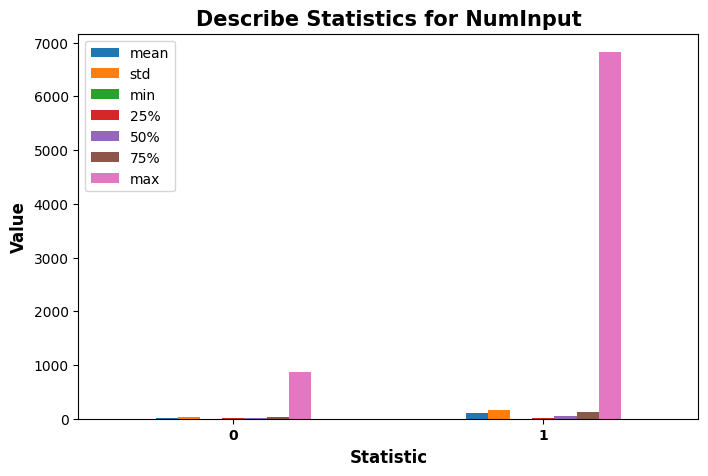


 


 NumLabs


count        mean         std  min      25%    50%  \
ExpiredHospital                                                         
0                53122.0   38.424159   32.588075  0.0  25.6800  37.06   
1                 5854.0  118.989419  206.899931  0.0  46.0825  68.87   

                      75%     max  
ExpiredHospital                    
0                 47.7600  1525.0  
1                116.7975  5175.0

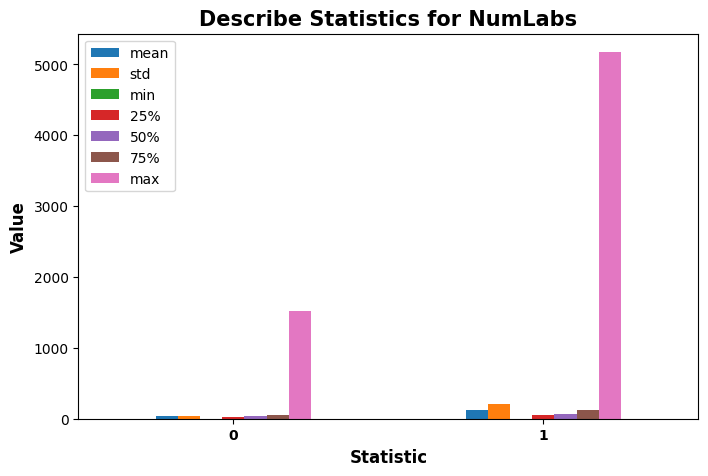


 


 NumMicroLabs


count      mean        std  min   25%   50%     75%    max
ExpiredHospital                                                              
0                53122.0  0.963973   1.883073  0.0  0.14  0.46  1.1700  164.0
1                 5854.0  3.542433  11.945214  0.0  0.74  1.64  3.1475  375.0

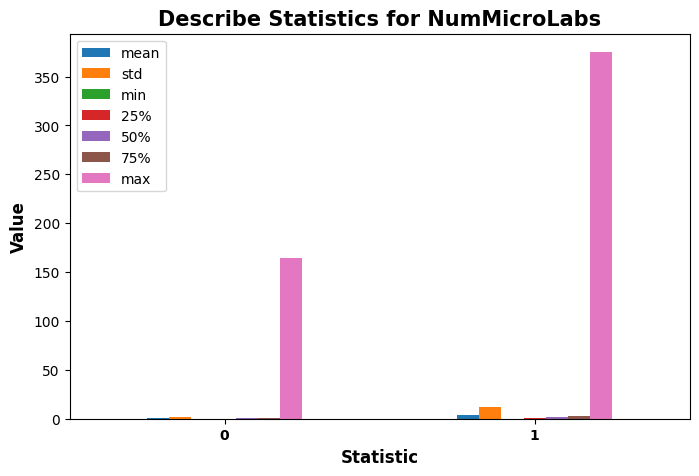


 


 NumNotes


count       mean         std  min   25%   50%     75%  \
ExpiredHospital                                                            
0                53122.0   4.416369   91.849474  0.0  0.14  0.31  0.7000   
1                 5854.0  25.053133  194.384189  0.0  0.18  0.65  3.1375   

                    max  
ExpiredHospital          
0                7500.0  
1                5625.0

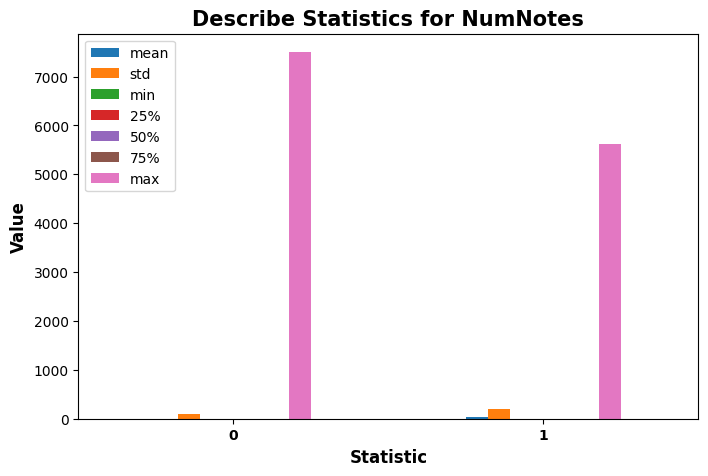


 


 NumOutput


count       mean        std  min   25%     50%    75%  \
ExpiredHospital                                                            
0                53122.0   6.377293   5.979771  0.0  1.58   4.880   9.59   
1                 5854.0  13.774990  14.170473  0.0  5.25  12.385  19.13   

                    max  
ExpiredHospital          
0                 76.19  
1                375.00

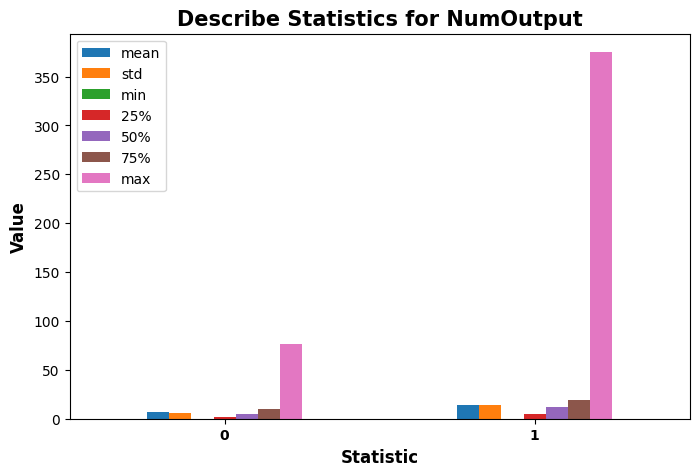


 


 NumRx


count       mean        std  min   25%    50%     75%  \
ExpiredHospital                                                            
0                53122.0   8.344814   7.033249  0.0  3.90   8.05  11.710   
1                 5854.0  20.926710  31.755997  0.0  7.85  12.56  21.445   

                   max  
ExpiredHospital         
0                375.0  
1                750.0

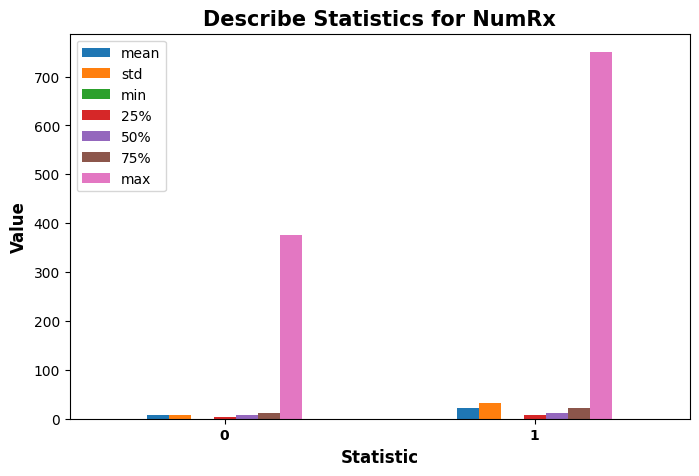


 


 NumProcEvents


count      mean       std  min  25%  50%   75%    max
ExpiredHospital                                                         
0                53122.0  0.546808  1.101515  0.0  0.0  0.0  0.83   75.0
1                 5854.0  2.008562  5.678633  0.0  0.0  0.0  1.90  100.0

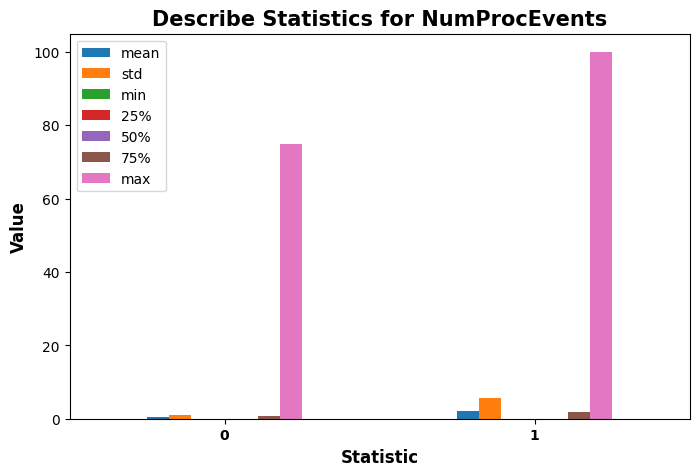


 


 NumTransfers


count      mean       std  min   25%   50%   75%    max
ExpiredHospital                                                           
0                53122.0  1.006362  2.839577  0.0  0.39  0.66  1.04  125.0
1                 5854.0  1.882351  5.229299  0.0  0.29  0.57  1.33   75.0

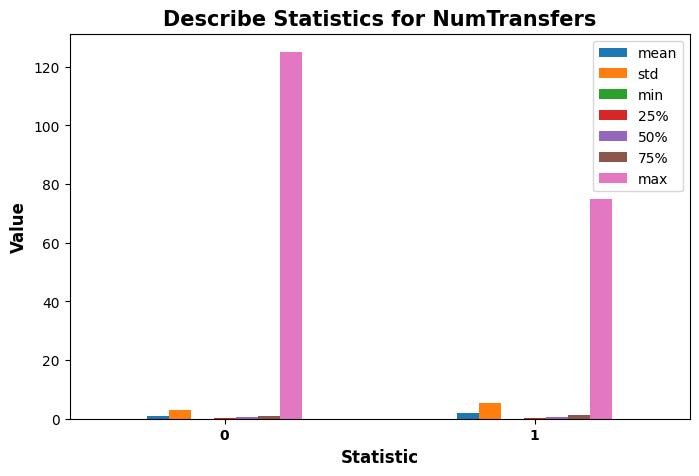


 


 NumChartEvents


count         mean          std  min       25%       50%  \
ExpiredHospital                                                               
0                53122.0   458.199918   445.498212  0.0  194.1925   387.755   
1                 5854.0  1166.488729  1370.087638  0.0  567.9475  1068.490   

                       75%       max  
ExpiredHospital                       
0                 630.9675  31642.88  
1                1520.6725  49325.00

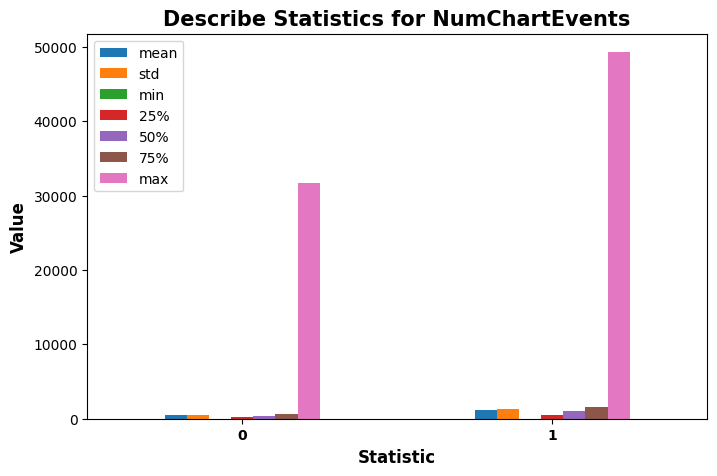


 


 ExpiredHospital


count  mean  std  min  25%  50%  75%  max
ExpiredHospital                                             
0                53122.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1                 5854.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0

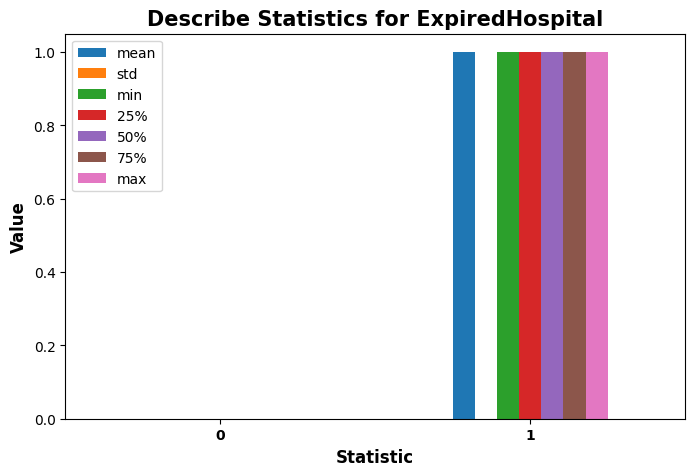


 


 TotalNumInteract


count         mean          std  min     25%      50%  \
ExpiredHospital                                                            
0                53122.0   544.829035   510.349162  0.0  251.76   465.30   
1                 5854.0  1464.493398  1751.139578  0.0  699.00  1295.18   

                       75%       max  
ExpiredHospital                       
0                 728.5800  31782.49  
1                1841.3025  68600.00

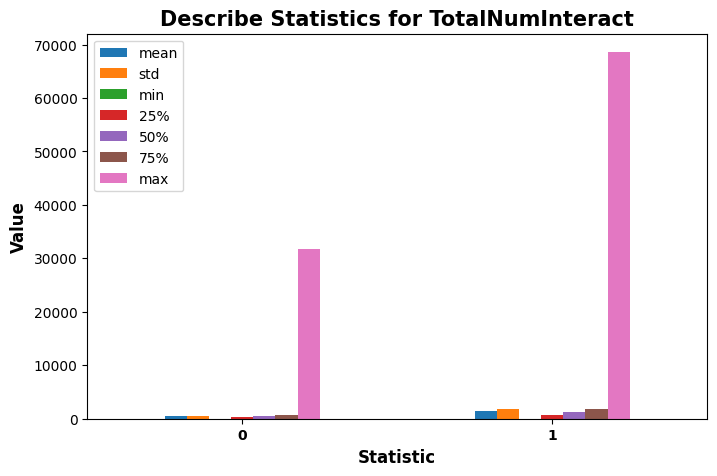


 


 LOSgroupNum


count      mean       std  min  25%  50%  75%  max
ExpiredHospital                                                      
0                53122.0  2.370299  1.117155  1.0  1.0  2.0  3.0  4.0
1                 5854.0  2.269047  1.239978  1.0  1.0  2.0  4.0  4.0

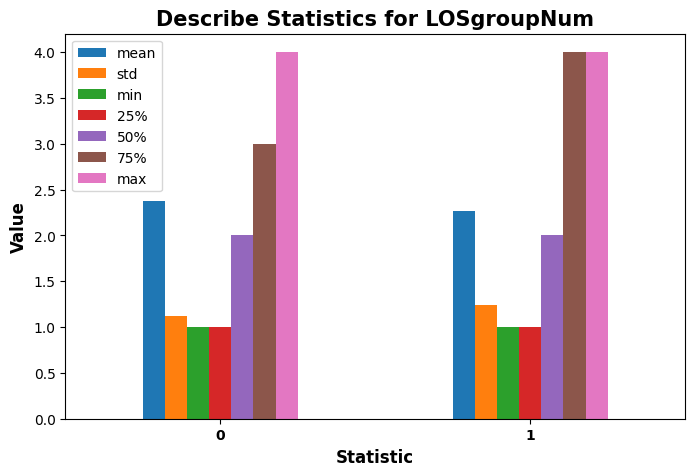

In [60]:
ExpiredHospital_groupby = df_copy.groupby('ExpiredHospital')

# Define the statistics you want to include in the plot (excluding 'count')
statistics_to_include = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']

for col in df_number.columns:
    
    describe_stats = ExpiredHospital_groupby[col].describe()
    print('\n', col)
    display(ExpiredHospital_groupby[col].describe())

    # Filter the statistics to include in the plot
    describe_stats_filtered = describe_stats[statistics_to_include]

    # Create a bar plot for the filtered describe result of the current column
    fig, ax = plt.subplots(figsize=(8, 5))
    describe_stats_filtered.plot(kind='bar', ax=ax)
    ax.set_title(f'Describe Statistics for {col}', fontsize=15, fontweight='bold')
    ax.set_ylabel('Value', fontsize=12, fontweight='bold')
    ax.set_xlabel('Statistic', fontsize=12, fontweight='bold')
    plt.xticks(rotation=0, fontsize=10, fontweight='bold')

    plt.show()
    print('\n', '\n')




 age


count       mean        std  min   25%   50%   75%   max
ExpiredHospital                                                            
0                53122.0  51.644874  26.512853  0.0  40.0  58.0  72.0  89.0
1                 5854.0  65.356338  16.645122  0.0  54.0  68.0  79.0  88.0

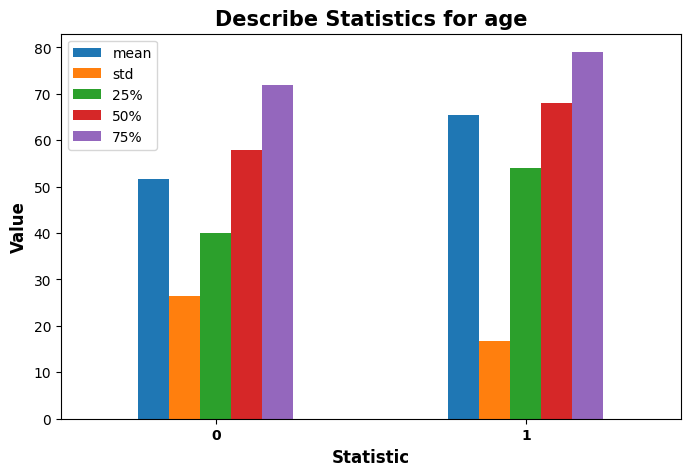


 


 LOSdays


count       mean        std  min   25%   50%    75%     max
ExpiredHospital                                                               
0                53122.0  10.115268  12.283752  0.0  3.83  6.54  11.70  294.63
1                 5854.0  10.112117  13.925228  0.0  1.83  5.79  12.92  206.42

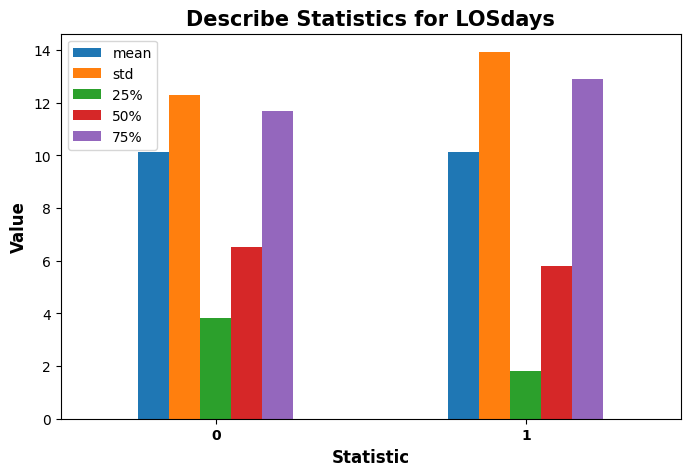


 


 NumCallouts


count      mean       std  min  25%   50%   75%   max
ExpiredHospital                                                         
0                53122.0  0.105303  0.164148  0.0  0.0  0.04  0.17  4.00
1                 5854.0  0.045567  0.146236  0.0  0.0  0.00  0.00  4.76

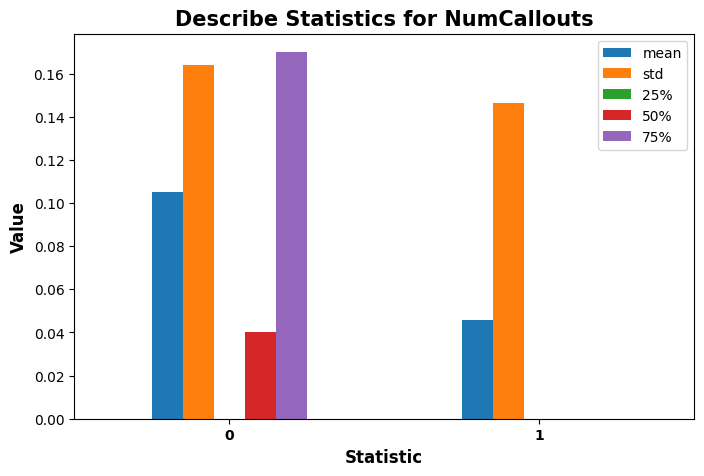


 


 NumDiagnosis


count      mean        std  min   25%   50%   75%    max
ExpiredHospital                                                            
0                53122.0  2.169783   5.402133  0.0  0.81  1.36  2.27  325.0
1                 5854.0  7.269250  20.002639  0.0  1.02  2.12  5.31  450.0

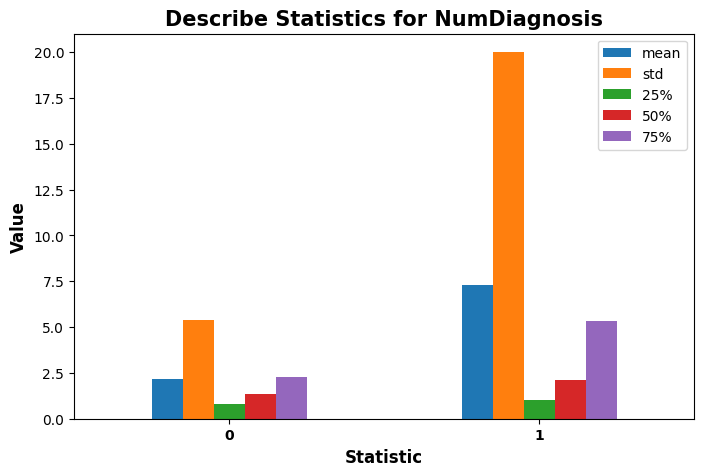


 


 NumProcs


count      mean        std  min   25%   50%   75%    max
ExpiredHospital                                                            
0                53122.0  0.608191   1.633973  0.0  0.20  0.40  0.68   75.0
1                 5854.0  2.395485  10.022643  0.0  0.31  0.63  1.50  275.0

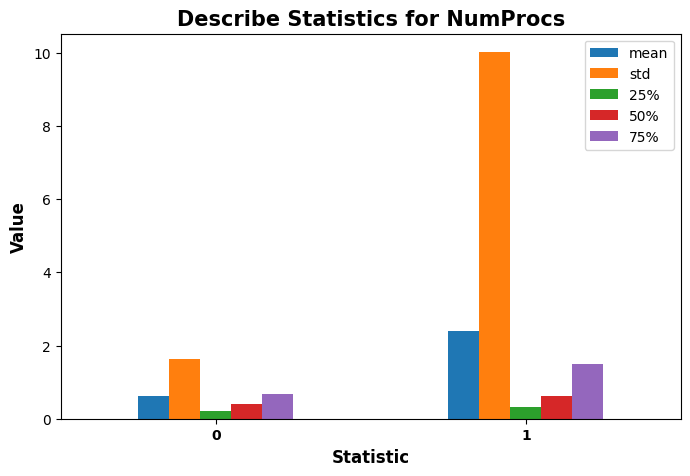


 


 NumCPTevents


count      mean       std  min  25%   50%   75%    max
ExpiredHospital                                                          
0                53122.0  0.924569  1.210518  0.0  0.0  0.87  1.46  175.0
1                 5854.0  2.431201  5.105037  0.0  1.0  1.82  2.79  225.0

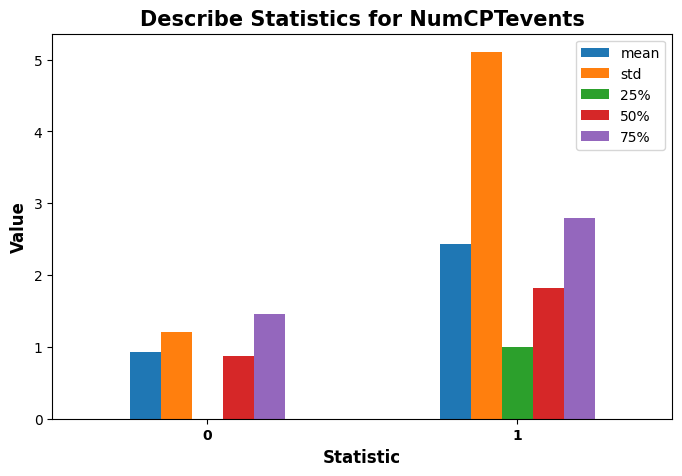


 


 NumInput


count       mean         std  min      25%     50%  \
ExpiredHospital                                                         
0                53122.0  22.741493   31.170210  0.0   4.3700  12.370   
1                 5854.0  99.685569  158.492899  0.0  21.8875  56.585   

                     75%      max  
ExpiredHospital                    
0                 29.170   869.77  
1                130.625  6825.00

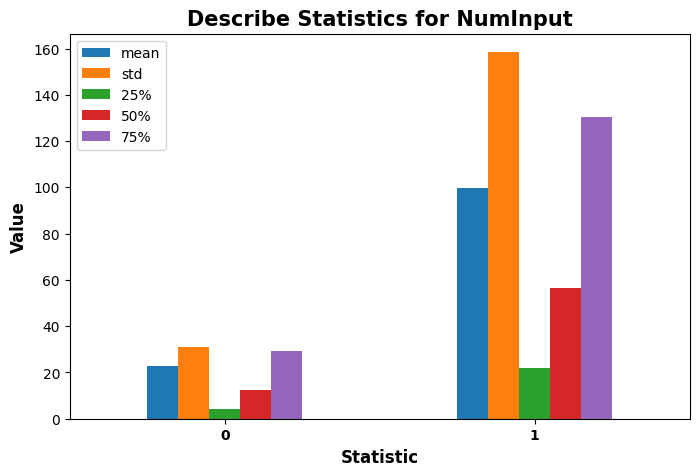


 


 NumLabs


count        mean         std  min      25%    50%  \
ExpiredHospital                                                         
0                53122.0   38.424159   32.588075  0.0  25.6800  37.06   
1                 5854.0  118.989419  206.899931  0.0  46.0825  68.87   

                      75%     max  
ExpiredHospital                    
0                 47.7600  1525.0  
1                116.7975  5175.0

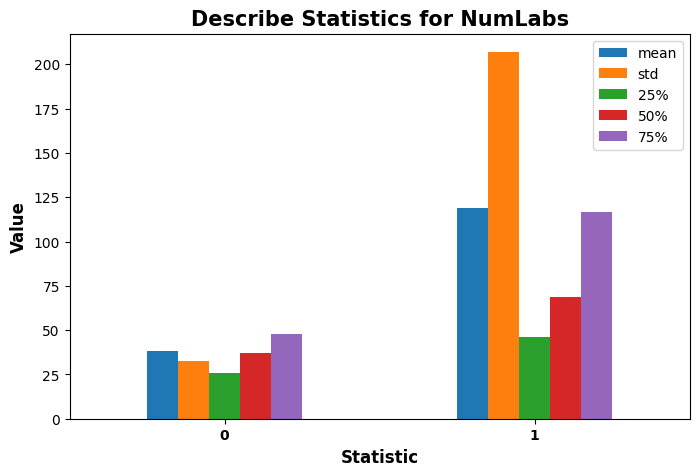


 


 NumMicroLabs


count      mean        std  min   25%   50%     75%    max
ExpiredHospital                                                              
0                53122.0  0.963973   1.883073  0.0  0.14  0.46  1.1700  164.0
1                 5854.0  3.542433  11.945214  0.0  0.74  1.64  3.1475  375.0

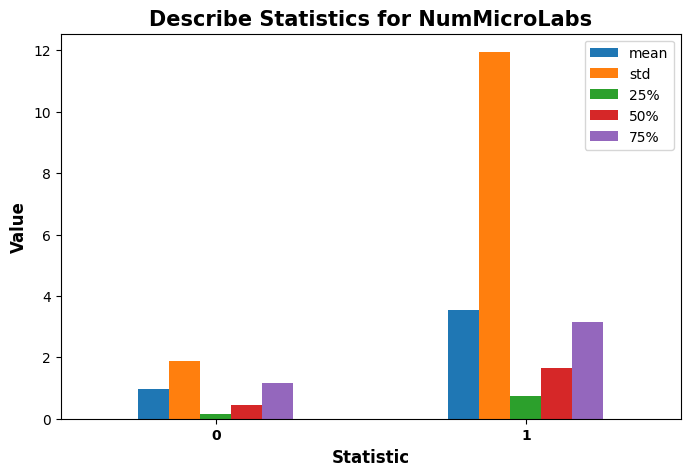


 


 NumNotes


count       mean         std  min   25%   50%     75%  \
ExpiredHospital                                                            
0                53122.0   4.416369   91.849474  0.0  0.14  0.31  0.7000   
1                 5854.0  25.053133  194.384189  0.0  0.18  0.65  3.1375   

                    max  
ExpiredHospital          
0                7500.0  
1                5625.0

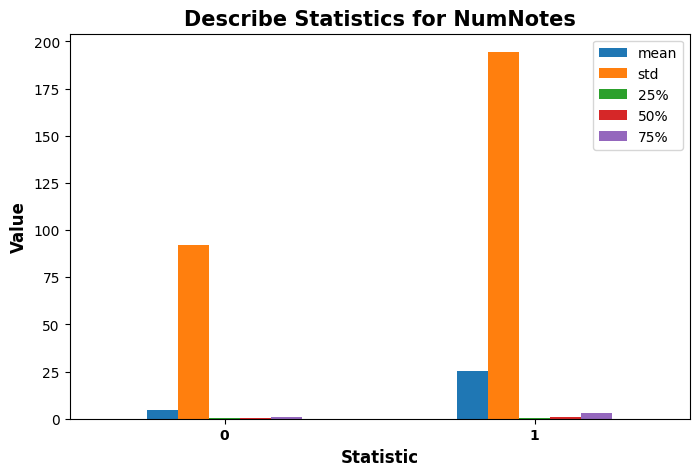


 


 NumOutput


count       mean        std  min   25%     50%    75%  \
ExpiredHospital                                                            
0                53122.0   6.377293   5.979771  0.0  1.58   4.880   9.59   
1                 5854.0  13.774990  14.170473  0.0  5.25  12.385  19.13   

                    max  
ExpiredHospital          
0                 76.19  
1                375.00

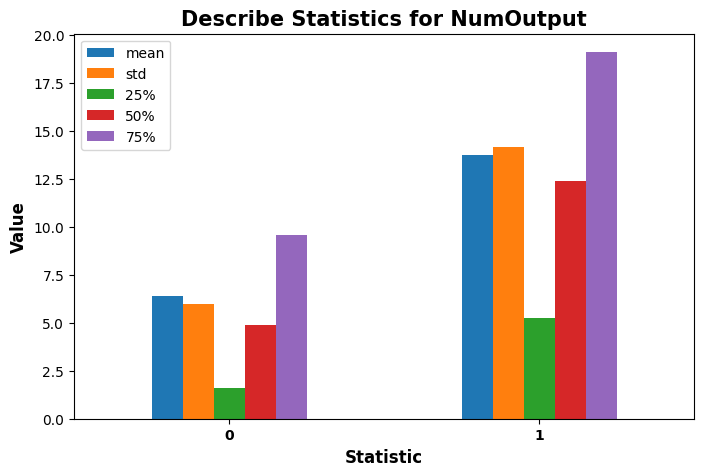


 


 NumRx


count       mean        std  min   25%    50%     75%  \
ExpiredHospital                                                            
0                53122.0   8.344814   7.033249  0.0  3.90   8.05  11.710   
1                 5854.0  20.926710  31.755997  0.0  7.85  12.56  21.445   

                   max  
ExpiredHospital         
0                375.0  
1                750.0

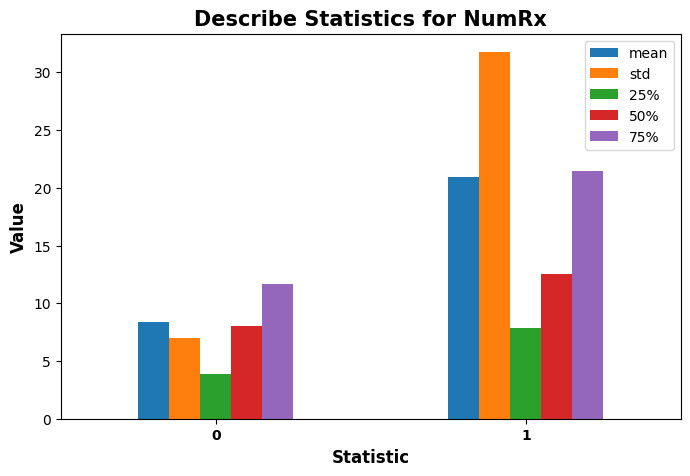


 


 NumProcEvents


count      mean       std  min  25%  50%   75%    max
ExpiredHospital                                                         
0                53122.0  0.546808  1.101515  0.0  0.0  0.0  0.83   75.0
1                 5854.0  2.008562  5.678633  0.0  0.0  0.0  1.90  100.0

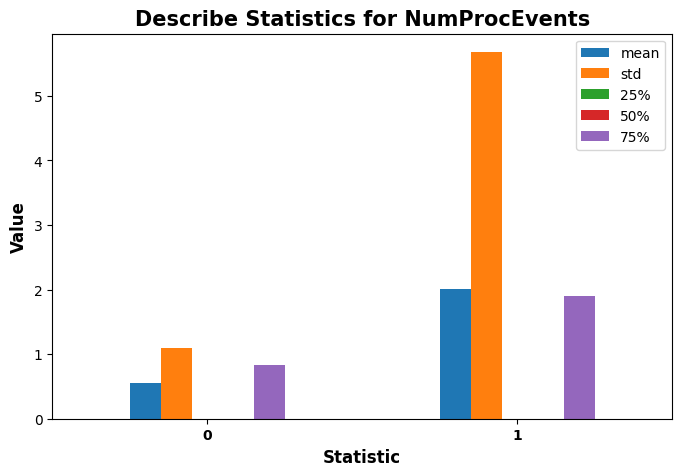


 


 NumTransfers


count      mean       std  min   25%   50%   75%    max
ExpiredHospital                                                           
0                53122.0  1.006362  2.839577  0.0  0.39  0.66  1.04  125.0
1                 5854.0  1.882351  5.229299  0.0  0.29  0.57  1.33   75.0

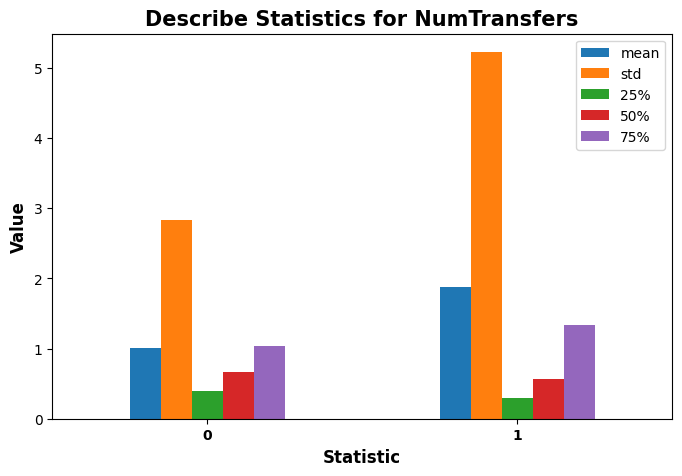


 


 NumChartEvents


count         mean          std  min       25%       50%  \
ExpiredHospital                                                               
0                53122.0   458.199918   445.498212  0.0  194.1925   387.755   
1                 5854.0  1166.488729  1370.087638  0.0  567.9475  1068.490   

                       75%       max  
ExpiredHospital                       
0                 630.9675  31642.88  
1                1520.6725  49325.00

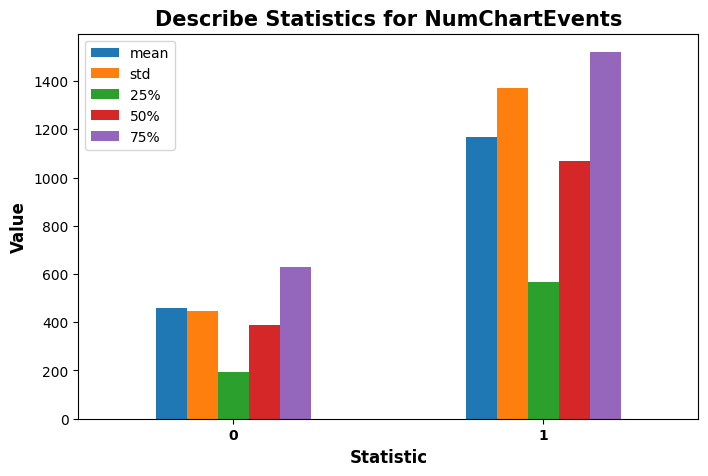


 


 ExpiredHospital


count  mean  std  min  25%  50%  75%  max
ExpiredHospital                                             
0                53122.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1                 5854.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0

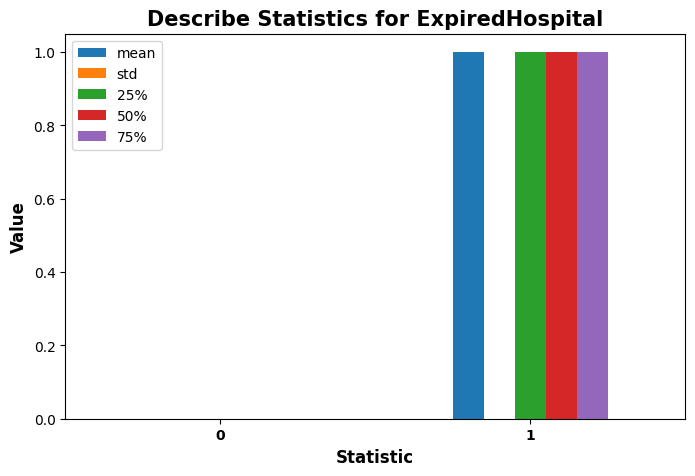


 


 TotalNumInteract


count         mean          std  min     25%      50%  \
ExpiredHospital                                                            
0                53122.0   544.829035   510.349162  0.0  251.76   465.30   
1                 5854.0  1464.493398  1751.139578  0.0  699.00  1295.18   

                       75%       max  
ExpiredHospital                       
0                 728.5800  31782.49  
1                1841.3025  68600.00

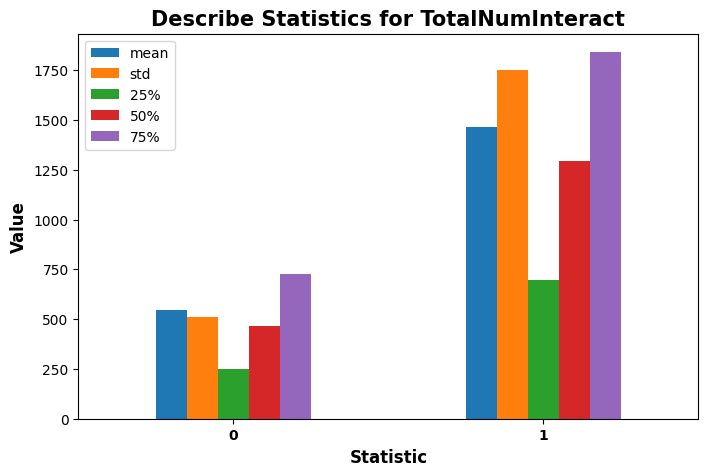


 


 LOSgroupNum


count      mean       std  min  25%  50%  75%  max
ExpiredHospital                                                      
0                53122.0  2.370299  1.117155  1.0  1.0  2.0  3.0  4.0
1                 5854.0  2.269047  1.239978  1.0  1.0  2.0  4.0  4.0

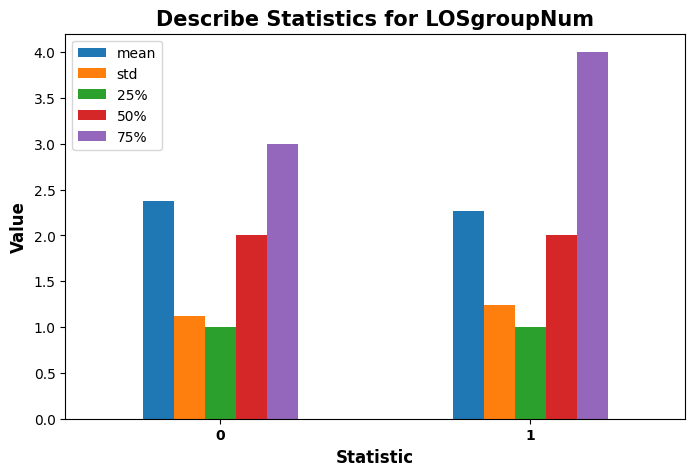

In [61]:
ExpiredHospital_groupby = df_copy.groupby('ExpiredHospital')

# Define the statistics you want to include in the plot (excluding 'count')
statistics_to_include = ['mean', 'std', '25%', '50%', '75%']

for col in df_number.columns:
    
    describe_stats = ExpiredHospital_groupby[col].describe()
    print('\n', col)
    display(ExpiredHospital_groupby[col].describe())

    # Filter the statistics to include in the plot
    describe_stats_filtered = describe_stats[statistics_to_include]

    # Create a bar plot for the filtered describe result of the current column
    fig, ax = plt.subplots(figsize=(8, 5))
    describe_stats_filtered.plot(kind='bar', ax=ax)
    ax.set_title(f'Describe Statistics for {col}', fontsize=15, fontweight='bold')
    ax.set_ylabel('Value', fontsize=12, fontweight='bold')
    ax.set_xlabel('Statistic', fontsize=12, fontweight='bold')
    plt.xticks(rotation=0, fontsize=10, fontweight='bold')

    plt.show()
    print('\n', '\n')

In [62]:
# had stroke 
df_expired = df.loc[df['ExpiredHospital']==1]
# no stroke
df_no_expired = df.loc[df['ExpiredHospital']==0]

In [63]:
def histplot_function(df1,df2,col):
  # function to plot a histogram for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  # df1:
  sns.histplot(data=df1,x = col,ax = axes[0])
  mean_value = df1[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}",);
  axes[0].legend()
  axes[0].set_facecolor("lightgray")

  med_value = df1[col].median()
  axes[0].axvline(med_value,color='black', ls='--', 
           label=f"Median Value = ${med_value:,.2f}");
  axes[0].legend()
  axes[0].set_title(f' Distribution of {col} in patients who died', fontsize = 15, fontweight = 'bold')

  #df2
  sns.histplot(data=df2,x = col,ax = axes[1])
  mean_value = df2[col].mean()
  axes[1].axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}",);
  axes[1].legend()

  med_value = df2[col].median()
  axes[1].axvline(med_value,color='black', ls='--', 
           label=f"Median Value = ${med_value:,.2f}");
  axes[1].legend()
  axes[1].set_facecolor("lightgray")


  ## Updating title of top graph to df 2 
  axes[1].set_title(f'Distribution of {col} in patients who Survived', fontsize = 15, fontweight = 'bold' )

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

In [64]:
sns.blend_palette(['blue', 'red'])

[(0.0, 0.0, 1.0),
 (0.2, 0.0, 0.8),
 (0.4, 0.0, 0.6),
 (0.6, 0.0, 0.4),
 (0.8, 0.0, 0.19999999999999996),
 (1.0, 0.0, 0.0)]

In [65]:
def outliers_check(df1,df2,col):
  # function to plot a boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  sns.boxplot(data=df1, x = col, ax = axes[0])

  ## Updating title of top graph to df1  
  axes[0].set_title(f' Outliers of {col} in patients who died', fontsize = 15, fontweight = 'bold')
  axes[0].set_facecolor("lightgray")

  sns.boxplot(data=df2, x = col, ax = axes[1])
  

  ## Updating title of top graph to df 2 
  axes[1].set_title(f'Outliers of {col} in patients who survived', fontsize = 15, fontweight = 'bold' )
  axes[1].set_facecolor("lightgray")

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()
  

In [66]:
def plot_bar(df1,df2,x):
  palette = sns.blend_palette(['blue', 'red'])
  ## Make a larger fig/ax before plotting
  fig, axes = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
  ## counts, counts up the categories, sort the values, then puts them in a data frame.

  counts_stroke = df1[x].value_counts(normalize=True).sort_values(ascending=False).to_frame()
  ## ploting the barplot of df_stroke
  sns.barplot(data=counts_stroke,x=counts_stroke.index, y = counts_stroke[x], ax = axes[0],palette= palette)
  axes[0].set_title('Died', fontsize = 15, fontweight = 'bold')
  axes[0].set_facecolor("lightgray")  

  counts_no_stroke = df2[x].value_counts(normalize=True).sort_values(ascending=False).to_frame()
  
  ## ploting the barplot of df_no_stroke
  sns.barplot(data=counts_no_stroke,x=counts_no_stroke.index, y = counts_no_stroke[x], ax = axes[1], palette= palette)
  axes[1].set_title('Survived', fontsize = 15, fontweight = 'bold' )
  df2[x] = df2[x].replace({0:'no', 1:'yes'})
  axes[0].set_ylabel('Normalize count', fontsize = 20)
  axes[1].set_ylabel('')
  axes[1].set_facecolor("lightgray")  
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')
    

  fig.suptitle(f'{x} in patients who:', fontsize = 20, fontweight = 'bold', y = 1.05)
  plt.tight_layout()
  plt.show()

## Age distribution

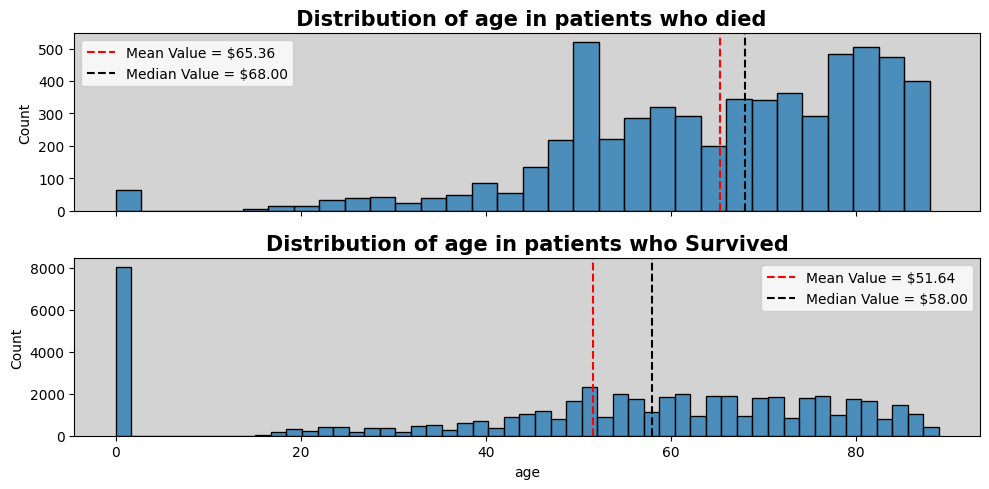

In [67]:
histplot_function(df_expired, df_no_expired, 'age')

The majority of surviving patients are newborns, with a median age of 58 years, which is 10 years younger than patients who did not survive, as their median age is 68 years.

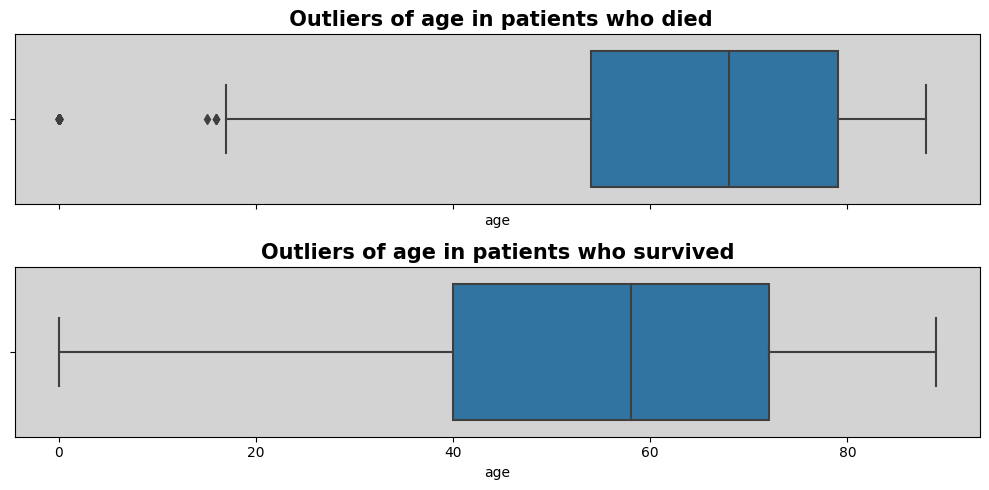

In [68]:
outliers_check(df_expired, df_no_expired, 'age')

There are 3 patients <20 years old who died 

In [69]:
# plot age of stroke and no stroke in the same plot
def all_in_one_plot (col):
    f = plt.figure(figsize=(8,3))
    ax = f.add_subplot(111)
    sns.kdeplot(data = df[df['ExpiredHospital']==1], x = col, shade = True, label= 'Died', color = 'r')
    sns.kdeplot(data = df[df['ExpiredHospital']==0], x = col, shade = True, label= 'Survived', color = 'b')
    ax.legend(loc="upper left")
    ax.get_yaxis().set_visible(False)
    ax.set_title(f' Distribution of {col}', fontsize = 15, fontweight = 'bold')

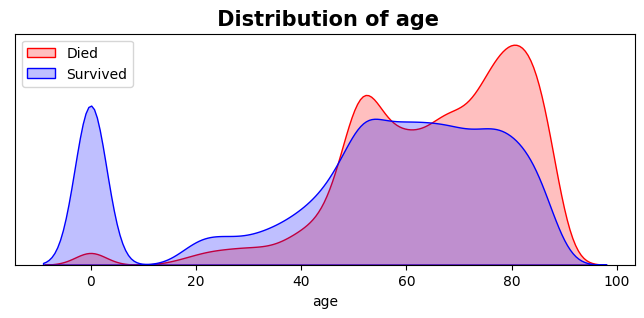

In [70]:
all_in_one_plot (col='age')

## NumInput distribution 

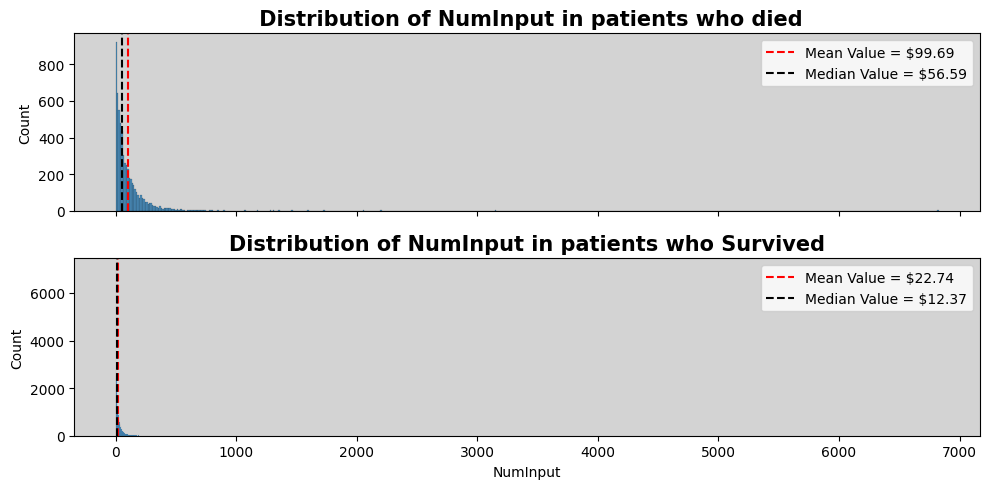

In [71]:
histplot_function(df_expired, df_no_expired, 'NumInput')

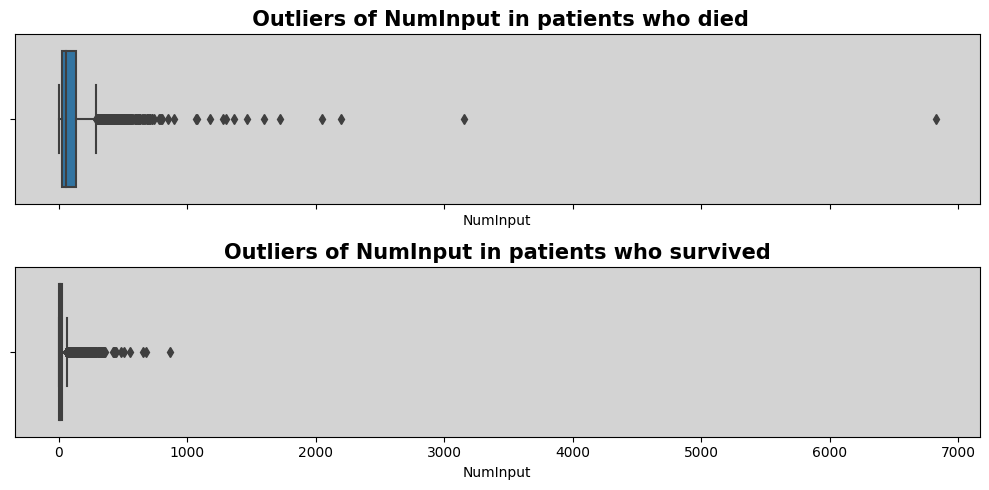

In [72]:
outliers_check(df_expired, df_no_expired, 'NumInput')

## NumLabs Distribution 

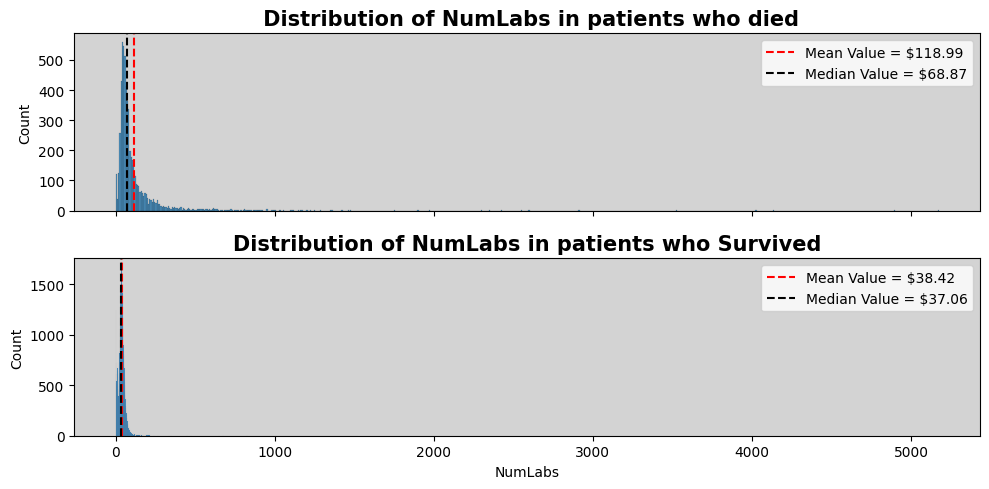

In [73]:
histplot_function(df_expired, df_no_expired, 'NumLabs')

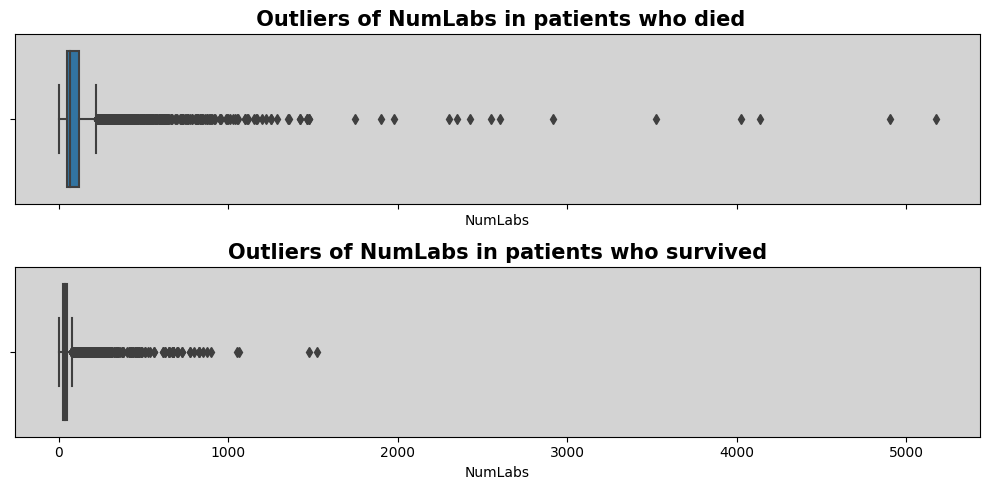

In [74]:
outliers_check(df_expired, df_no_expired, 'NumLabs')

## NumRx distribution 

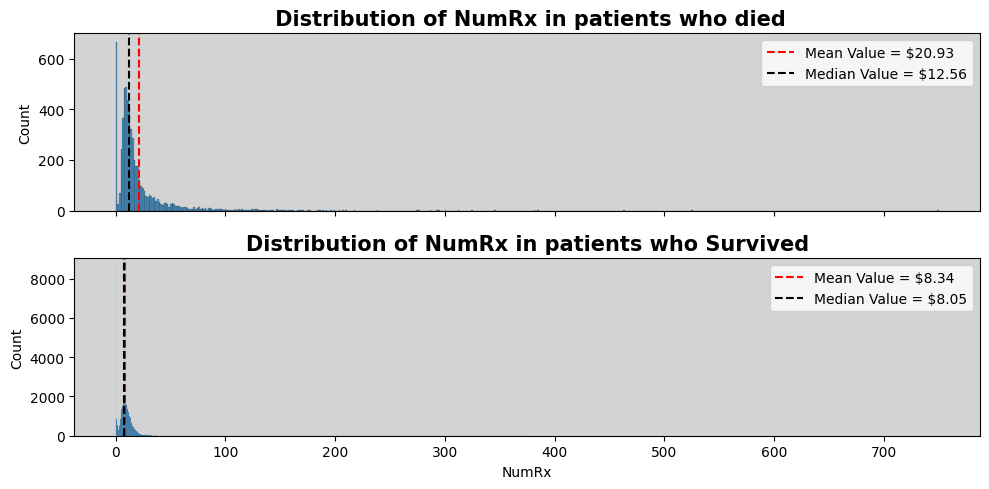

In [75]:
histplot_function(df_expired, df_no_expired, 'NumRx')

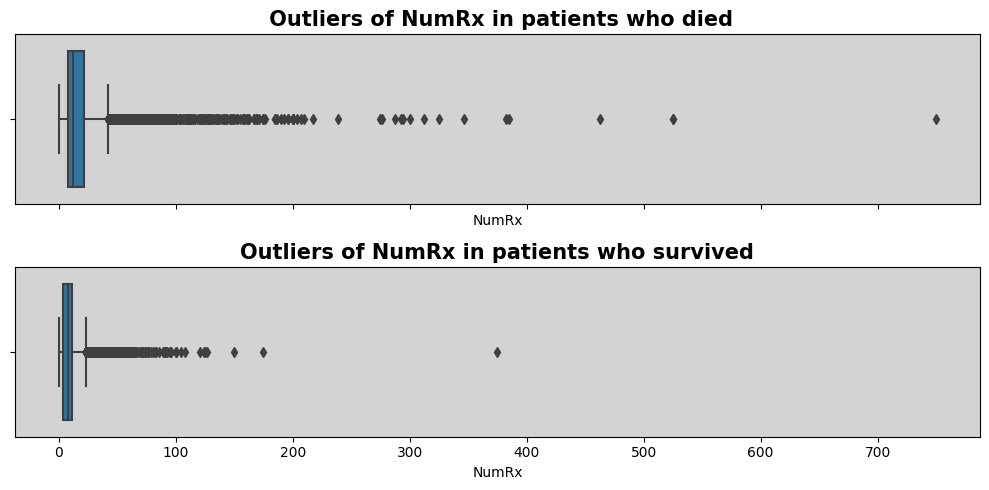

In [76]:
outliers_check(df_expired, df_no_expired, 'NumRx')

## NumChartEvents distribution 

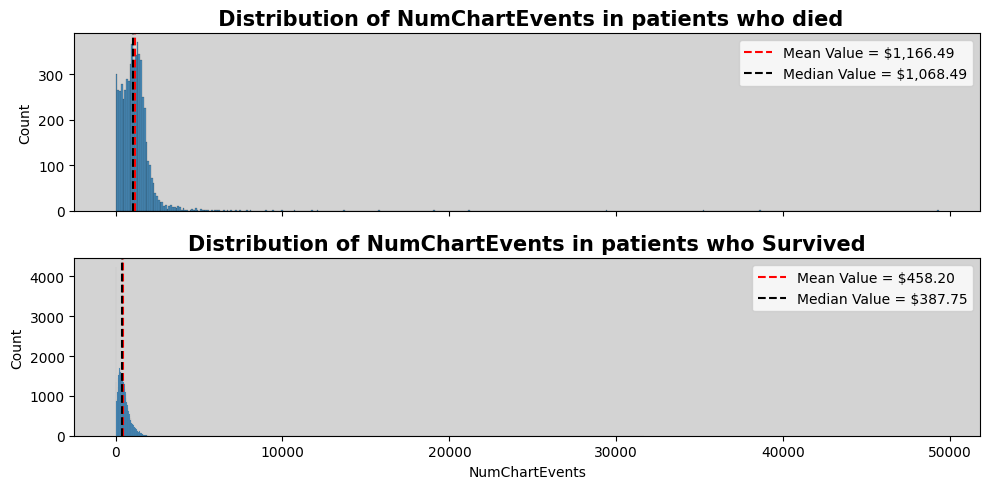

In [77]:
histplot_function(df_expired, df_no_expired, 'NumChartEvents')

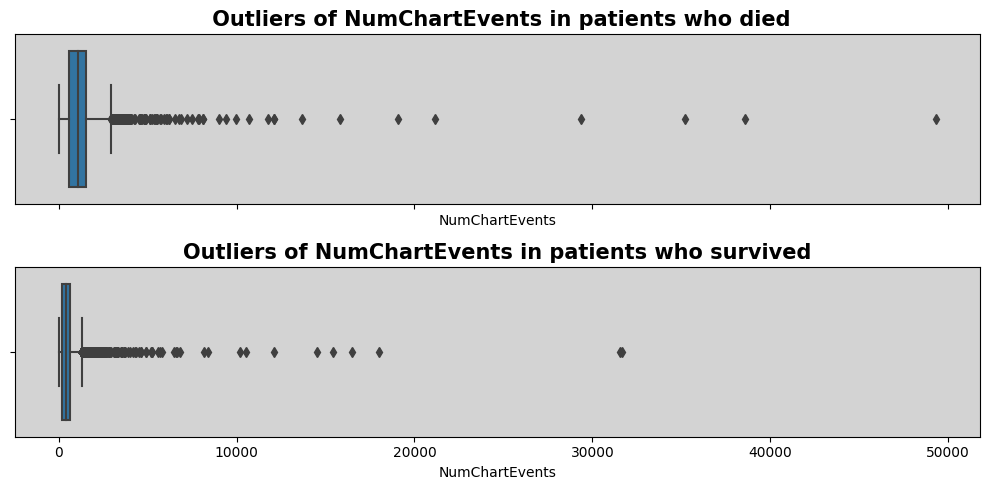

In [78]:
outliers_check(df_expired, df_no_expired, 'NumChartEvents')

## TotalNumInteract distribution 

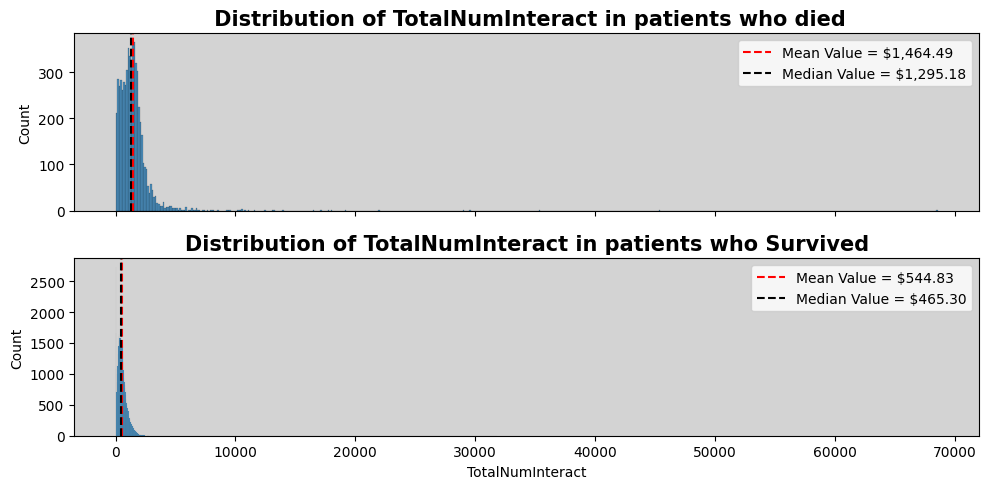

In [79]:
histplot_function(df_expired, df_no_expired, 'TotalNumInteract')

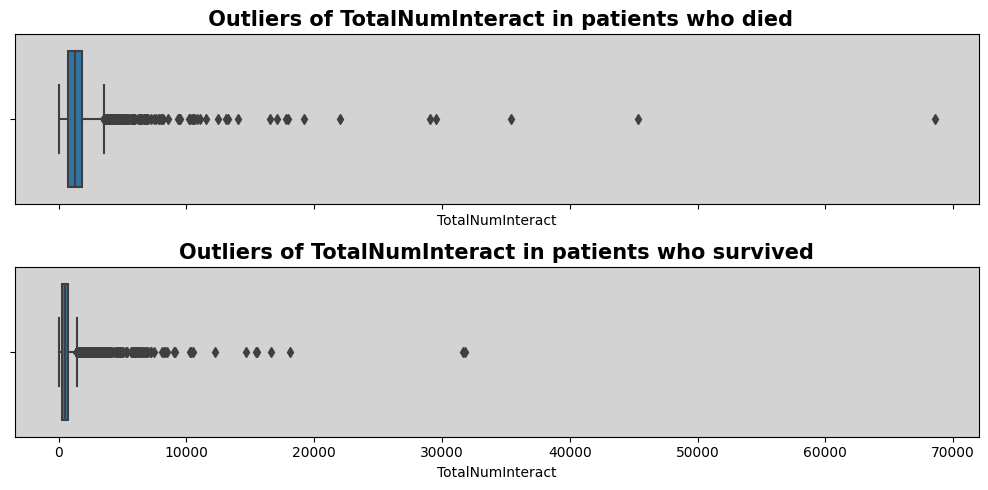

In [80]:
outliers_check(df_expired, df_no_expired, 'TotalNumInteract')

## LOSdays Distribution 

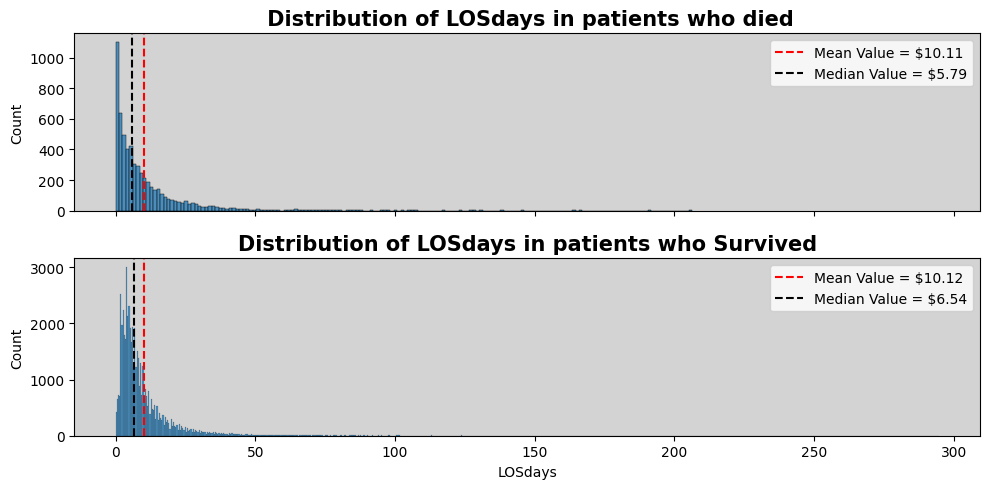

In [81]:
histplot_function(df_expired, df_no_expired, 'LOSdays')

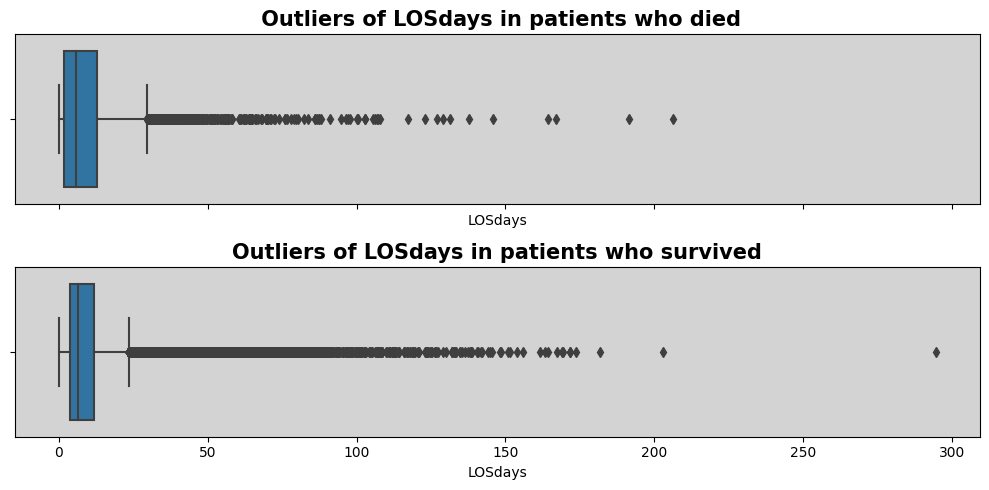

In [82]:
outliers_check(df_expired, df_no_expired, 'LOSdays')

There are a lot of outliers in patients who died

##  Gender

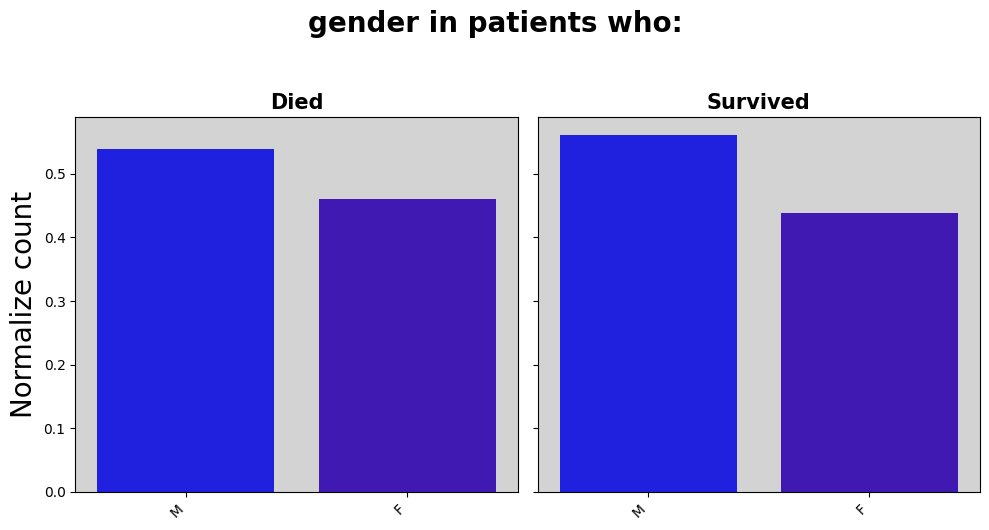

In [83]:

plot_bar(df_expired, df_no_expired, 'gender')

## admit_type distribution 

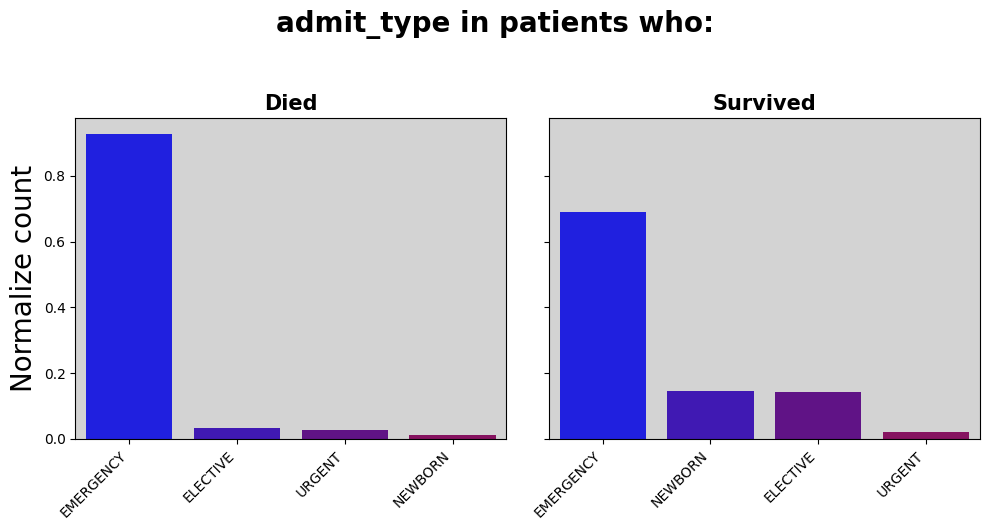

In [84]:
plot_bar(df_expired, df_no_expired, 'admit_type')

## admit_location Distribution 

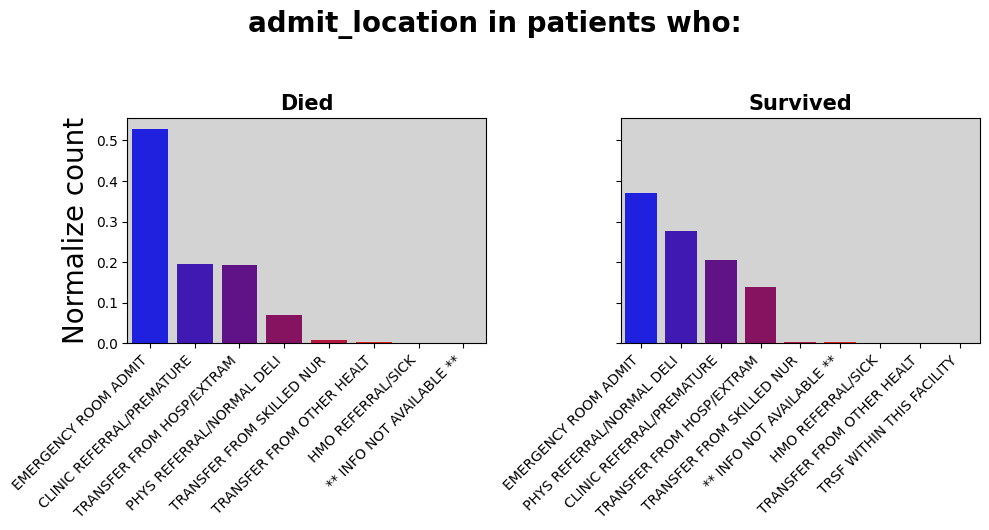

In [85]:
plot_bar(df_expired, df_no_expired, 'admit_location')

In [86]:
def plot_bar_top(df1, df2, x, top_n=20):
    palette = sns.blend_palette(['blue', 'red'])
    
    # Make a larger fig/ax before plotting
    fig, axes = plt.subplots(ncols=2, figsize=(20, 10), sharey=True)
    
    # Count the top 'top_n' categories for df1 (stroke)
    counts_stroke = df1[x].value_counts(normalize=True).sort_values(ascending=False).head(top_n).to_frame()
    
    # Plot the barplot of df_stroke
    sns.barplot(data=counts_stroke, x=counts_stroke.index, y=counts_stroke[x], ax=axes[0], palette=palette)
    axes[0].set_title('Died', fontsize=15, fontweight='bold')
    axes[0].set_facecolor("lightgray")
    
    # Count the top 'top_n' categories for df2 (no_stroke)
    counts_no_stroke = df2[x].value_counts(normalize=True).sort_values(ascending=False).head(top_n).to_frame()
    
    # Plot the barplot of df_no_stroke
    sns.barplot(data=counts_no_stroke, x=counts_no_stroke.index, y=counts_no_stroke[x], ax=axes[1], palette=palette)
    axes[1].set_title('Survived', fontsize=15, fontweight='bold')
    
    axes[0].set_ylabel('Normalize count', fontsize=20)
    axes[1].set_ylabel('')
    axes[1].set_facecolor("lightgray")
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')

    fig.suptitle(f'Top {top_n} {x} in patients who:', fontsize=20, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.show()


## Top 20 AdmitDiagnosis distribution 

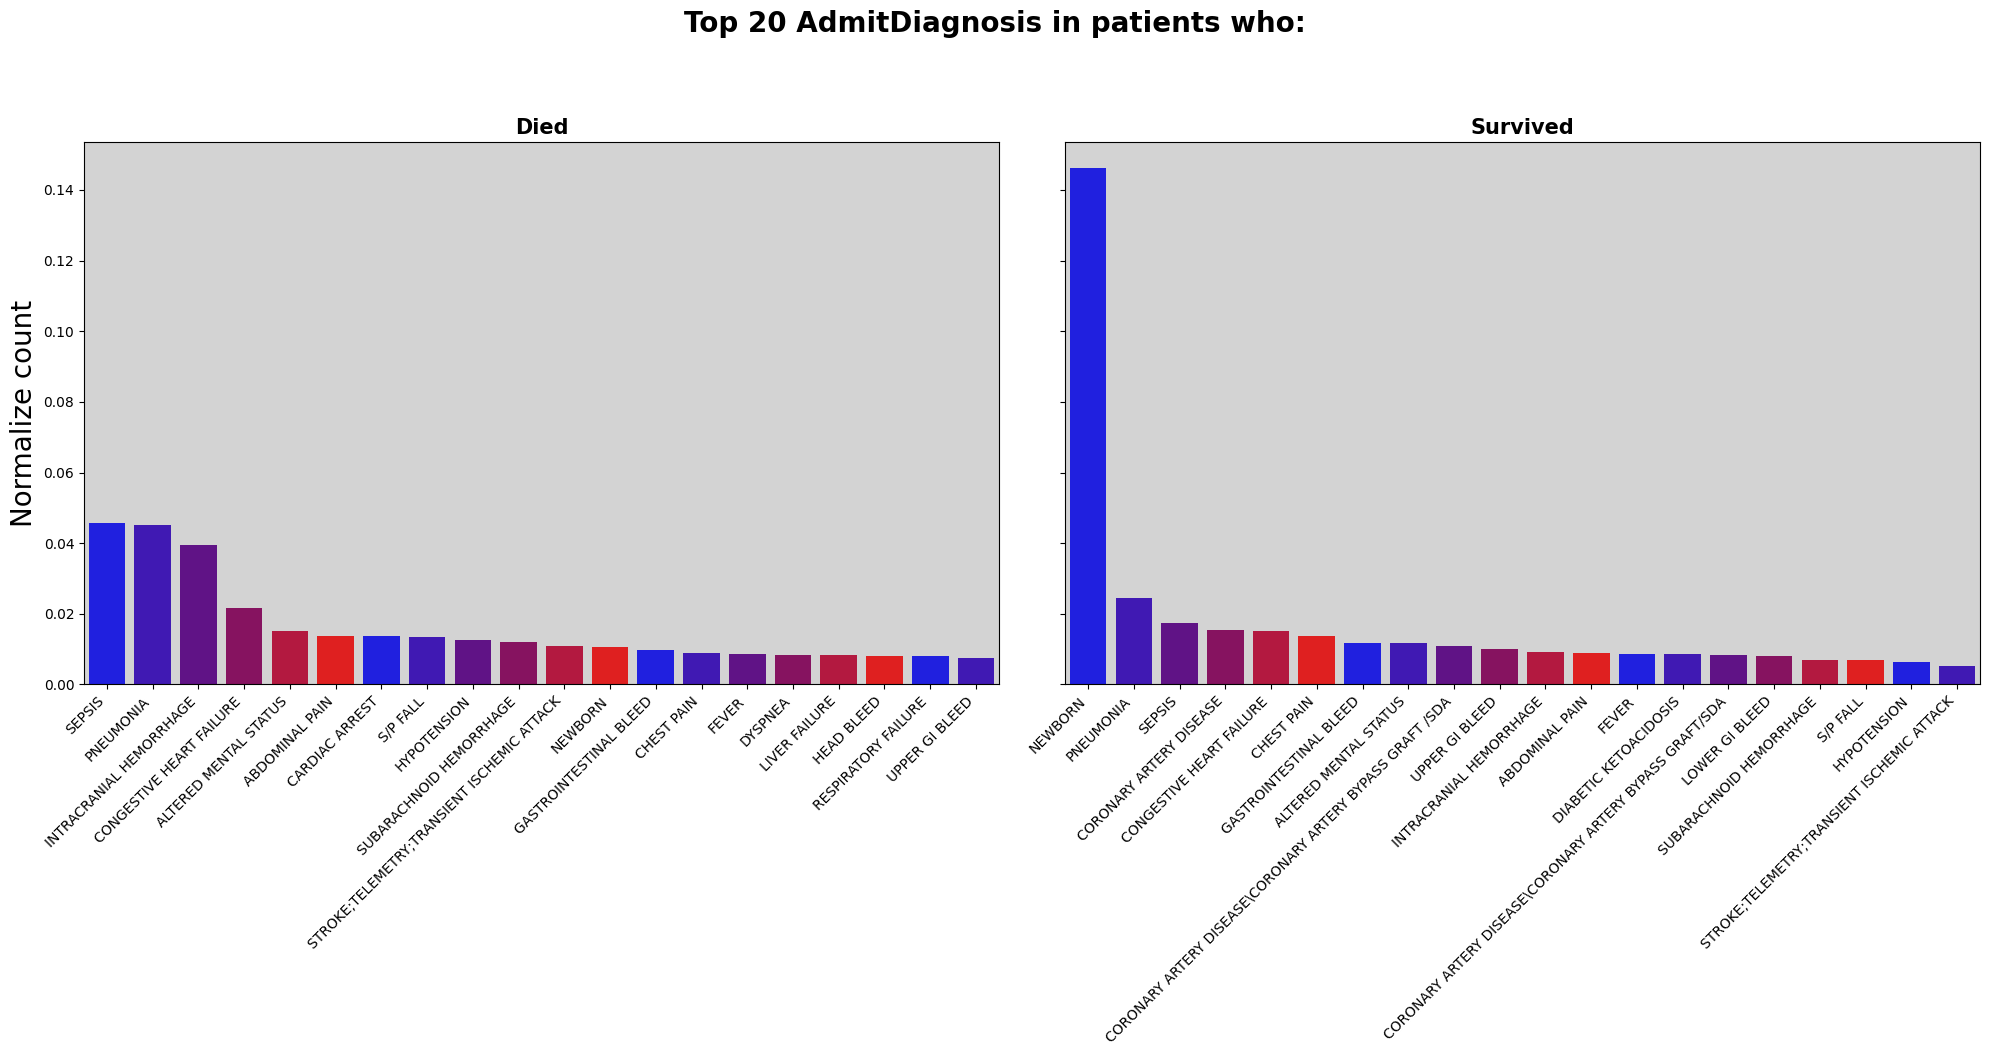

In [87]:
plot_bar_top(df_expired, df_no_expired, 'AdmitDiagnosis', top_n=20)

## insurance distribution 

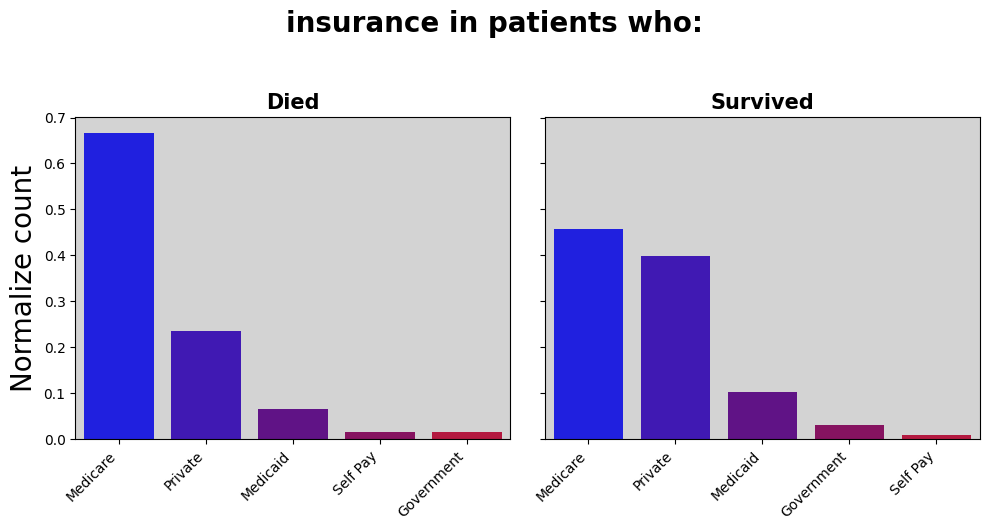

In [88]:
plot_bar(df_expired, df_no_expired, 'insurance')

## Religion distribution 

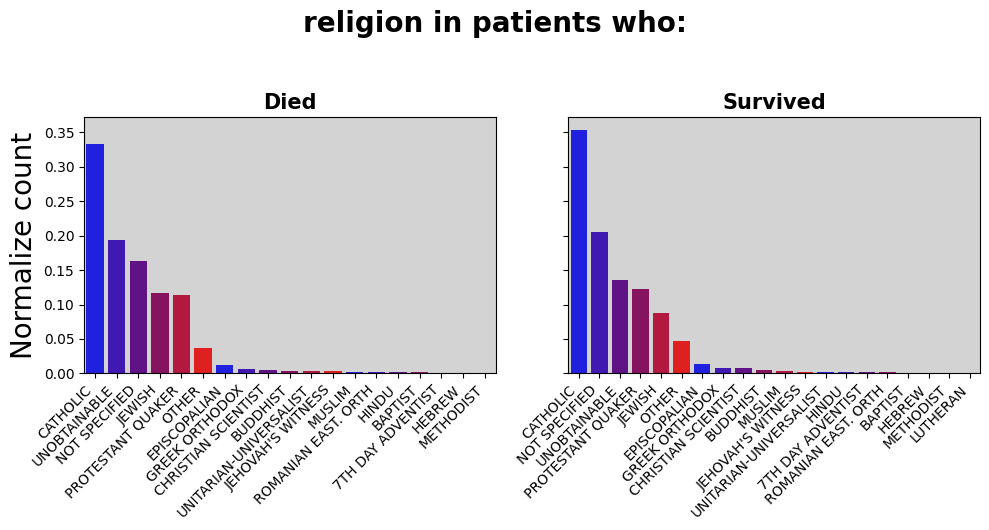

In [89]:
plot_bar(df_expired, df_no_expired, 'religion')

## marital_status Distribution 

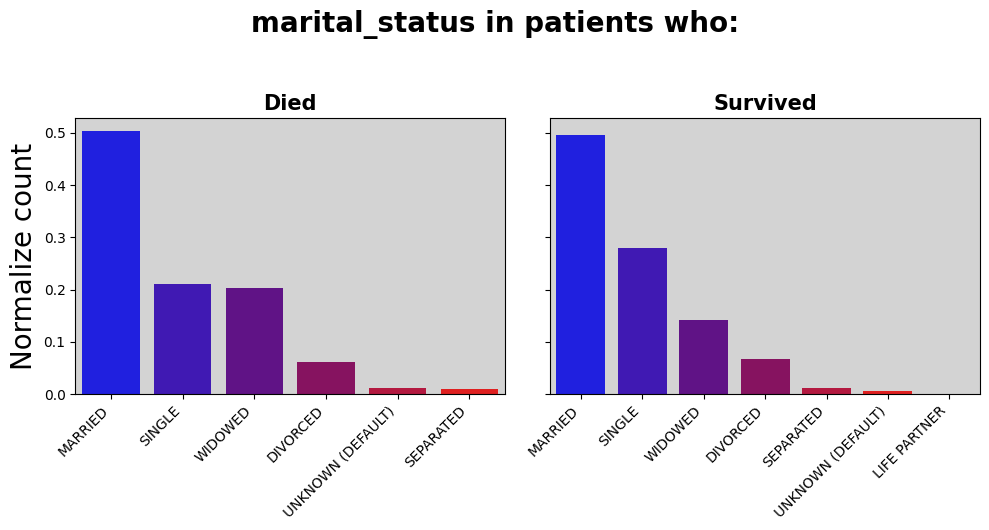

In [90]:
plot_bar(df_expired, df_no_expired, 'marital_status')

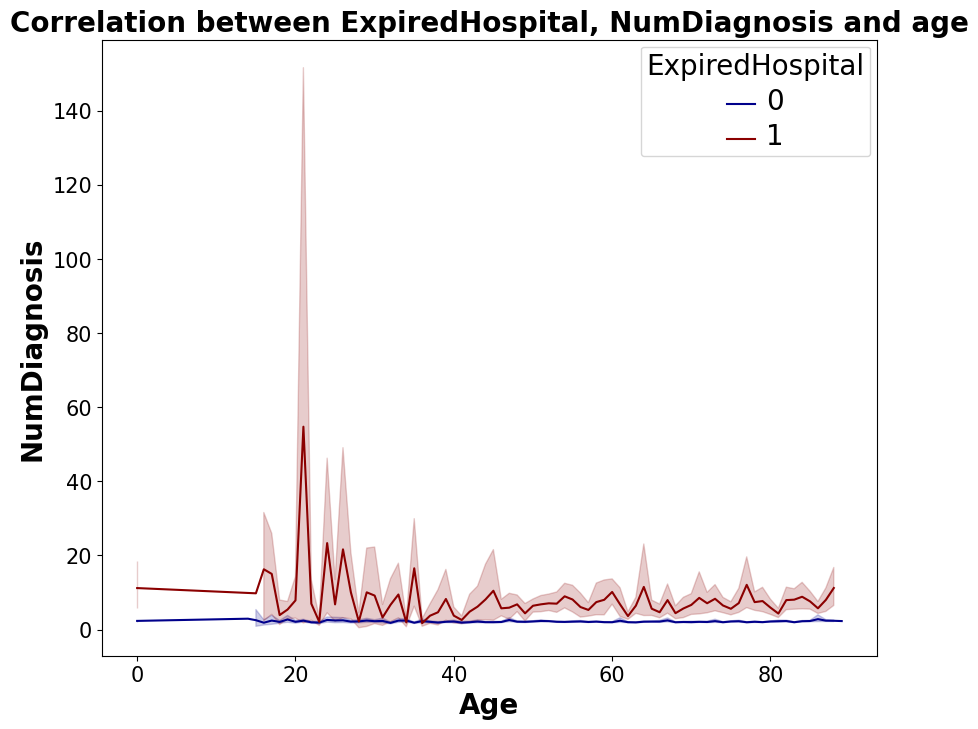

In [91]:
fig, ax = plt.subplots(figsize=(10, 8))
palette = {0: 'darkblue' , 1: 'darkred'}
sns.lineplot(data = df, x='age', y = 'NumDiagnosis', hue= 'ExpiredHospital', ax=ax, palette = palette)
plt.title('Correlation between ExpiredHospital, NumDiagnosis and age', fontsize = 20, fontweight = 'bold' )
plt.xlabel('Age', fontsize=20, fontweight = 'bold')
plt.ylabel('NumDiagnosis', fontsize=20, fontweight = 'bold')
plt.setp(ax.get_legend().get_texts(), fontsize='20') 
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.xticks(fontsize = 15)#, weight='bold')
plt.yticks(fontsize = 15)#, weight='bold')
plt.show()

# Machine Learning
## Preprocessing
### Reloading data

In [203]:
FILE = r"C:\Users\esnak\Downloads\mimic3c.csv (2)\mimic3c.csv"

df_ml = pd.read_csv(FILE)
df_ml.head(3)

hadm_id gender  age  LOSdays admit_type             admit_location  \
0   100001      F   35     6.17  EMERGENCY  CLINIC REFERRAL/PREMATURE   
1   100003      M   59     4.04  EMERGENCY       EMERGENCY ROOM ADMIT   
2   100006      F   48    12.04  EMERGENCY       EMERGENCY ROOM ADMIT   

          AdmitDiagnosis insurance           religion marital_status  ...  \
0  DIABETIC KETOACIDOSIS   Private  PROTESTANT QUAKER       DIVORCED  ...   
1         UPPER GI BLEED   Private      NOT SPECIFIED         SINGLE  ...   
2             COPD FLARE   Private      NOT SPECIFIED         SINGLE  ...   

  NumMicroLabs  NumNotes  NumOutput  NumRx NumProcEvents  NumTransfers  \
0         0.65      0.05       5.19  14.91          1.13          0.65   
1         1.24      1.59       5.45   7.18          0.99          1.24   
2         0.33      0.15       4.15   6.23          0.00          0.33   

   NumChartEvents  ExpiredHospital  TotalNumInteract  LOSgroupNum  
0          398.70                0            493.89            2  
1          373.02                0            465.71            2  
2          286.21                0            344.00            4  

[3 rows x 28 columns]

### Prepare/clean the data


In [204]:

# checking for duplicates
df_ml.duplicated().sum()

0

In [205]:
# Dropping unnecessary columns.

df_ml = df_ml.drop(columns='hadm_id')
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            58976 non-null  object 
 1   age               58976 non-null  int64  
 2   LOSdays           58976 non-null  float64
 3   admit_type        58976 non-null  object 
 4   admit_location    58976 non-null  object 
 5   AdmitDiagnosis    58951 non-null  object 
 6   insurance         58976 non-null  object 
 7   religion          58518 non-null  object 
 8   marital_status    48848 non-null  object 
 9   ethnicity         58976 non-null  object 
 10  NumCallouts       58976 non-null  float64
 11  NumDiagnosis      58976 non-null  float64
 12  NumProcs          58976 non-null  float64
 13  AdmitProcedure    58976 non-null  object 
 14  NumCPTevents      58976 non-null  float64
 15  NumInput          58976 non-null  float64
 16  NumLabs           58976 non-null  float6

In [206]:
# missing values
df_ml.isna().sum()

gender                  0
age                     0
LOSdays                 0
admit_type              0
admit_location          0
AdmitDiagnosis         25
insurance               0
religion              458
marital_status      10128
ethnicity               0
NumCallouts             0
NumDiagnosis            0
NumProcs                0
AdmitProcedure          0
NumCPTevents            0
NumInput                0
NumLabs                 0
NumMicroLabs            0
NumNotes                0
NumOutput               0
NumRx                   0
NumProcEvents           0
NumTransfers            0
NumChartEvents          0
ExpiredHospital         0
TotalNumInteract        0
LOSgroupNum             0
dtype: int64

We need to use Simple Imputer to fill missing values but afther X/y split to preventing data leakage.

## Defining X and y

In [207]:
# matrix
X = df_ml.drop(columns='ExpiredHospital')

# target
y = df_ml['ExpiredHospital']

In [208]:
# checking X
X.head()

gender  age  LOSdays admit_type             admit_location  \
0      F   35     6.17  EMERGENCY  CLINIC REFERRAL/PREMATURE   
1      M   59     4.04  EMERGENCY       EMERGENCY ROOM ADMIT   
2      F   48    12.04  EMERGENCY       EMERGENCY ROOM ADMIT   
3      F   73     7.29  EMERGENCY       EMERGENCY ROOM ADMIT   
4      M   60     4.88  EMERGENCY  TRANSFER FROM HOSP/EXTRAM   

            AdmitDiagnosis insurance           religion marital_status  \
0    DIABETIC KETOACIDOSIS   Private  PROTESTANT QUAKER       DIVORCED   
1           UPPER GI BLEED   Private      NOT SPECIFIED         SINGLE   
2               COPD FLARE   Private      NOT SPECIFIED         SINGLE   
3        BOWEL OBSTRUCTION   Private             JEWISH        MARRIED   
4  CORONARY ARTERY DISEASE   Private           CATHOLIC        MARRIED   

                ethnicity  ...  NumLabs  NumMicroLabs  NumNotes NumOutput  \
0                   WHITE  ...    43.44          0.65      0.05      5.19   
1                   WHITE  ...    55.94          1.24      1.59      5.45   
2  BLACK/AFRICAN AMERICAN  ...    33.39          0.33      0.15      4.15   
3                   WHITE  ...    32.24          0.69      0.17      9.05   
4                   WHITE  ...    50.61          0.61      0.34     16.19   

   NumRx  NumProcEvents  NumTransfers  NumChartEvents  TotalNumInteract  \
0  14.91           1.13          0.65          398.70            493.89   
1   7.18           0.99          1.24          373.02            465.71   
2   6.23           0.00          0.33          286.21            344.00   
3  11.52           0.00          0.96          526.06            603.05   
4  25.00           2.87          2.05          554.92            679.84   

   LOSgroupNum  
0            2  
1            2  
2            4  
3            2  
4            2  

[5 rows x 26 columns]

## Train-Test Split

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.shape

(44232, 26)

In [210]:
print('size of X')
print(len(X))
print('size of X_train(X)')
print(len(X_train))

size of X
58976
size of X_train(X)
44232


## Making a Preprocessing
### Selector columns
In this dataset we have numerical and categorical columns. So we need use make_column_selector

In [211]:
# make selector columns:
# numerical columns
num_selector = make_column_selector(dtype_include = 'number')

# categorical columns
cat_selector = make_column_selector(dtype_include = 'object')

In [212]:
cat_selector(X_train)

['gender',
 'admit_type',
 'admit_location',
 'AdmitDiagnosis',
 'insurance',
 'religion',
 'marital_status',
 'ethnicity',
 'AdmitProcedure']

There is no ordinal data in categorical columns, so we need to use ohe for all.

In [213]:
num_selector(X_train)

['age',
 'LOSdays',
 'NumCallouts',
 'NumDiagnosis',
 'NumProcs',
 'NumCPTevents',
 'NumInput',
 'NumLabs',
 'NumMicroLabs',
 'NumNotes',
 'NumOutput',
 'NumRx',
 'NumProcEvents',
 'NumTransfers',
 'NumChartEvents',
 'TotalNumInteract',
 'LOSgroupNum']

LOSgroupNum: Length of Stay (LOS) group number, categorizing patients based on their ICU stay duration.

We need to change 'LOSgroupNum', to string because they are not numeric features it is categorical feature, ordinal.

In [214]:
df_ml['LOSgroupNum'] = df_ml['LOSgroupNum'].astype(str)

In [215]:
# check again if worked 
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            58976 non-null  object 
 1   age               58976 non-null  int64  
 2   LOSdays           58976 non-null  float64
 3   admit_type        58976 non-null  object 
 4   admit_location    58976 non-null  object 
 5   AdmitDiagnosis    58951 non-null  object 
 6   insurance         58976 non-null  object 
 7   religion          58518 non-null  object 
 8   marital_status    48848 non-null  object 
 9   ethnicity         58976 non-null  object 
 10  NumCallouts       58976 non-null  float64
 11  NumDiagnosis      58976 non-null  float64
 12  NumProcs          58976 non-null  float64
 13  AdmitProcedure    58976 non-null  object 
 14  NumCPTevents      58976 non-null  float64
 15  NumInput          58976 non-null  float64
 16  NumLabs           58976 non-null  float6

Only object columns have missing values, we need make a pipeline only for categorical data with SimpleInputer and ohe.

## One HotEncoder and Scaler

In [216]:
# instantiate an ohe for categorical columns
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
# instantiate scaler for numeric columns
scaler = StandardScaler()

## SimpleImputer for categorical column

In [217]:
cat_imputer = SimpleImputer(strategy='most_frequent')

## Make a numerical pipeline with SimpleImputer and ohe

In [218]:
categorical_pipeline = make_pipeline(cat_imputer, ohe)
categorical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [219]:
# checkin pipeline in X_train
test_categorical_pipeline = categorical_pipeline.fit_transform(X_train[cat_selector(X_train)])
test_categorical_pipeline

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [220]:
# checking missin values
np.isnan(test_categorical_pipeline).sum()

0

## Make a column Transformer

In [221]:
# ColumTransformer, put all together: numerical and categorical 
preprocessor = make_column_transformer((scaler, num_selector ), (categorical_pipeline, cat_selector ), remainder='passthrough', verbose_feature_names_out=False)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000026080269040>),
                                ('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000026083555FD0>)],
                  verbose_feature_names_out=False)

In [222]:
## Test Col Transformer
X_train_processed = preprocessor.fit_transform(X_train)

In [223]:
# checking missing values 
np.isnan(X_train_processed).sum()

0

In [224]:
# checking dtype
X_train_processed.dtype

dtype('float64')

## Create and compare differents model types to stroke prediction.
This is classification problem lets test some models. Remember the target is unbalaced so I will use SMOTE to oversample my data. But first lets check with logistic regression default values.

In [225]:
# Function to evaluate all model

def eval_classification(model, X_train, X_test, y_train, y_test):
  print('Train Report:')
  print(classification_report(y_train, model.predict(X_train)))
  print('Test Report:')
  print(classification_report(y_test, model.predict(X_test)))
  ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test),normalize='true',cmap='Greens')

### Logistic regression model

In [226]:
# model default values
logreg_default = LogisticRegression(random_state = 42)
# create pipeline
logreg_pipe = make_pipeline(preprocessor, logreg_default)
# fit the model in train data
logreg_pipe.fit(X_train, y_train)

MemoryError: Unable to allocate 4.46 GiB for an array with shape (44232, 13541) and data type float64

In [ ]:
# save predictions 
train_preds_default = logreg_pipe.predict(X_train)
test_preds_default = logreg_pipe.predict(X_test)

In [ ]:
eval_classification(logreg_pipe, X_train, X_test, y_train, y_test)

Observation
The number of False Negative was to high 55% and recall is too low for 1(died). The problem is that the target is unbalaced. Let's try SMOTE to oversampling the target.

### Create a pipeline with preprocessor and smote

In [227]:
smote = SMOTE(random_state = 42)
smote_pipe = make_sampler_pipeline(preprocessor, smote)
#Fit and evaluate the model pipeline
#smote_pipe.fit(X_train, y_train)

In [228]:
# check if smote worked
X_train_processed, y_train_processed = smote_pipe.fit_resample(X_train, y_train)

MemoryError: Unable to allocate 4.46 GiB for an array with shape (44232, 13524) and data type float64

In [229]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
print('Target is balanced:')
print(y_train_processed.value_counts())

0 missing values in training data


All data in X_train_processed are float64


shape of data is (44232, 13541)


Target is balanced:
0    39855
1    39855
Name: ExpiredHospital, dtype: int64


In [230]:
#Create model pipeline with preprocessor, SMOTE, and model
smote = SMOTE(random_state = 42)
log_reg_smote_pipe = make_sampler_pipeline(preprocessor, smote, logreg_default)
#Fit and evaluate the model pipeline
log_reg_smote_pipe.fit(X_train, y_train)

MemoryError: Unable to allocate 4.46 GiB for an array with shape (44232, 13524) and data type float64

In [122]:
# save predictions 
train_preds_default = log_reg_smote_pipe.predict(X_train)
test_preds_default = log_reg_smote_pipe.predict(X_test)

Train Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     39855
           1       0.46      0.87      0.60      4377

    accuracy                           0.89     44232
   macro avg       0.72      0.88      0.77     44232
weighted avg       0.93      0.89      0.90     44232

Test Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     13267
           1       0.41      0.77      0.53      1477

    accuracy                           0.87     14744
   macro avg       0.69      0.82      0.73     14744
weighted avg       0.91      0.87      0.88     14744



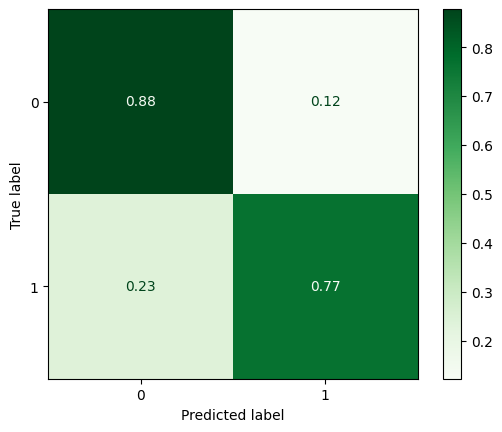

In [123]:
eval_classification(log_reg_smote_pipe, X_train, X_test, y_train, y_test)

Observation
The number of false negative is better with smote but 23% is too high. We need increase recall that is 77% in test data to decrease false negative rate. The accuracy in the test data was 87%.

In [124]:
# instantiate a model
dec_tree = DecisionTreeClassifier(random_state = 42)
# make pipeline
dec_tree_smote_pipe = make_sampler_pipeline(preprocessor, smote, dec_tree )
#Fit the model pipeline
dec_tree_smote_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001ADC39F89A0>),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001ADC39F8C70>)])),
                ('smote', SMOTE(random_state=42)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

Train Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39855
           1       1.00      1.00      1.00      4377

    accuracy                           1.00     44232
   macro avg       1.00      1.00      1.00     44232
weighted avg       1.00      1.00      1.00     44232

Test Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     13267
           1       0.46      0.62      0.53      1477

    accuracy                           0.89     14744
   macro avg       0.71      0.77      0.73     14744
weighted avg       0.91      0.89      0.90     14744



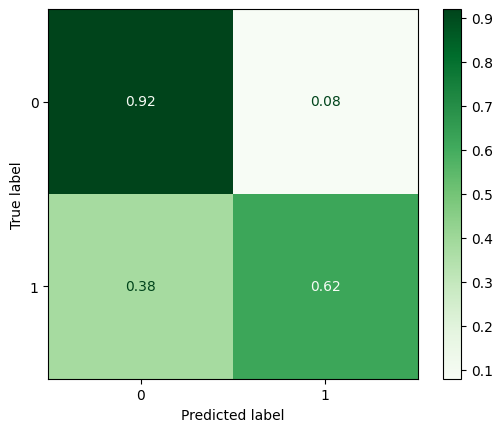

In [125]:
eval_classification(dec_tree_smote_pipe, X_train, X_test, y_train, y_test)

The False negative increase 38% Let's checkk other model 

In [126]:
#Create a list of models to be used in for loop
models = [['Decision Tree', DecisionTreeClassifier(random_state=42)], 
          ['Random Forest', RandomForestClassifier(random_state=42)],
          ['Logistic Regression', LogisticRegression(random_state=42)],
          ['KNeighbors', KNeighborsClassifier()],
          ['ADA Boost', AdaBoostClassifier(random_state = 42)],
          ['XGBoost', XGBClassifier(random_state = 42)],
          ['Gradient Boosting', GradientBoostingClassifier(random_state = 42)]]

In [128]:
model_score = model_scores.copy()
model_score = model_score.set_index('Model')

Decision Tree :

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     13267
           1       0.44      0.60      0.51      1477

    accuracy                           0.88     14744
   macro avg       0.70      0.76      0.72     14744
weighted avg       0.90      0.88      0.89     14744



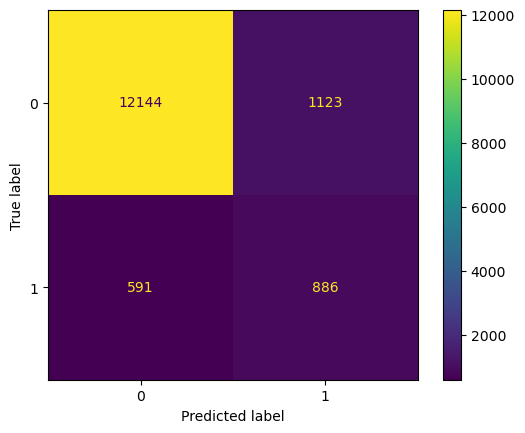

---------------------------

Random Forest :

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     13267
           1       0.70      0.60      0.64      1477

    accuracy                           0.93     14744
   macro avg       0.83      0.78      0.80     14744
weighted avg       0.93      0.93      0.93     14744



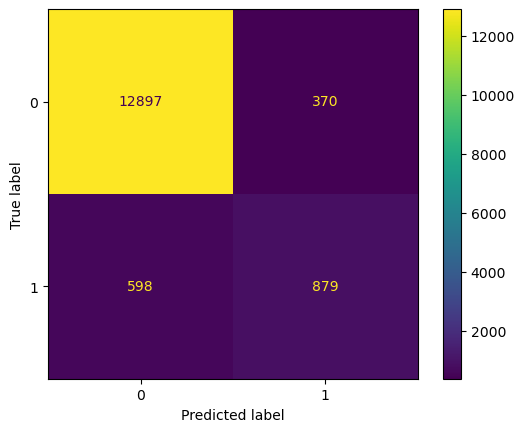

---------------------------

Logistic Regression :

              precision    recall  f1-score   support

           0       0.97      0.85      0.91     13267
           1       0.37      0.79      0.50      1477

    accuracy                           0.84     14744
   macro avg       0.67      0.82      0.70     14744
weighted avg       0.91      0.84      0.87     14744



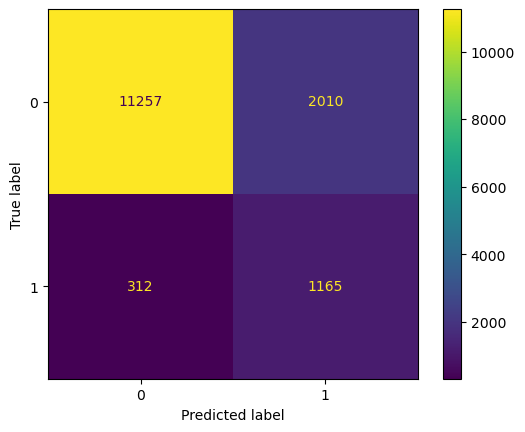

---------------------------

KNeighbors :

              precision    recall  f1-score   support

           0       0.97      0.81      0.88     13267
           1       0.31      0.75      0.44      1477

    accuracy                           0.81     14744
   macro avg       0.64      0.78      0.66     14744
weighted avg       0.90      0.81      0.84     14744



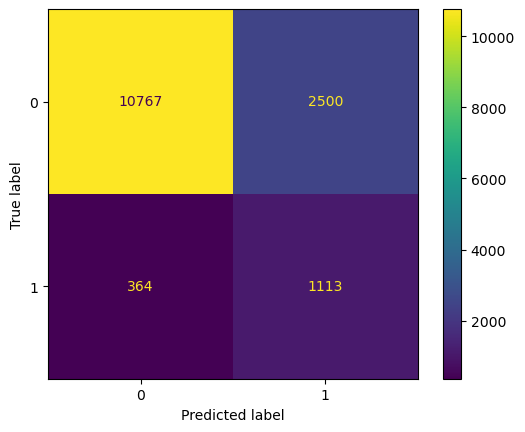

---------------------------

ADA Boost :

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     13267
           1       0.43      0.69      0.53      1477

    accuracy                           0.88     14744
   macro avg       0.70      0.79      0.73     14744
weighted avg       0.91      0.88      0.89     14744



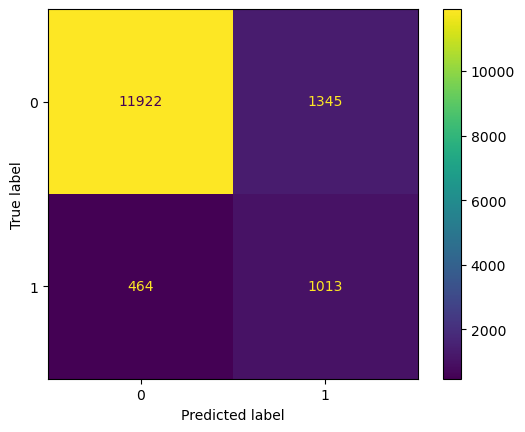

---------------------------

XGBoost :

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     13267
           1       0.73      0.60      0.66      1477

    accuracy                           0.94     14744
   macro avg       0.85      0.79      0.81     14744
weighted avg       0.93      0.94      0.94     14744



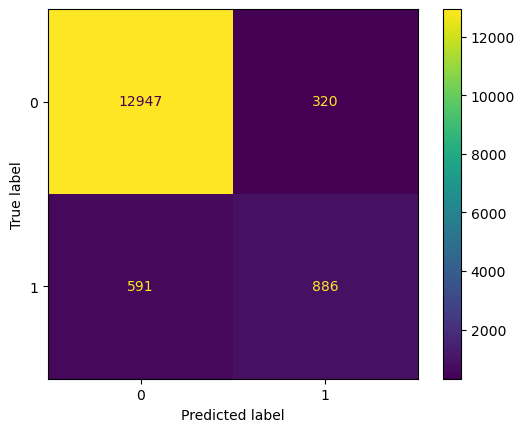

---------------------------

Gradient Boosting :

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     13267
           1       0.51      0.69      0.59      1477

    accuracy                           0.90     14744
   macro avg       0.74      0.81      0.77     14744
weighted avg       0.92      0.90      0.91     14744



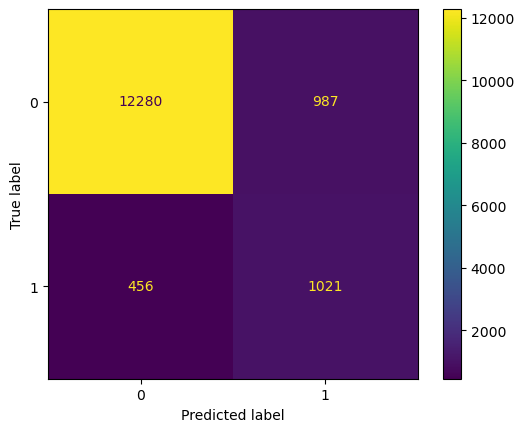

---------------------------



In [142]:
model_scores = pd.DataFrame(columns = ['Model', 'Accuracy Score', 'Precision Score', 
                                       'Recall Score', 'F1 Score', 'ROC', 'Best Parameters', 
                                       'Execution Time'])

#For loop to display baslines of all models contained in 'models' and adds data to 'model_scores'
for model in range(len(models)):
    stats = []
    tic = time.time()
    current_model = models[model][1]
    smote_model = make_sampler_pipeline(preprocessor, smote, current_model)
    smote_model.fit(X_train, y_train)
    y_pred = smote_model.predict(X_test)
    cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred);
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    best_param = 'N/A'
    toc = time.time()
    time_taken = round(toc - tic, 2)
    stats.extend([models[model][0], accuracy, precision, recall, f1, roc, best_param, time_taken])
    model_scores.loc[len(model_scores.index)] = stats

    print(models[model][0], ':\n')
    print(classification_report(y_test, y_pred))
    cm
    plt.show();
    print('---------------------------\n')

In [143]:
model_scores

Model  Accuracy Score  Precision Score  Recall Score  \
0        Decision Tree        0.883749         0.441015      0.599865   
1        Random Forest        0.934346         0.703763      0.595125   
2  Logistic Regression        0.842512         0.366929      0.788761   
3           KNeighbors        0.805751         0.308054      0.753555   
4            ADA Boost        0.877306         0.429601      0.685850   
5              XGBoost        0.938212         0.734660      0.599865   
6    Gradient Boosting        0.902130         0.508466      0.691266   

   F1 Score       ROC Best Parameters  Execution Time  
0  0.508319  0.757609             N/A           18.02  
1  0.644901  0.783618             N/A           41.60  
2  0.500860  0.818629             N/A            8.97  
3  0.437328  0.782559             N/A           20.67  
4  0.528292  0.792235             N/A           90.10  
5  0.660455  0.787872             N/A           44.42  
6  0.585940  0.808435             N/A          379.53

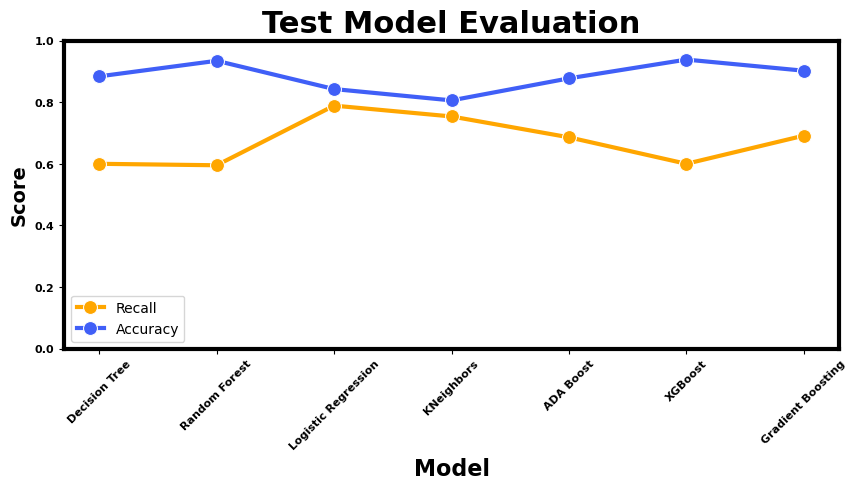

In [145]:
# Display line plot of scores
fig, ax = plt.subplots(nrows=1, figsize=(10,4), facecolor='w')
plt.title('Test Model Evaluation', fontsize = 22, weight='bold')
sns.lineplot(data=model_score['Recall Score'], color="#ffa600", linewidth=3, markersize=10, marker='o', label='Recall');
sns.lineplot(data=model_score['Accuracy Score'], color="#405ff7", linewidth=3, markersize=10, marker='o', label='Accuracy');
plt.xlabel('Model', fontsize = 16, weight='bold')
plt.xticks(weight='bold', rotation = 45)
ax.set_ylabel('Score', fontweight='bold', fontsize=14)
ax.set_ylim(0, 1)
ax.tick_params(labelcolor='k', labelsize=8)
ax.set_yticklabels(np.round(np.arange(0,1.1, 0.2), 1), weight='bold')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3);

## Get feature names out

In [62]:
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['age', 'LOSdays', 'NumCallouts', ...,
       'AdmitProcedure_Wide excision of lip les',
       'AdmitProcedure_Wound irrigation NEC', 'AdmitProcedure_na'],
      dtype=object)

## Remaking Our X_train and X_test as DataFrames with the New Feature Names

In [63]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_df.head(3)

age   LOSdays  NumCallouts  NumDiagnosis  NumProcs  NumCPTevents  \
47511 -2.026905 -0.545825    -0.612111     -0.218542 -0.048086     -0.495760   
14067  0.961325 -0.327182     0.434573     -0.000457 -0.129484      0.111665   
17354  0.693151 -0.257216    -0.612111     -0.169661 -0.184718      0.038038   

       NumInput   NumLabs  NumMicroLabs  NumNotes  ...  \
47511 -0.547269 -0.410458     -0.159776 -0.057420  ...   
14067 -0.370167  0.159551     -0.189440 -0.058393  ...   
17354 -0.447751 -0.224363     -0.324276 -0.059172  ...   

       AdmitProcedure_Ventricl shunt-abdomen  \
47511                                    0.0   
14067                                    0.0   
17354                                    0.0   

       AdmitProcedure_Vertebral fx repair  \
47511                                 0.0   
14067                                 0.0   
17354                                 0.0   

       AdmitProcedure_Vesic fistula repair NEC  \
47511                                      0.0   
14067                                      0.0   
17354                                      0.0   

       AdmitProcedure_Vessel operation NEC  \
47511                                  0.0   
14067                                  0.0   
17354                                  0.0   

       AdmitProcedure_Video/radio eeg monitor  \
47511                                     0.0   
14067                                     0.0   
17354                                     0.0   

       AdmitProcedure_Vitreous operation NEC  \
47511                                    0.0   
14067                                    0.0   
17354                                    0.0   

       AdmitProcedure_Whole blood transfus NEC  \
47511                                      0.0   
14067                                      0.0   
17354                                      0.0   

       AdmitProcedure_Wide excision of lip les  \
47511                                      0.0   
14067                                      0.0   
17354                                      0.0   

       AdmitProcedure_Wound irrigation NEC  AdmitProcedure_na  
47511                                  0.0                0.0  
14067                                  0.0                0.0  
17354                                  0.0                0.0  

[3 rows x 13541 columns]

In [64]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

age   LOSdays  NumCallouts  NumDiagnosis  NumProcs  NumCPTevents  \
40028  0.731461 -0.267552    -0.612111     -0.165901  0.030404     -0.495760   
38143 -1.145761  0.265937    -0.181123     -0.202248 -0.097506     -0.053996   
14276 -2.026905 -0.538670    -0.612111     -0.184701 -0.225416     -0.495760   

       NumInput   NumLabs  NumMicroLabs  NumNotes  ...  \
40028 -0.050766 -0.067779     -0.205620 -0.054500  ...   
38143 -0.478748 -0.155369     -0.224497 -0.059561  ...   
14276 -0.504308 -0.511927     -0.243375 -0.053332  ...   

       AdmitProcedure_Ventricl shunt-abdomen  \
40028                                    0.0   
38143                                    0.0   
14276                                    0.0   

       AdmitProcedure_Vertebral fx repair  \
40028                                 0.0   
38143                                 0.0   
14276                                 0.0   

       AdmitProcedure_Vesic fistula repair NEC  \
40028                                      0.0   
38143                                      0.0   
14276                                      0.0   

       AdmitProcedure_Vessel operation NEC  \
40028                                  0.0   
38143                                  0.0   
14276                                  0.0   

       AdmitProcedure_Video/radio eeg monitor  \
40028                                     0.0   
38143                                     0.0   
14276                                     0.0   

       AdmitProcedure_Vitreous operation NEC  \
40028                                    0.0   
38143                                    0.0   
14276                                    0.0   

       AdmitProcedure_Whole blood transfus NEC  \
40028                                      0.0   
38143                                      0.0   
14276                                      0.0   

       AdmitProcedure_Wide excision of lip les  \
40028                                      0.0   
38143                                      0.0   
14276                                      0.0   

       AdmitProcedure_Wound irrigation NEC  AdmitProcedure_na  
40028                                  0.0                1.0  
38143                                  0.0                0.0  
14276                                  0.0                1.0  

[3 rows x 13541 columns]

In [65]:
## confirm the first 3 rows index in y_test matches X_test_df
y_test.head(3)

40028    0
38143    0
14276    0
Name: ExpiredHospital, dtype: int64

## Inspect the Result

In [66]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_df).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_df).sum().sum(), 'missing values in testing data')
print('\n')
print('shape of data is', X_train_df.shape)
print('\n')
X_train_df

0 missing values in training data
0 missing values in testing data


shape of data is (44232, 13541)




age   LOSdays  NumCallouts  NumDiagnosis  NumProcs  NumCPTevents  \
47511 -2.026905 -0.545825    -0.612111     -0.218542 -0.048086     -0.495760   
14067  0.961325 -0.327182     0.434573     -0.000457 -0.129484      0.111665   
17354  0.693151 -0.257216    -0.612111     -0.169661 -0.184718      0.038038   
3942   0.424976 -0.416230     0.619282     -0.128300 -0.048086     -0.026386   
9406   0.539908 -0.055270     0.680852      0.183788 -0.042272      0.332547   
...         ...       ...          ...           ...       ...           ...   
54343  0.310044 -0.005975     0.003586     -0.120779 -0.138205      0.281929   
38158 -0.187994  0.713559    -0.304263     -0.241102 -0.117856      0.346353   
860    0.769772 -0.164989    -0.612111     -0.193475 -0.117856     -0.495760   
15795  0.539908 -0.376476     0.496143     -0.078165 -0.173089      0.268124   
56422 -0.341237 -0.807402    -0.612111     -0.332598 -0.225416     -0.495760   

       NumInput   NumLabs  NumMicroLabs  NumNotes  ...  \
47511 -0.547269 -0.410458     -0.159776 -0.057420  ...   
14067 -0.370167  0.159551     -0.189440 -0.058393  ...   
17354 -0.447751 -0.224363     -0.324276 -0.059172  ...   
3942   0.152802  0.061180     -0.213711 -0.056155  ...   
9406   0.146457  0.094465     -0.038423 -0.058490  ...   
...         ...       ...           ...       ...  ...   
54343 -0.448295  0.051613      0.050569 -0.060339  ...   
38158  1.581947  0.175991     -0.014153 -0.059269  ...   
860   -0.046959  0.053634     -0.024939 -0.058782  ...   
15795 -0.460259 -0.193369     -0.024939 -0.059074  ...   
56422 -0.547269 -0.623504     -0.324276 -0.061021  ...   

       AdmitProcedure_Ventricl shunt-abdomen  \
47511                                    0.0   
14067                                    0.0   
17354                                    0.0   
3942                                     0.0   
9406                                     0.0   
...                                      ...   
54343                                    0.0   
38158                                    0.0   
860                                      0.0   
15795                                    0.0   
56422                                    0.0   

       AdmitProcedure_Vertebral fx repair  \
47511                                 0.0   
14067                                 0.0   
17354                                 0.0   
3942                                  0.0   
9406                                  0.0   
...                                   ...   
54343                                 0.0   
38158                                 0.0   
860                                   0.0   
15795                                 0.0   
56422                                 0.0   

       AdmitProcedure_Vesic fistula repair NEC  \
47511                                      0.0   
14067                                      0.0   
17354                                      0.0   
3942                                       0.0   
9406                                       0.0   
...                                        ...   
54343                                      0.0   
38158                                      0.0   
860                                        0.0   
15795                                      0.0   
56422                                      0.0   

       AdmitProcedure_Vessel operation NEC  \
47511                                  0.0   
14067                                  0.0   
17354                                  0.0   
3942                                   0.0   
9406                                   0.0   
...                                    ...   
54343                                  0.0   
38158                                  0.0   
860                                    0.0   
15795                                  0.0   
56422                                  0.0   

       AdmitProcedure_Video/radio eeg monitor  \
47511                            

## Saving & Loading Models (joblib)

In [67]:
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor}

In [68]:
# making new folder with os
import os
import joblib
folder = "Models/"
os.makedirs(folder, exist_ok=True)

# Confirm folder created
fname = folder+'Project1.joblib'
joblib.dump(export, fname)

['Models/Project1.joblib']

##  Extracting Coefficients from LogisticRegression

In [85]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_df, y_train)

LogisticRegression(max_iter=1000)

In [86]:
try:
    get_coeffs_linreg(logreg)
except Exception as e:
    print("ERROR: ", e) 

ERROR:  name 'get_coeffs_linreg' is not defined


In [87]:
logreg.coef_

array([[ 0.63430414,  0.18466892, -0.44798028, ..., -0.02932951,
        -0.02627462,  0.20336679]])

In [88]:
logreg.intercept_

array([-3.10253003])

## Writing a get_coeffs_logreg functio
Let's define a new get_coeffs_logreg function that we can use for LogisticRegression models.

In [89]:
#Updating our function
def get_coeffs_logreg(logreg, feature_names = None, sort=True,ascending=True,
                      name='LogReg Coefficients', class_index=0, 
                      as_odds=False):
    
    if feature_names is None:
        feature_names = logreg.feature_names_in_
        
    ## Saving the coefficients
    coeffs = pd.Series(logreg.coef_[class_index],
                       index= feature_names, name=name)
    
    # use .loc to add the intercept to the series
    coeffs.loc['intercept'] = logreg.intercept_[class_index]
        
    if as_odds==True:
        coeffs = np.exp(coeffs)
    if sort == True:
        coeffs = coeffs.sort_values(ascending=ascending)
    
        
    return coeffs

In [90]:
coeffs_odds = get_coeffs_logreg(logreg)
coeffs_odds

intercept                                 -3.102530
AdmitProcedure_1 int mam-cor art bypass   -2.314392
AdmitProcedure_Aortocor bypas-2 cor art   -2.217443
AdmitDiagnosis_DIABETIC KETOACIDOSIS      -1.965664
AdmitProcedure_Aortocor bypas-3 cor art   -1.924511
                                             ...   
AdmitProcedure_Percu abdominal drainage    1.906105
AdmitDiagnosis_HEMORRHAGIC STROKE          1.926868
AdmitProcedure_Allo hem stem ct w/o pur    2.019411
AdmitProcedure_Cardiopulm resuscita NOS    2.831659
AdmitDiagnosis_ORGAN DONOR ACCOUNT         3.985788
Name: LogReg Coefficients, Length: 13542, dtype: float64

In [91]:
## color -coding top 5 bars
decrease_coeff = coeffs_odds.sort_values(ascending=True).tail(20).index
decrease_coeff

Index(['AdmitProcedure_Blood vessel biopsy',
       'AdmitDiagnosis_INTRAPARENCHYMAL HEMORRHAGE;TELEMETRY',
       'AdmitProcedure_Closure liver lacerat',
       'AdmitProcedure_Transjugular liver bx',
       'AdmitProcedure_Closed liver biopsy',
       'AdmitDiagnosis_ETOH LIVER DISEASE', 'AdmitDiagnosis_ASCITES',
       'NumLabs', 'AdmitDiagnosis_ACUTE ABDOMEN',
       'AdmitDiagnosis_PONTINE BLEED', 'AdmitProcedure_Brain lobectomy',
       'AdmitDiagnosis_NEUTROPENIC FEVER',
       'AdmitProcedure_Platelet transfusion', 'AdmitProcedure_Bone biopsy NEC',
       'AdmitDiagnosis_CIRRHOSIS', 'AdmitProcedure_Percu abdominal drainage',
       'AdmitDiagnosis_HEMORRHAGIC STROKE',
       'AdmitProcedure_Allo hem stem ct w/o pur',
       'AdmitProcedure_Cardiopulm resuscita NOS',
       'AdmitDiagnosis_ORGAN DONOR ACCOUNT'],
      dtype='object')

In [92]:
## create a dictionary of each feature and its color
colors_dict = {}
for col in coeffs_odds.index:
    if col in decrease_coeff:
        colors_dict[col] = 'red'    
    else:
        colors_dict[col] = '#006ba4'
colors_dict

{'intercept': '#006ba4',
 'AdmitProcedure_1 int mam-cor art bypass': '#006ba4',
 'AdmitProcedure_Aortocor bypas-2 cor art': '#006ba4',
 'AdmitDiagnosis_DIABETIC KETOACIDOSIS': '#006ba4',
 'AdmitProcedure_Aortocor bypas-3 cor art': '#006ba4',
 'AdmitProcedure_Liver transplant NEC': '#006ba4',
 'AdmitProcedure_Opn/oth rep aort vlv-tis': '#006ba4',
 'AdmitDiagnosis_OVERDOSE': '#006ba4',
 'AdmitProcedure_Aortocor bypas-1 cor art': '#006ba4',
 'AdmitProcedure_Opn/oth rep mitral valve': '#006ba4',
 'AdmitProcedure_Annuloplasty': '#006ba4',
 'AdmitDiagnosis_FOUND DOWN': '#006ba4',
 'AdmitProcedure_Implt/repl carddefib tot': '#006ba4',
 'AdmitDiagnosis_ANGIOEDEMA': '#006ba4',
 'AdmitProcedure_Opn mitral valvuloplasty': '#006ba4',
 'AdmitProcedure_Opn/oth rep mtrl vlv-tis': '#006ba4',
 'AdmitDiagnosis_ACUTE MYOCARDIAL INFARCTION': '#006ba4',
 'AdmitProcedure_Aortcor bypas-4+ cor art': '#006ba4',
 'AdmitProcedure_Exc/dest hrt lesion open': '#006ba4',
 'AdmitDiagnosis_S/P ASSAULT': '#006ba4',
 'A

In [93]:
## we can plot bars features that decrease in red : 
colors = coeffs_odds.index.map(colors_dict)

In [94]:
# function to get coefficients
def annotate_hbars(ax, ha='left',va='center',size=12,  xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
    
        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height()/2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha,va=va,size=size,
                        xytext=xytext, textcoords=textcoords)

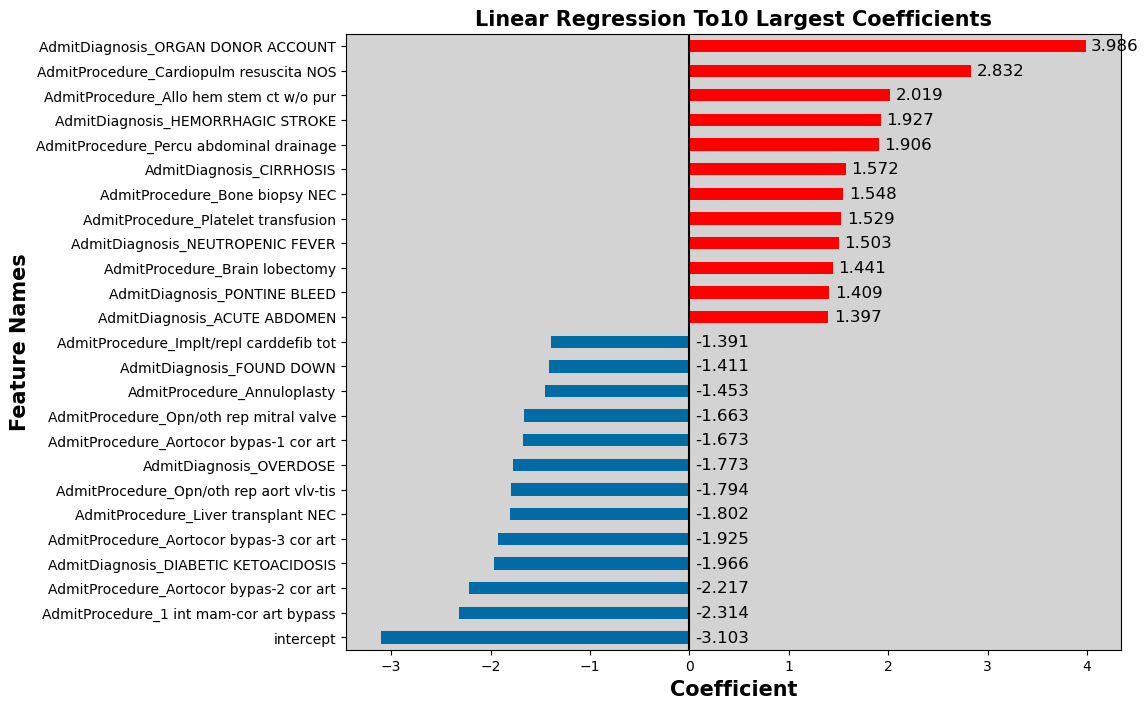

In [95]:
fig, ax = plt.subplots(figsize=(10, 8))
coeff_rank = coeffs_odds.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(25)
plot_vals = coeffs_odds.loc[top_n_features.index].sort_values()
colors = plot_vals.index.map(colors_dict)       
ax = plot_vals.plot(color=colors, kind = 'barh')
ax.set_title(f"Linear Regression To10 Largest Coefficients", fontsize = 15, fontweight='bold')
ax.set_xlabel('Coefficient', fontsize = 15, fontweight='bold') 
ax.set_ylabel('Feature Names', fontsize = 15, fontweight='bold')
ax.set_facecolor("lightgray")
ax.axvline(0, color='k')
annotate_hbars(ax, ha='left',va='center',size=12,xytext=(4,0),
                       textcoords='offset points')

### Observation
Positive values indicate the feature makes it more likely the patient will not survive

Negative values indicate the feature makes it less likely the patient will died.

In order for us to explain the logistic regression coefficients in plain English, we first need to convert the log-odds into odds.

In [97]:
# function to plot
def plot_coeffs(coeffs, top_n=None,  figsize=(10,5), intercept=False,  intercept_name = "intercept", color = None, annotate=False, ha='left',va='center', size=12, xytext=(4,0), textcoords='offset points'):
  """Plots the top_n coefficients from a Series, with optional annotations."""
# Drop intercept if intercept=False and 
  if (intercept==False) & ( intercept_name in coeffs.index):
    coeffs = coeffs.drop(intercept_name)
  if top_n==None:
    ## sort all features and set title
    plot_vals = coeffs#.sort_values()
    title = "All Coefficients - Ranked by Magnitude"
  else:
    ## rank the coeffs and select the top_n
    coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
    top_n_features = coeff_rank.head(top_n)
## sort features and keep top_n and set title
    plot_vals = coeffs.loc[top_n_features.index].sort_values()

       
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set_title(f"Linear Regression Top {top_n} Largest Coefficients", fontsize = 15, fontweight='bold')
    ax.set_xlabel('Coefficient', fontsize = 15, fontweight='bold') 
    ax.set_ylabel('Feature Names', fontsize = 15, fontweight='bold')
    ax.set_facecolor("lightgray")
    ax.axvline(0, color='k')
    ## annotating bar values 
  if annotate==True:
    annotate_hbars(ax, ha=ha,va=va,size=size,xytext=xytext,
                       textcoords=textcoords)
    return ax

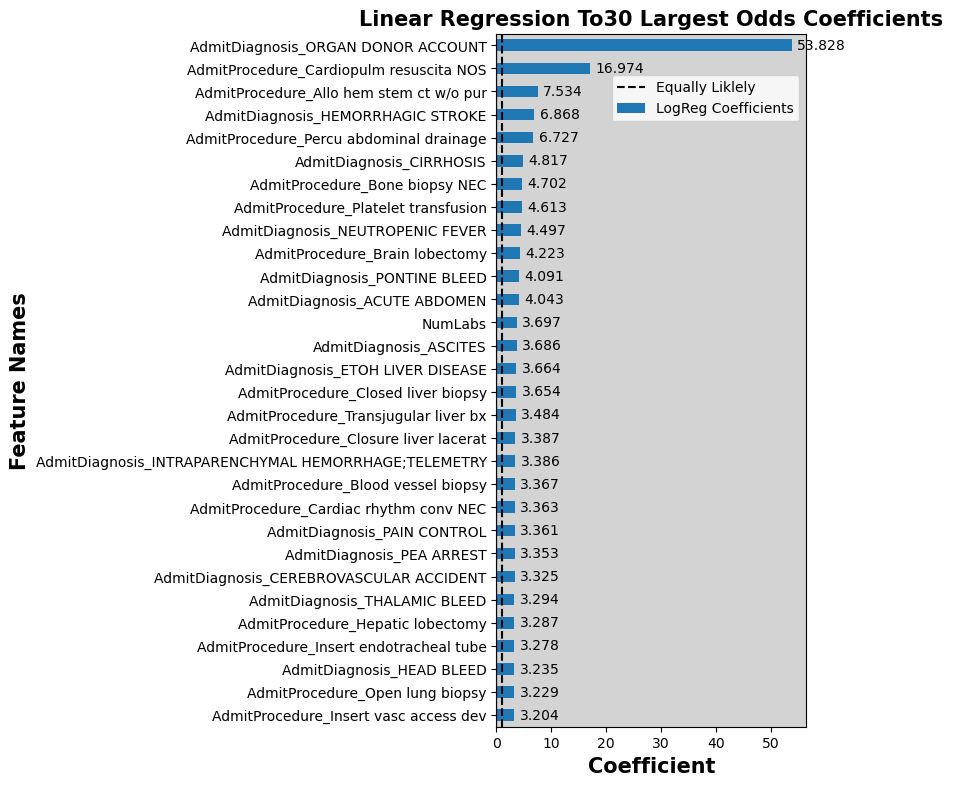

In [100]:
fig, ax = plt.subplots(figsize=(10, 8))
coeffs_odds = get_coeffs_logreg(logreg, as_odds=True)
ax = plot_coeffs(coeffs_odds,top_n=30, annotate=True, figsize=(4,9),size=10)
ax.set_facecolor("lightgray")
ax.axvline(0, color='k')
ax.set_title(f"Linear Regression To30 Largest Odds Coefficients", fontsize = 15, fontweight='bold')
ax.axvline(1, ls='--',label='Equally Liklely',color='k', zorder=1)
ax.legend(bbox_to_anchor=[1,.95])
plt.show()

### Observation :
Admit procedure  emerges as the most influential feature impacting mortality .Lets repeat without this column because  Organ Donor is already dead.   

In [157]:
FILE = r"C:\Users\esnak\Downloads\mimic3c.csv (2)\mimic3c.csv"

df_ml = pd.read_csv(FILE)
df_ml.head(3)

hadm_id gender  age  LOSdays admit_type             admit_location  \
0   100001      F   35     6.17  EMERGENCY  CLINIC REFERRAL/PREMATURE   
1   100003      M   59     4.04  EMERGENCY       EMERGENCY ROOM ADMIT   
2   100006      F   48    12.04  EMERGENCY       EMERGENCY ROOM ADMIT   

          AdmitDiagnosis insurance           religion marital_status  ...  \
0  DIABETIC KETOACIDOSIS   Private  PROTESTANT QUAKER       DIVORCED  ...   
1         UPPER GI BLEED   Private      NOT SPECIFIED         SINGLE  ...   
2             COPD FLARE   Private      NOT SPECIFIED         SINGLE  ...   

  NumMicroLabs  NumNotes  NumOutput  NumRx NumProcEvents  NumTransfers  \
0         0.65      0.05       5.19  14.91          1.13          0.65   
1         1.24      1.59       5.45   7.18          0.99          1.24   
2         0.33      0.15       4.15   6.23          0.00          0.33   

   NumChartEvents  ExpiredHospital  TotalNumInteract  LOSgroupNum  
0          398.70                0            493.89            2  
1          373.02                0            465.71            2  
2          286.21                0            344.00            4  

[3 rows x 28 columns]

In [158]:
df_ml.columns

Index(['hadm_id', 'gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum'],
      dtype='object')

In [159]:
# matrix
X = df_ml.drop(columns=['ExpiredHospital', 'hadm_id', 'AdmitDiagnosis'])

# target
y = df_ml['ExpiredHospital']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.shape

(44232, 25)

In [163]:
cat_selector(X_train)

['gender',
 'admit_type',
 'admit_location',
 'insurance',
 'religion',
 'marital_status',
 'ethnicity',
 'AdmitProcedure']

In [164]:
num_selector(X_train)

['age',
 'LOSdays',
 'NumCallouts',
 'NumDiagnosis',
 'NumProcs',
 'NumCPTevents',
 'NumInput',
 'NumLabs',
 'NumMicroLabs',
 'NumNotes',
 'NumOutput',
 'NumRx',
 'NumProcEvents',
 'NumTransfers',
 'NumChartEvents',
 'TotalNumInteract',
 'LOSgroupNum']

In [165]:
categorical_pipeline = make_pipeline(cat_imputer, ohe)
categorical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
# ColumTransformer, put all together: numerical and categorical 
preprocessor = make_column_transformer((scaler, num_selector ), (categorical_pipeline, cat_selector ), remainder='passthrough', verbose_feature_names_out=False)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000260D861D820>),
                                ('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000260D803FEE0>)],
                  verbose_feature_names_out=False)

In [167]:
## Test Col Transformer
X_train_processed = preprocessor.fit_transform(X_train)

In [168]:
smote = SMOTE(random_state = 42)
smote_pipe = make_sampler_pipeline(preprocessor, smote)
#Fit and evaluate the model pipeline
#smote_pipe.fit(X_train, y_train)

In [169]:
X_train_processed, y_train_processed = smote_pipe.fit_resample(X_train, y_train)

In [139]:
logreg_default = LogisticRegression(random_state = 42)
#Create model pipeline with preprocessor, SMOTE, and model
smote = SMOTE(random_state = 42)
log_reg_smote_pipe = make_sampler_pipeline(preprocessor, smote, logreg_default)
#Fit and evaluate the model pipeline
log_reg_smote_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000260D861D820>),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000260D803FEE0>)],
                                   verbose_feature_names_out=False)),
                ('smote', SMOTE(random_state=42)),
                ('logisticregression', LogisticRegression(random_state=42))])

In [170]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
print('Target is balanced:')
print(y_train_processed.value_counts())

0 missing values in training data


All data in X_train_processed are float64


shape of data is (79710, 1277)


Target is balanced:
0    39855
1    39855
Name: ExpiredHospital, dtype: int64


In [172]:
#Create a list of models to be used in for loop
models = [['Decision Tree', DecisionTreeClassifier(random_state=42)], 
          ['Random Forest', RandomForestClassifier(random_state=42)],
          ['Logistic Regression', LogisticRegression(random_state=42)],
          ['KNeighbors', KNeighborsClassifier()],
          ['ADA Boost', AdaBoostClassifier(random_state = 42)],
          ['XGBoost', XGBClassifier(random_state = 42)],
          ['Gradient Boosting', GradientBoostingClassifier(random_state = 42)]]

In [171]:
X_train.columns

Index(['gender', 'age', 'LOSdays', 'admit_type', 'admit_location', 'insurance',
       'religion', 'marital_status', 'ethnicity', 'NumCallouts',
       'NumDiagnosis', 'NumProcs', 'AdmitProcedure', 'NumCPTevents',
       'NumInput', 'NumLabs', 'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx',
       'NumProcEvents', 'NumTransfers', 'NumChartEvents', 'TotalNumInteract',
       'LOSgroupNum'],
      dtype='object')

Decision Tree :

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     13267
           1       0.44      0.60      0.51      1477

    accuracy                           0.88     14744
   macro avg       0.70      0.76      0.72     14744
weighted avg       0.90      0.88      0.89     14744



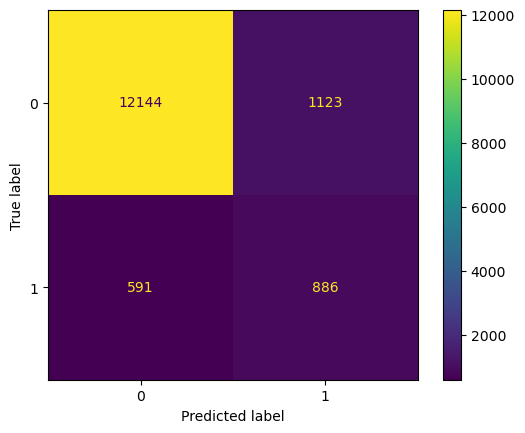

---------------------------

Random Forest :

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     13267
           1       0.70      0.60      0.64      1477

    accuracy                           0.93     14744
   macro avg       0.83      0.78      0.80     14744
weighted avg       0.93      0.93      0.93     14744



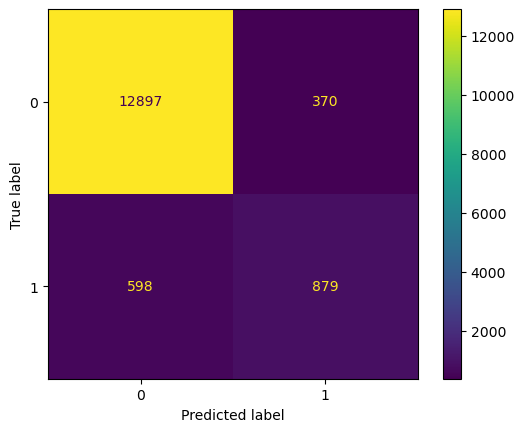

---------------------------

Logistic Regression :

              precision    recall  f1-score   support

           0       0.97      0.85      0.91     13267
           1       0.37      0.79      0.50      1477

    accuracy                           0.84     14744
   macro avg       0.67      0.82      0.70     14744
weighted avg       0.91      0.84      0.87     14744



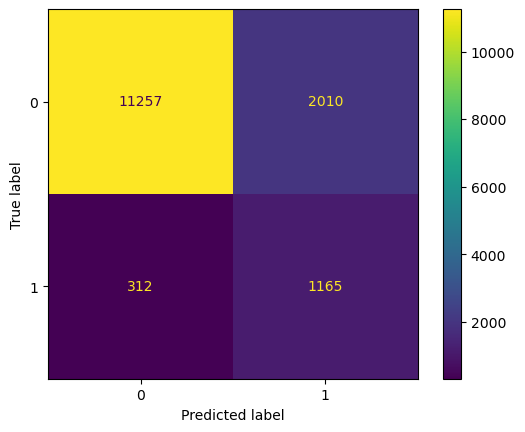

---------------------------

KNeighbors :

              precision    recall  f1-score   support

           0       0.97      0.81      0.88     13267
           1       0.31      0.75      0.44      1477

    accuracy                           0.81     14744
   macro avg       0.64      0.78      0.66     14744
weighted avg       0.90      0.81      0.84     14744



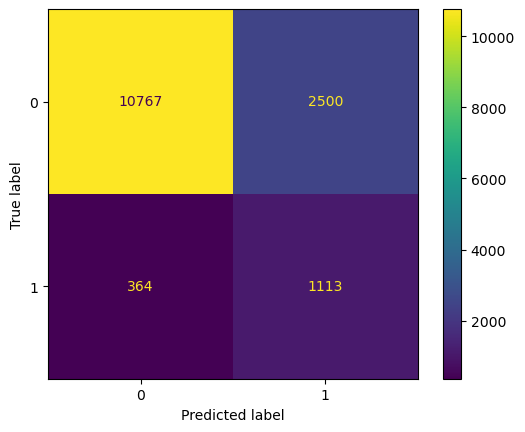

---------------------------

ADA Boost :

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     13267
           1       0.43      0.69      0.53      1477

    accuracy                           0.88     14744
   macro avg       0.70      0.79      0.73     14744
weighted avg       0.91      0.88      0.89     14744



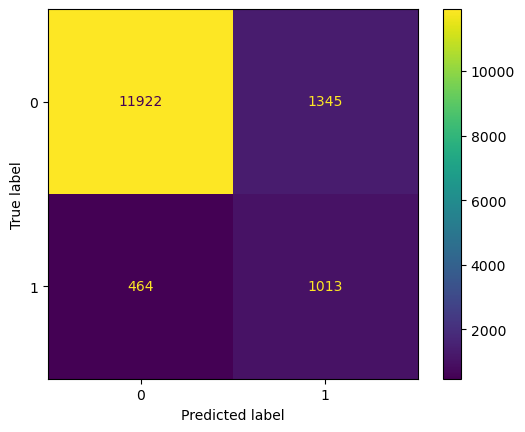

---------------------------

XGBoost :

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     13267
           1       0.73      0.60      0.66      1477

    accuracy                           0.94     14744
   macro avg       0.85      0.79      0.81     14744
weighted avg       0.93      0.94      0.94     14744



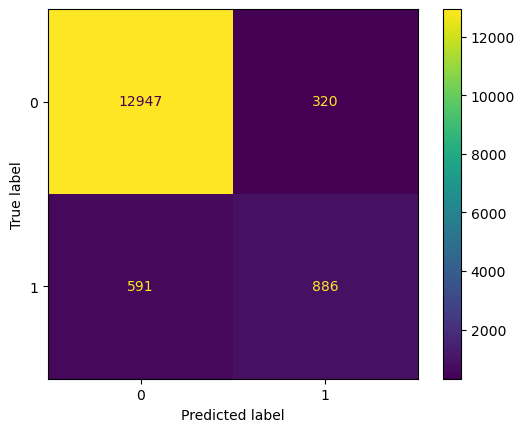

---------------------------

Gradient Boosting :

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     13267
           1       0.51      0.69      0.59      1477

    accuracy                           0.90     14744
   macro avg       0.74      0.81      0.77     14744
weighted avg       0.92      0.90      0.91     14744



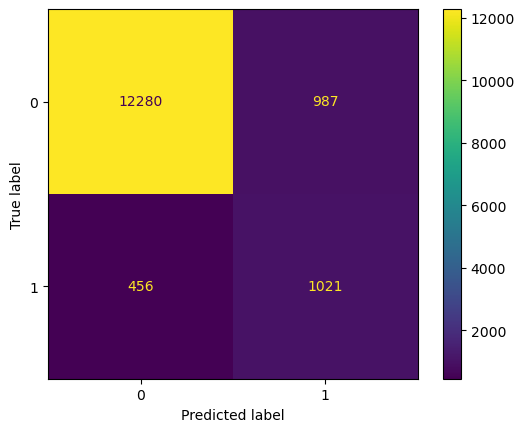

---------------------------



In [173]:
model_scores = pd.DataFrame(columns = ['Model', 'Accuracy Score', 'Precision Score', 
                                       'Recall Score', 'F1 Score', 'ROC', 'Best Parameters', 
                                       'Execution Time'])

#For loop to display baslines of all models contained in 'models' and adds data to 'model_scores'
for model in range(len(models)):
    stats = []
    tic = time.time()
    current_model = models[model][1]
    smote_model = make_sampler_pipeline(preprocessor, smote, current_model)
    smote_model.fit(X_train, y_train)
    y_pred = smote_model.predict(X_test)
    cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred);
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    best_param = 'N/A'
    toc = time.time()
    time_taken = round(toc - tic, 2)
    stats.extend([models[model][0], accuracy, precision, recall, f1, roc, best_param, time_taken])
    model_scores.loc[len(model_scores.index)] = stats

    print(models[model][0], ':\n')
    print(classification_report(y_test, y_pred))
    cm
    plt.show();
    print('---------------------------\n')

In [174]:
model_scores

Model  Accuracy Score  Precision Score  Recall Score  \
0        Decision Tree        0.883749         0.441015      0.599865   
1        Random Forest        0.934346         0.703763      0.595125   
2  Logistic Regression        0.842512         0.366929      0.788761   
3           KNeighbors        0.805751         0.308054      0.753555   
4            ADA Boost        0.877306         0.429601      0.685850   
5              XGBoost        0.938212         0.734660      0.599865   
6    Gradient Boosting        0.902130         0.508466      0.691266   

   F1 Score       ROC Best Parameters  Execution Time  
0  0.508319  0.757609             N/A           17.96  
1  0.644901  0.783618             N/A           42.37  
2  0.500860  0.818629             N/A            9.84  
3  0.437328  0.782559             N/A           23.28  
4  0.528292  0.792235             N/A           91.84  
5  0.660455  0.787872             N/A           46.02  
6  0.585940  0.808435             N/A          399.27

In [177]:
model_score = model_scores.copy()
model_score = model_score.set_index('Model')

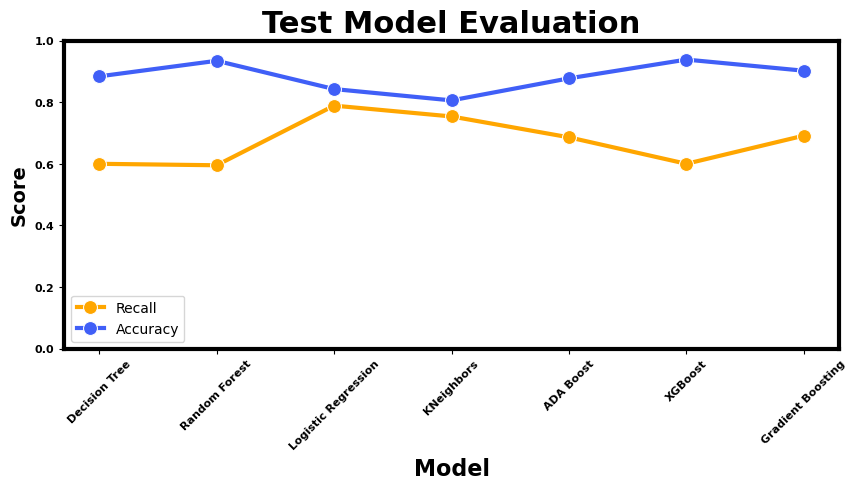

In [178]:
# Display line plot of scores
fig, ax = plt.subplots(nrows=1, figsize=(10,4), facecolor='w')
plt.title('Test Model Evaluation', fontsize = 22, weight='bold')
sns.lineplot(data=model_score['Recall Score'], color="#ffa600", linewidth=3, markersize=10, marker='o', label='Recall');
sns.lineplot(data=model_score['Accuracy Score'], color="#405ff7", linewidth=3, markersize=10, marker='o', label='Accuracy');
plt.xlabel('Model', fontsize = 16, weight='bold')
plt.xticks(weight='bold', rotation = 45)
ax.set_ylabel('Score', fontweight='bold', fontsize=14)
ax.set_ylim(0, 1)
ax.tick_params(labelcolor='k', labelsize=8)
ax.set_yticklabels(np.round(np.arange(0,1.1, 0.2), 1), weight='bold')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3);

In [146]:
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['age', 'LOSdays', 'NumCallouts', ...,
       'AdmitProcedure_Wide excision of lip les',
       'AdmitProcedure_Wound irrigation NEC', 'AdmitProcedure_na'],
      dtype=object)

In [179]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_df.head(3)

age   LOSdays  NumCallouts  NumDiagnosis  NumProcs  NumCPTevents  \
47511 -2.026905 -0.545825    -0.612111     -0.218542 -0.048086     -0.495760   
14067  0.961325 -0.327182     0.434573     -0.000457 -0.129484      0.111665   
17354  0.693151 -0.257216    -0.612111     -0.169661 -0.184718      0.038038   

       NumInput   NumLabs  NumMicroLabs  NumNotes  ...  \
47511 -0.547269 -0.410458     -0.159776 -0.057420  ...   
14067 -0.370167  0.159551     -0.189440 -0.058393  ...   
17354 -0.447751 -0.224363     -0.324276 -0.059172  ...   

       AdmitProcedure_Ventricl shunt-abdomen  \
47511                                    0.0   
14067                                    0.0   
17354                                    0.0   

       AdmitProcedure_Vertebral fx repair  \
47511                                 0.0   
14067                                 0.0   
17354                                 0.0   

       AdmitProcedure_Vesic fistula repair NEC  \
47511                                      0.0   
14067                                      0.0   
17354                                      0.0   

       AdmitProcedure_Vessel operation NEC  \
47511                                  0.0   
14067                                  0.0   
17354                                  0.0   

       AdmitProcedure_Video/radio eeg monitor  \
47511                                     0.0   
14067                                     0.0   
17354                                     0.0   

       AdmitProcedure_Vitreous operation NEC  \
47511                                    0.0   
14067                                    0.0   
17354                                    0.0   

       AdmitProcedure_Whole blood transfus NEC  \
47511                                      0.0   
14067                                      0.0   
17354                                      0.0   

       AdmitProcedure_Wide excision of lip les  \
47511                                      0.0   
14067                                      0.0   
17354                                      0.0   

       AdmitProcedure_Wound irrigation NEC  AdmitProcedure_na  
47511                                  0.0                0.0  
14067                                  0.0                0.0  
17354                                  0.0                0.0  

[3 rows x 1277 columns]

In [180]:
X_train_df.columns

Index(['age', 'LOSdays', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs', 'NumNotes',
       ...
       'AdmitProcedure_Ventricl shunt-abdomen',
       'AdmitProcedure_Vertebral fx repair',
       'AdmitProcedure_Vesic fistula repair NEC',
       'AdmitProcedure_Vessel operation NEC',
       'AdmitProcedure_Video/radio eeg monitor',
       'AdmitProcedure_Vitreous operation NEC',
       'AdmitProcedure_Whole blood transfus NEC',
       'AdmitProcedure_Wide excision of lip les',
       'AdmitProcedure_Wound irrigation NEC', 'AdmitProcedure_na'],
      dtype='object', length=1277)

In [181]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

age   LOSdays  NumCallouts  NumDiagnosis  NumProcs  NumCPTevents  \
40028  0.731461 -0.267552    -0.612111     -0.165901  0.030404     -0.495760   
38143 -1.145761  0.265937    -0.181123     -0.202248 -0.097506     -0.053996   
14276 -2.026905 -0.538670    -0.612111     -0.184701 -0.225416     -0.495760   

       NumInput   NumLabs  NumMicroLabs  NumNotes  ...  \
40028 -0.050766 -0.067779     -0.205620 -0.054500  ...   
38143 -0.478748 -0.155369     -0.224497 -0.059561  ...   
14276 -0.504308 -0.511927     -0.243375 -0.053332  ...   

       AdmitProcedure_Ventricl shunt-abdomen  \
40028                                    0.0   
38143                                    0.0   
14276                                    0.0   

       AdmitProcedure_Vertebral fx repair  \
40028                                 0.0   
38143                                 0.0   
14276                                 0.0   

       AdmitProcedure_Vesic fistula repair NEC  \
40028                                      0.0   
38143                                      0.0   
14276                                      0.0   

       AdmitProcedure_Vessel operation NEC  \
40028                                  0.0   
38143                                  0.0   
14276                                  0.0   

       AdmitProcedure_Video/radio eeg monitor  \
40028                                     0.0   
38143                                     0.0   
14276                                     0.0   

       AdmitProcedure_Vitreous operation NEC  \
40028                                    0.0   
38143                                    0.0   
14276                                    0.0   

       AdmitProcedure_Whole blood transfus NEC  \
40028                                      0.0   
38143                                      0.0   
14276                                      0.0   

       AdmitProcedure_Wide excision of lip les  \
40028                                      0.0   
38143                                      0.0   
14276                                      0.0   

       AdmitProcedure_Wound irrigation NEC  AdmitProcedure_na  
40028                                  0.0                1.0  
38143                                  0.0                0.0  
14276                                  0.0                1.0  

[3 rows x 1277 columns]

In [182]:
## confirm the first 3 rows index in y_test matches X_test_df
y_test.head(3)

40028    0
38143    0
14276    0
Name: ExpiredHospital, dtype: int64

In [183]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_df).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_df).sum().sum(), 'missing values in testing data')
print('\n')
print('shape of data is', X_train_df.shape)
print('\n')
X_train_df

0 missing values in training data
0 missing values in testing data


shape of data is (44232, 1277)




age   LOSdays  NumCallouts  NumDiagnosis  NumProcs  NumCPTevents  \
47511 -2.026905 -0.545825    -0.612111     -0.218542 -0.048086     -0.495760   
14067  0.961325 -0.327182     0.434573     -0.000457 -0.129484      0.111665   
17354  0.693151 -0.257216    -0.612111     -0.169661 -0.184718      0.038038   
3942   0.424976 -0.416230     0.619282     -0.128300 -0.048086     -0.026386   
9406   0.539908 -0.055270     0.680852      0.183788 -0.042272      0.332547   
...         ...       ...          ...           ...       ...           ...   
54343  0.310044 -0.005975     0.003586     -0.120779 -0.138205      0.281929   
38158 -0.187994  0.713559    -0.304263     -0.241102 -0.117856      0.346353   
860    0.769772 -0.164989    -0.612111     -0.193475 -0.117856     -0.495760   
15795  0.539908 -0.376476     0.496143     -0.078165 -0.173089      0.268124   
56422 -0.341237 -0.807402    -0.612111     -0.332598 -0.225416     -0.495760   

       NumInput   NumLabs  NumMicroLabs  NumNotes  ...  \
47511 -0.547269 -0.410458     -0.159776 -0.057420  ...   
14067 -0.370167  0.159551     -0.189440 -0.058393  ...   
17354 -0.447751 -0.224363     -0.324276 -0.059172  ...   
3942   0.152802  0.061180     -0.213711 -0.056155  ...   
9406   0.146457  0.094465     -0.038423 -0.058490  ...   
...         ...       ...           ...       ...  ...   
54343 -0.448295  0.051613      0.050569 -0.060339  ...   
38158  1.581947  0.175991     -0.014153 -0.059269  ...   
860   -0.046959  0.053634     -0.024939 -0.058782  ...   
15795 -0.460259 -0.193369     -0.024939 -0.059074  ...   
56422 -0.547269 -0.623504     -0.324276 -0.061021  ...   

       AdmitProcedure_Ventricl shunt-abdomen  \
47511                                    0.0   
14067                                    0.0   
17354                                    0.0   
3942                                     0.0   
9406                                     0.0   
...                                      ...   
54343                                    0.0   
38158                                    0.0   
860                                      0.0   
15795                                    0.0   
56422                                    0.0   

       AdmitProcedure_Vertebral fx repair  \
47511                                 0.0   
14067                                 0.0   
17354                                 0.0   
3942                                  0.0   
9406                                  0.0   
...                                   ...   
54343                                 0.0   
38158                                 0.0   
860                                   0.0   
15795                                 0.0   
56422                                 0.0   

       AdmitProcedure_Vesic fistula repair NEC  \
47511                                      0.0   
14067                                      0.0   
17354                                      0.0   
3942                                       0.0   
9406                                       0.0   
...                                        ...   
54343                                      0.0   
38158                                      0.0   
860                                        0.0   
15795                                      0.0   
56422                                      0.0   

       AdmitProcedure_Vessel operation NEC  \
47511                                  0.0   
14067                                  0.0   
17354                                  0.0   
3942                                   0.0   
9406                                   0.0   
...                                    ...   
54343                                  0.0   
38158                                  0.0   
860                                    0.0   
15795                                  0.0   
56422                                  0.0   

       AdmitProcedure_Video/radio eeg monitor  \
47511                            

In [184]:
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor}

In [185]:
# making new folder with os
import os
import joblib
folder = "Models/"
os.makedirs(folder, exist_ok=True)

# Confirm folder created
fname = folder+'Project1.joblib'
joblib.dump(export, fname)

['Models/Project1.joblib']

In [190]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_df, y_train)

LogisticRegression(max_iter=1000)

In [191]:
try:
    get_coeffs_linreg(logreg)
except Exception as e:
    print("ERROR: ", e) 

ERROR:  name 'get_coeffs_linreg' is not defined


In [194]:
logreg.coef_

array([[ 0.68424762,  0.1888471 , -0.46280566, ..., -0.03224028,
        -0.03178099,  0.21596627]])

In [195]:
logreg.intercept_

array([-3.2793846])

In [196]:
coeffs_odds = get_coeffs_logreg(logreg)
coeffs_odds

intercept                                 -3.279385
AdmitProcedure_1 int mam-cor art bypass   -2.582480
AdmitProcedure_Aortocor bypas-2 cor art   -2.492720
AdmitProcedure_Aortocor bypas-3 cor art   -2.282745
AdmitProcedure_Opn/oth rep aort vlv-tis   -1.934096
                                             ...   
AdmitProcedure_Bone biopsy NEC             1.610001
AdmitProcedure_Platelet transfusion        1.639915
AdmitProcedure_Percu abdominal drainage    2.048035
AdmitProcedure_Allo hem stem ct w/o pur    2.265184
AdmitProcedure_Cardiopulm resuscita NOS    2.883173
Name: LogReg Coefficients, Length: 1278, dtype: float64

In [198]:
## color -coding top 5 bars
decrease_coeff = coeffs_odds.sort_values(ascending=True).tail(20).index
decrease_coeff

Index(['AdmitProcedure_Insert vasc access dev',
       'AdmitProcedure_Bone marrow biopsy',
       'AdmitProcedure_Intracran pressure montr',
       'AdmitProcedure_Insert endotracheal tube',
       'AdmitProcedure_Hepatic lobectomy',
       'AdmitProcedure_Cardiac rhythm conv NEC',
       'AdmitProcedure_Transjugular liver bx',
       'AdmitProcedure_Inject into thorax cavit', 'NumLabs',
       'AdmitProcedure_Open lung biopsy', 'AdmitProcedure_Thoracentesis',
       'AdmitProcedure_Serum transfusion NEC',
       'AdmitProcedure_Inject ca chemother NEC',
       'AdmitProcedure_Brain lobectomy', 'AdmitProcedure_Closed liver biopsy',
       'AdmitProcedure_Bone biopsy NEC', 'AdmitProcedure_Platelet transfusion',
       'AdmitProcedure_Percu abdominal drainage',
       'AdmitProcedure_Allo hem stem ct w/o pur',
       'AdmitProcedure_Cardiopulm resuscita NOS'],
      dtype='object')

In [199]:
## create a dictionary of each feature and its color
colors_dict = {}
for col in coeffs_odds.index:
    if col in decrease_coeff:
        colors_dict[col] = 'red'    
    else:
        colors_dict[col] = '#006ba4'
colors_dict

{'intercept': '#006ba4',
 'AdmitProcedure_1 int mam-cor art bypass': '#006ba4',
 'AdmitProcedure_Aortocor bypas-2 cor art': '#006ba4',
 'AdmitProcedure_Aortocor bypas-3 cor art': '#006ba4',
 'AdmitProcedure_Opn/oth rep aort vlv-tis': '#006ba4',
 'AdmitProcedure_Aortocor bypas-1 cor art': '#006ba4',
 'AdmitProcedure_Opn/oth rep mitral valve': '#006ba4',
 'AdmitProcedure_Annuloplasty': '#006ba4',
 'AdmitProcedure_Liver transplant NEC': '#006ba4',
 'AdmitProcedure_Aortcor bypas-4+ cor art': '#006ba4',
 'AdmitProcedure_Opn/oth rep mtrl vlv-tis': '#006ba4',
 'AdmitProcedure_Opn mitral valvuloplasty': '#006ba4',
 'AdmitProcedure_Exc/dest hrt lesion open': '#006ba4',
 'AdmitProcedure_Exc chest cage bone les': '#006ba4',
 'AdmitProcedure_Vaccination NEC': '#006ba4',
 'AdmitProcedure_Extracorporeal memb oxy': '#006ba4',
 'AdmitProcedure_Implt/repl carddefib tot': '#006ba4',
 'AdmitProcedure_Colonoscopy': '#006ba4',
 'AdmitProcedure_Resect thorac ves w repl': '#006ba4',
 'AdmitProcedure_Bronchos

In [200]:
## we can plot bars features that decrease in red : 
colors = coeffs_odds.index.map(colors_dict)

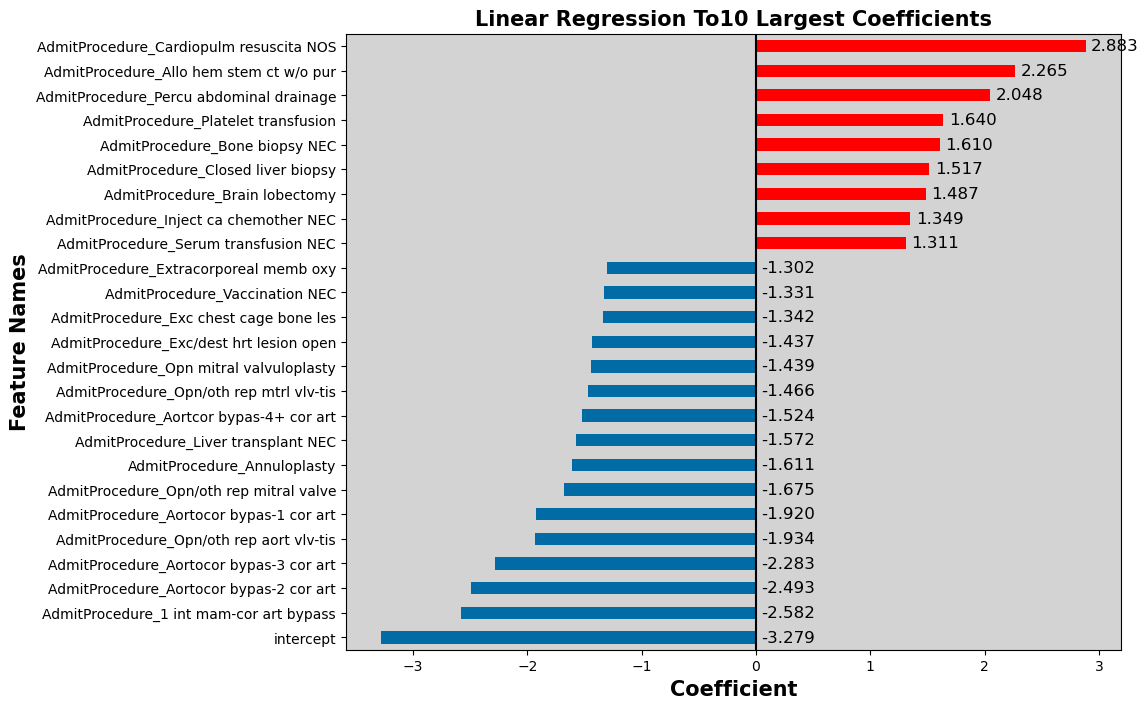

In [201]:
fig, ax = plt.subplots(figsize=(10, 8))
coeff_rank = coeffs_odds.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(25)
plot_vals = coeffs_odds.loc[top_n_features.index].sort_values()
colors = plot_vals.index.map(colors_dict)       
ax = plot_vals.plot(color=colors, kind = 'barh')
ax.set_title(f"Linear Regression To10 Largest Coefficients", fontsize = 15, fontweight='bold')
ax.set_xlabel('Coefficient', fontsize = 15, fontweight='bold') 
ax.set_ylabel('Feature Names', fontsize = 15, fontweight='bold')
ax.set_facecolor("lightgray")
ax.axvline(0, color='k')
annotate_hbars(ax, ha='left',va='center',size=12,xytext=(4,0),
                       textcoords='offset points')

### Observation
Positive values indicate the feature makes it more likely the patient will not survive

Negative values indicate the feature makes it less likely the patient will died.

In order for us to explain the logistic regression coefficients in plain English, we first need to convert the log-odds into odds.

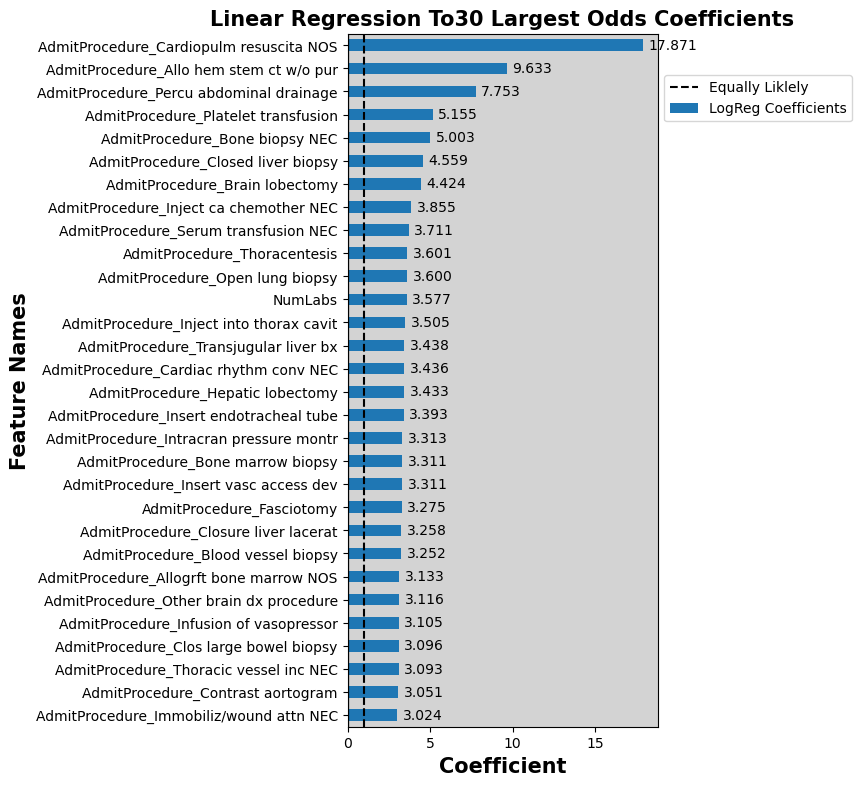

In [202]:
fig, ax = plt.subplots(figsize=(10, 8))
coeffs_odds = get_coeffs_logreg(logreg, as_odds=True)
ax = plot_coeffs(coeffs_odds,top_n=30, annotate=True, figsize=(4,9),size=10)
ax.set_facecolor("lightgray")
ax.axvline(0, color='k')
ax.set_title(f"Linear Regression To30 Largest Odds Coefficients", fontsize = 15, fontweight='bold')
ax.axvline(1, ls='--',label='Equally Liklely',color='k', zorder=1)
ax.legend(bbox_to_anchor=[1,.95])
plt.show()